In [1]:
import smf_tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from astropy.table import Table
import pickle

In [2]:
# create catalogs
data_path = "/Users/marchuertascompany/Documents/data/COSMOS-Web/COSMOS-Web_2.0_morph/"

#COSMOS files
cosmos_f150w_fn='COSMOS-Web_2.0_adversarial_asinh_F150W_Apr-16-2024_4class_shuffle_10_50.csv'
cosmos_f277w_fn='COSMOS-Web_2.0_adversarial_asinh_F277W_Apr-17-2024_4class_shuffle_10_50.csv'
cosmos_f444w_fn='COSMOS-Web_2.0_adversarial_asinh_F444W_Apr-17-2024_4class_shuffle_10_50.csv'

In [3]:

cosmos_f150w=pd.read_csv(os.path.join(data_path,cosmos_f150w_fn))
cosmos_f277w=pd.read_csv(os.path.join(data_path,cosmos_f277w_fn))
cosmos_f444w=pd.read_csv(os.path.join(data_path,cosmos_f444w_fn))

In [4]:
cosmos_phys_ap =Table.read(os.path.join(data_path,'COSMOSWeb_master_v2.0.1-sersic-cgs_LePhare-v2.fits'))

In [5]:
names = [name for name in cosmos_phys_ap.colnames if len(cosmos_phys_ap[name].shape) <= 1]
cosmos_phys=cosmos_phys_ap[names].to_pandas()

In [6]:
merge=cosmos_f150w.merge(cosmos_f277w,how='inner',on='fullname',suffixes=(None,'_x'))
merge2=merge.merge(cosmos_f444w,how='inner',on='fullname',suffixes=(None,'_y'))
cosmos_cat = merge2.merge(cosmos_phys,left_on='id',right_on='Id',how='inner')

In [7]:
print(len(merge))

406023


(array([0.00123723, 0.00256202, 0.00435884, 0.00622802, 0.00957045,
        0.01533784, 0.02383475, 0.03525903, 0.05329984, 0.08146299,
        0.11667264, 0.16102636, 0.21480524, 0.27146717, 0.30097414,
        0.19074652, 0.03874241, 0.00739671, 0.00245162, 0.00102785]),
 array([17.        , 17.64999962, 18.29999924, 18.95000076, 19.60000038,
        20.25      , 20.89999962, 21.54999924, 22.20000076, 22.85000038,
        23.5       , 24.14999962, 24.79999924, 25.45000076, 26.10000038,
        26.75      , 27.39999962, 28.04999924, 28.70000076, 29.35000038,
        30.        ]),
 <BarContainer object of 20 artists>)

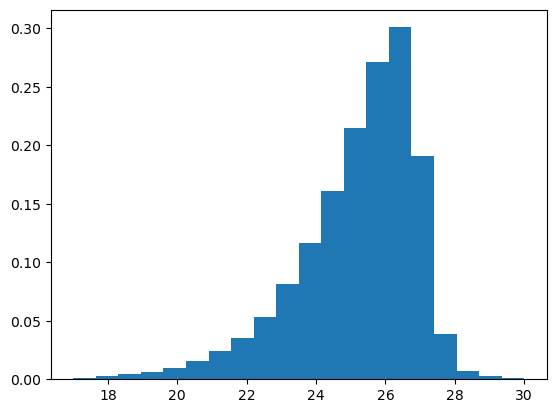

In [97]:
plt.hist(cosmos_cat.MAG_AUTO_F150W,density=True,range=(17,30),bins=20)

In [93]:

cosmos_cat_old = pd.read_csv("/Users/marchuertascompany/Documents/data/COSMOS-Web/COSMOSWeb_master_v1.6.0-sersic+BD-em_cgs_LePhare_nodupl_nomulti_morph_F150W_F277W_F444W.csv")


In [94]:
print(len(cosmos_cat_old))

178380


In [8]:
filters = ['F150W','F277W','F444W']
morph=['sph','disk','irr','bd']

for f in filters:
    for m in morph:
        c = cosmos_cat.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        cosmos_cat[m+'_'+f+'_mean']=c.mean(axis=1).values
        cosmos_cat[m+'_'+f+'_std']=c.std(axis=1).values

In [9]:



morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(cosmos_cat.sph_F277W_mean,cosmos_cat.disk_F277W_mean,cosmos_cat.irr_F277W_mean,cosmos_cat.bd_F277W_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos_cat.disk_f200>0.3)]=1    
cosmos_cat['morph_flag_f277w']=np.array(morph_flag)
cosmos_cat['delta_f277']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(cosmos_cat.sph_F444W_mean,cosmos_cat.disk_F444W_mean,cosmos_cat.irr_F444W_mean,cosmos_cat.bd_F444W_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos_cat.disk_f200>0.3)]=1    
cosmos_cat['morph_flag_f444w']=np.array(morph_flag)
cosmos_cat['delta_f444']=np.array(delta_value)


morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(cosmos_cat.sph_F150W_mean,cosmos_cat.disk_F150W_mean,cosmos_cat.irr_F150W_mean,cosmos_cat.bd_F150W_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos_cat.disk_f200>0.3)]=1    
cosmos_cat['morph_flag_f150w']=np.array(morph_flag)
cosmos_cat['delta_f150']=np.array(delta_value)


#cosmos_cat.to_csv(data_path+"COSMOSWeb_master_v1.6.0-sersic+BD-em_cgs_LePhare_nodupl_nomulti_morph_F150W_F277W_F444W_morphflag.csv")

In [10]:
morph_flag = cosmos_cat.morph_flag_f150w.values
zbest = cosmos_cat['LP_zPDF']

morph_f356 = cosmos_cat.morph_flag_f277w.values
morph_f444 = cosmos_cat.morph_flag_f444w.values
morph_flag[(zbest>1) & (zbest<3)] = morph_f356[(zbest>1) & (zbest<3)]
morph_flag[(zbest>3) & (zbest<6)]= morph_f444[(zbest>3) & (zbest<6)]
cosmos_cat['morph_flag']=morph_flag

In [79]:
clean = cosmos_cat.query('MAG_MODEL_F150W>0 and MAG_MODEL_F150W<28 and LP_mass_med_PDF>7 and LP_mass_med_PDF<13 and LP_zPDF>0 and LP_zPDF<7')
morph_sel=['morph_flag==0','morph_flag==1','morph_flag==2','morph_flag==3','(morph_flag==0 or morph_flag==3)','morph_flag>=0 and morph_flag<=3','morph_flag>=0 and morph_flag!=2','(morph_flag==1 or morph_flag==2)']
morph_class=['sph','disk','irr','db','early','all','reg','late']

smf_morph={}

zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]
#zbins=[0.2,0.5]
for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    for q,cl in zip(morph_sel,morph_class):
        sel=clean.query(q+' and LP_zPDF>'+str(zlow)+' and LP_zPDF<'+str(zup))
        LogMassbin, Fi, dFi, dFi_cv, dFi_pois=smf_tools.get_smf_cv_poiss_err(0,sel.LP_mass_med_PDF.values,0.3,sel.MAG_MODEL_F150W.values, 27, sel.LP_zPDF.values, zlow, zup, 0.42239)
        smf_morph[(zlow,cl,'LogMassbin')]=LogMassbin
        smf_morph[(zlow,cl,'Fi')]=Fi
        smf_morph[(zlow,cl,'dFi')]=dFi
        
# Define the path to save the pickle file
file_path = '/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph.pkl'

# Use 'with' statement to handle the file open/close
with open(file_path, 'wb') as file:
    pickle.dump(smf_morph, file)

print(f"Dictionary stored successfully at {file_path}")

Dictionary stored successfully at /Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph.pkl


In [80]:
clean = cosmos_cat.query('LP_ssfr_med_PDF < -11 and MAG_MODEL_F150W>0 and MAG_MODEL_F150W<28 and LP_mass_med_PDF>7 and LP_mass_med_PDF<13 and LP_zPDF>0 and LP_zPDF<7')
morph_sel=['morph_flag==0','morph_flag==1','morph_flag==2','morph_flag==3','(morph_flag==0 or morph_flag==3)','morph_flag>=0 and morph_flag<=3','morph_flag>=0 and morph_flag!=2','(morph_flag==1 or morph_flag==2)']
morph_class=['sph','disk','irr','db','early','all','reg','late']

smf_morph_Q={}

zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]

for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    for q,cl in zip(morph_sel,morph_class):
        sel=clean.query(q+' and LP_zPDF>'+str(zlow)+' and LP_zPDF<'+str(zup))
        # Check if the dataframe 'sel' is empty
        if sel.empty:
            print(f"No data for z range {zlow}-{zup} with morphology {cl}. Skipping...")
            continue
        LogMassbin, Fi, dFi, dFi_cv, dFi_pois=smf_tools.get_smf_cv_poiss_err(0,sel.LP_mass_med_PDF.values,0.3,sel.MAG_MODEL_F150W.values, 27, sel.LP_zPDF.values, zlow, zup, 0.42239)
        smf_morph_Q[(zlow,cl,'LogMassbin')]=LogMassbin
        smf_morph_Q[(zlow,cl,'Fi')]=Fi
        smf_morph_Q[(zlow,cl,'dFi')]=dFi

# Define the path to save the pickle file
file_path = '/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph_Q.pkl'

# Use 'with' statement to handle the file open/close
with open(file_path, 'wb') as file:
    pickle.dump(smf_morph_Q, file)

print(f"Dictionary stored successfully at {file_path}")

No data for z range 4.5-5.5 with morphology sph. Skipping...
No data for z range 4.5-5.5 with morphology disk. Skipping...
Dictionary stored successfully at /Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph_Q.pkl


In [91]:
clean = cosmos_cat.query('LP_ssfr_med_PDF > -11 and LP_ssfr_med_PDF < 0 and MAG_MODEL_F150W>0 and MAG_MODEL_F150W<28 and LP_mass_med_PDF>7 and LP_mass_med_PDF<13 and LP_zPDF>0 and LP_zPDF<7')
morph_sel=['morph_flag==0','morph_flag==1','morph_flag==2','morph_flag==3','(morph_flag==0 or morph_flag==3)','morph_flag>=0 and morph_flag<=3','morph_flag>=0 and morph_flag!=2','(morph_flag==1 or morph_flag==2)']
morph_class=['sph','disk','irr','db','early','all','reg','late']

smf_morph_SF={}

zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]
#zbins=[4.5,5.5]

for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    for q,cl in zip(morph_sel,morph_class):
        sel=clean.query(q+' and LP_zPDF>'+str(zlow)+' and LP_zPDF<'+str(zup))
        # Check if the dataframe 'sel' is empty
        if sel.empty:
            print(f"No data for z range {zlow}-{zup} with morphology {cl}. Skipping...")
            continue
        LogMassbin, Fi, dFi, dFi_cv, dFi_pois=smf_tools.get_smf_cv_poiss_err(0,sel.LP_mass_med_PDF.values,0.3,sel.MAG_MODEL_F150W.values, 27, sel.LP_zPDF.values, zlow, zup, 0.42239)
        smf_morph_SF[(zlow,cl,'LogMassbin')]=LogMassbin
        smf_morph_SF[(zlow,cl,'Fi')]=Fi
        smf_morph_SF[(zlow,cl,'dFi')]=dFi
        print('done '+cl,zlow,zup)

# Define the path to save the pickle file
file_path = '/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph_SF.pkl'

# Use 'with' statement to handle the file open/close
with open(file_path, 'wb') as file:
    pickle.dump(smf_morph_SF, file)

print(f"Dictionary stored successfully at {file_path}")

done sph 0.2 0.5
done disk 0.2 0.5
done irr 0.2 0.5
done db 0.2 0.5
done early 0.2 0.5
done all 0.2 0.5
done reg 0.2 0.5
done late 0.2 0.5
done sph 0.5 0.8
done disk 0.5 0.8
done irr 0.5 0.8
done db 0.5 0.8
done early 0.5 0.8
done all 0.5 0.8
done reg 0.5 0.8
done late 0.5 0.8
done sph 0.8 1.1
done disk 0.8 1.1
done irr 0.8 1.1
done db 0.8 1.1
done early 0.8 1.1
done all 0.8 1.1
done reg 0.8 1.1
done late 0.8 1.1
done sph 1.1 1.5
done disk 1.1 1.5
done irr 1.1 1.5
done db 1.1 1.5
done early 1.1 1.5
done all 1.1 1.5
done reg 1.1 1.5
done late 1.1 1.5
done sph 1.5 2
done disk 1.5 2
done irr 1.5 2
done db 1.5 2
done early 1.5 2
done all 1.5 2
done reg 1.5 2
done late 1.5 2
done sph 2 2.5
done disk 2 2.5
done irr 2 2.5
done db 2 2.5
done early 2 2.5
done all 2 2.5
done reg 2 2.5
done late 2 2.5
done sph 2.5 3
done disk 2.5 3
done irr 2.5 3
done db 2.5 3
done early 2.5 3
done all 2.5 3
done reg 2.5 3
done late 2.5 3
done sph 3 3.5
done disk 3 3.5
done irr 3 3.5
done db 3 3.5
done early 3 3.

In [90]:
smf_morph_SF[(2.5,'sph','LogMassbin')]

KeyError: (2.5, 'sph', 'LogMassbin')

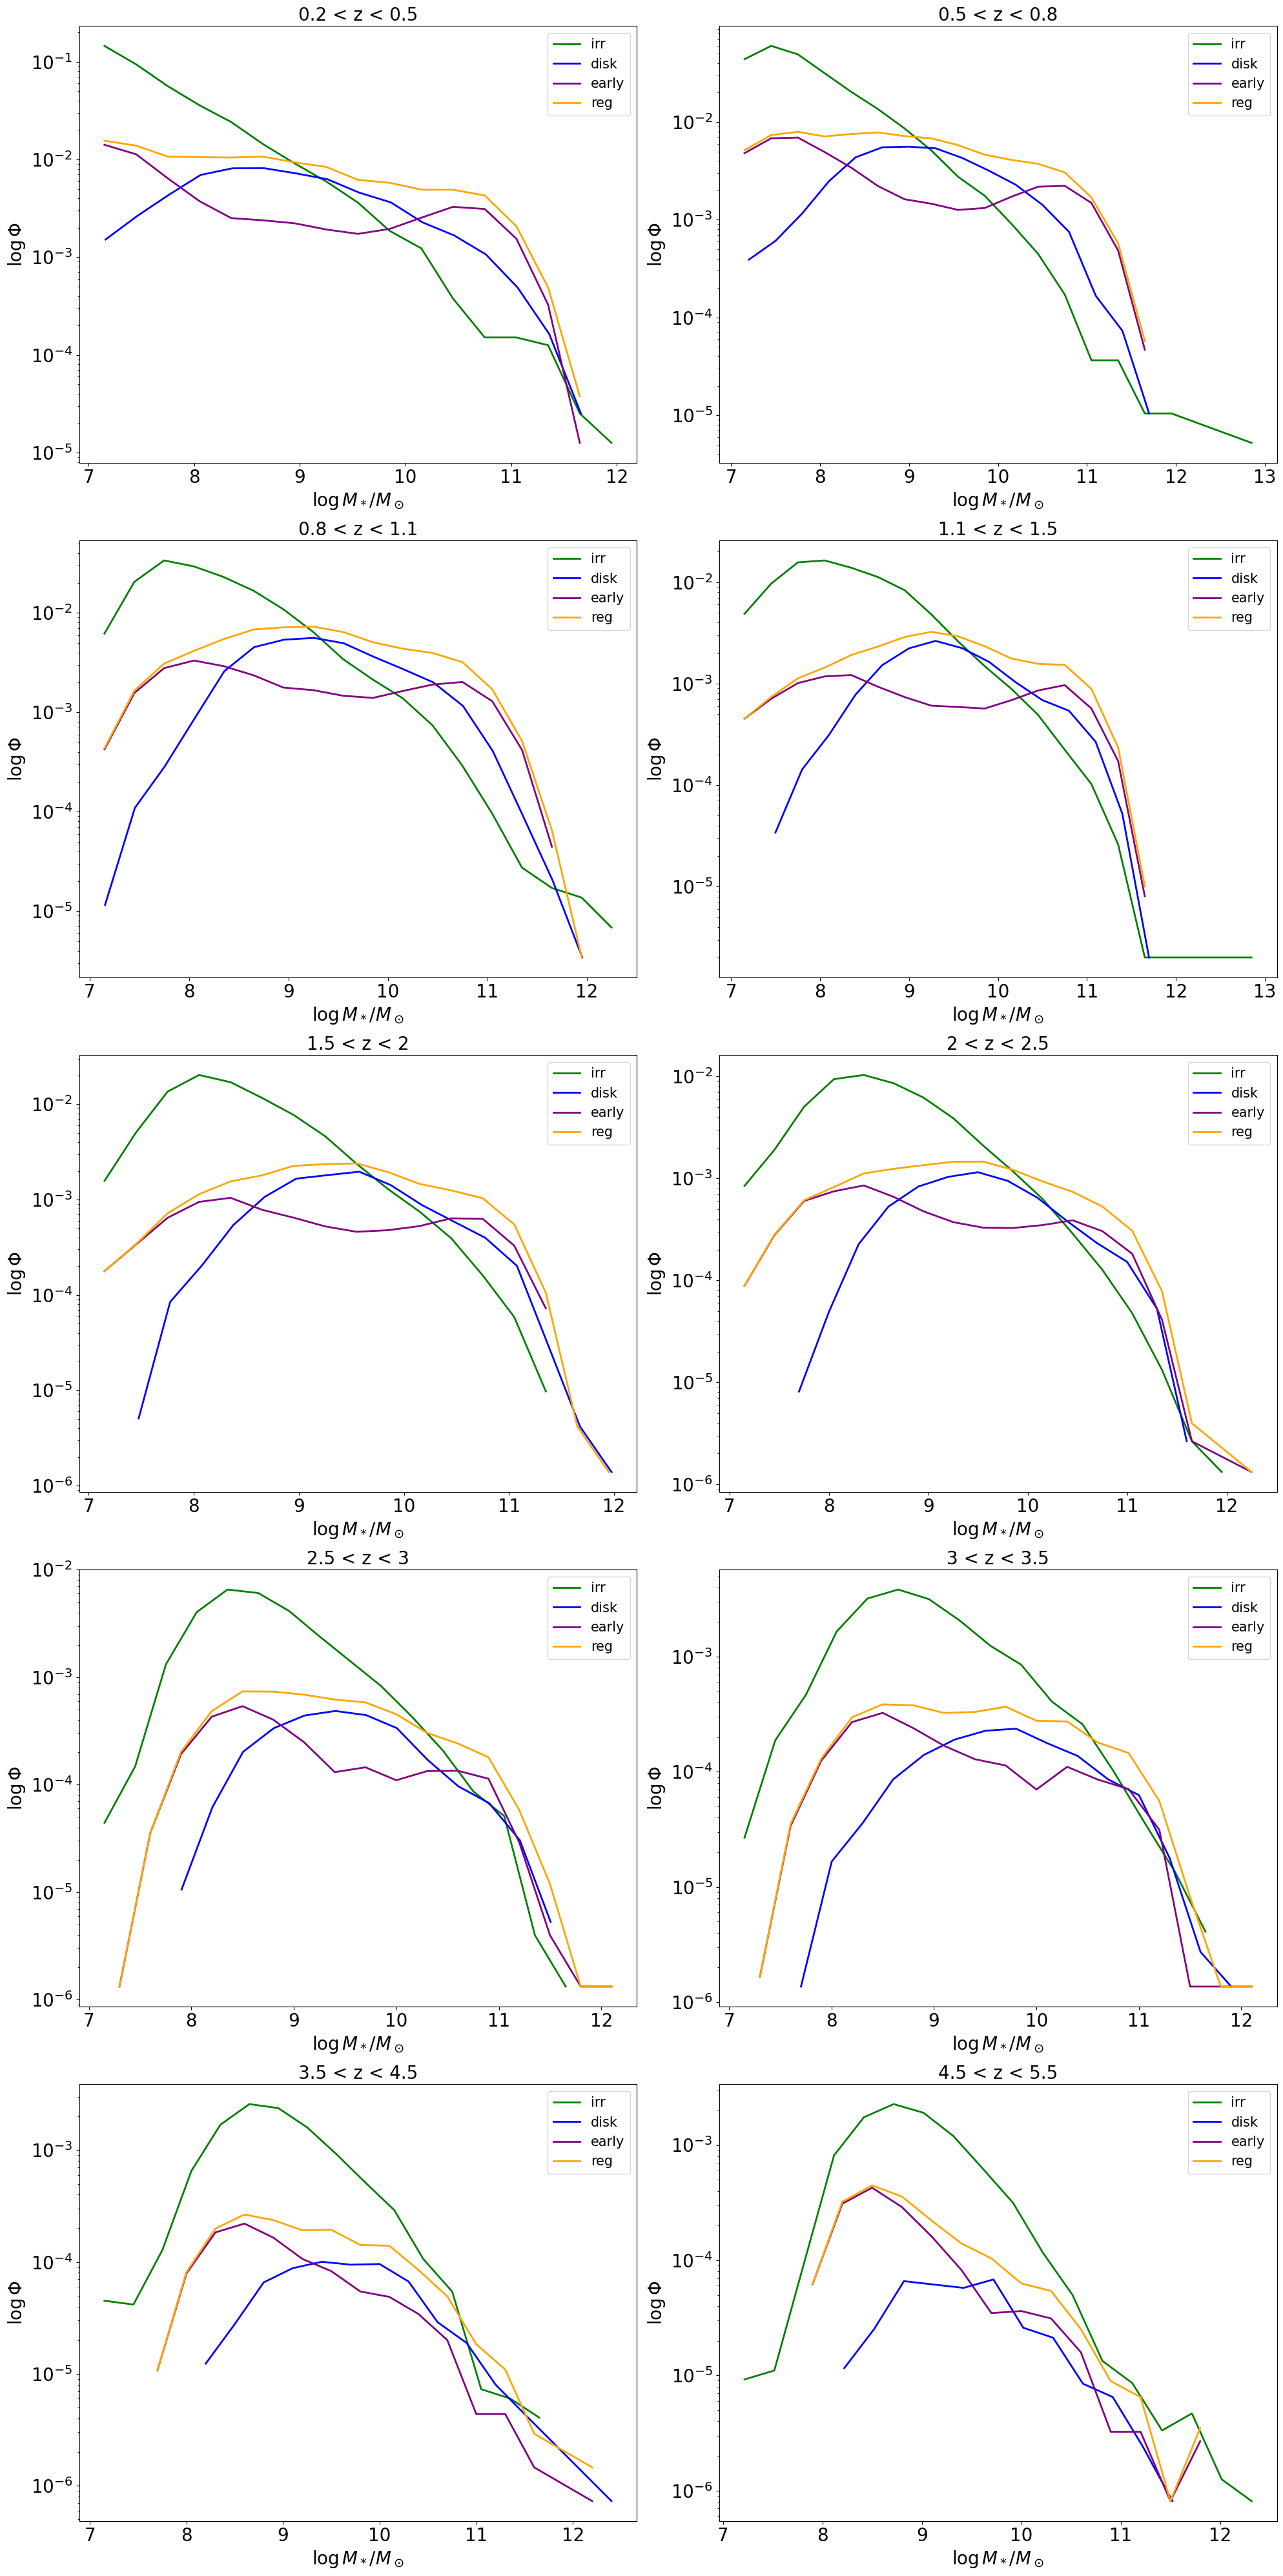

In [99]:
morph_class=['irr','disk','early','reg']

import matplotlib.pyplot as plt
import numpy as np

# Set up a large figure to accommodate subplots
plt.figure(figsize=(20, 40))  # Adjust size to your needs

# Loop over the redshift bins
for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    ax = plt.subplot(5, 2, i + 1)
    # Ensure that the necessary data is available in the dictionary
    if (zlow, cl, 'LogMassbin') in smf_morph and (zlow, cl, 'Fi') in smf_morph:
        LogMassbin = smf_morph[(zlow, cl, 'LogMassbin')]
        Fi = smf_morph[(zlow, cl, 'Fi')]
            
        if len(Fi) > 0:  # Check if there are data points to plot
            # Filter out non-positive values for the logarithmic plot
            Fi_pos = Fi[Fi > 0]
            LogMassbin_pos = LogMassbin[Fi > 0]
                
            ax.plot(LogMassbin_pos, Fi_pos, color=morph_colors.get(cl, 'black'), label=cl, lw=2)
        else:
            print(f"No data available for {cl} in redshift range {zlow}-{zup}")

    # Set titles and labels with the specified font size
    ax.set_title(f'{zlow} < z < {zup}', fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    
    # Set the y-axis to log scale
    ax.set_yscale('log')
    # Set tick label font size
    ax.tick_params(axis='both', which='major', labelsize=20)
    # Set legend
    ax.legend(fontsize=15)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


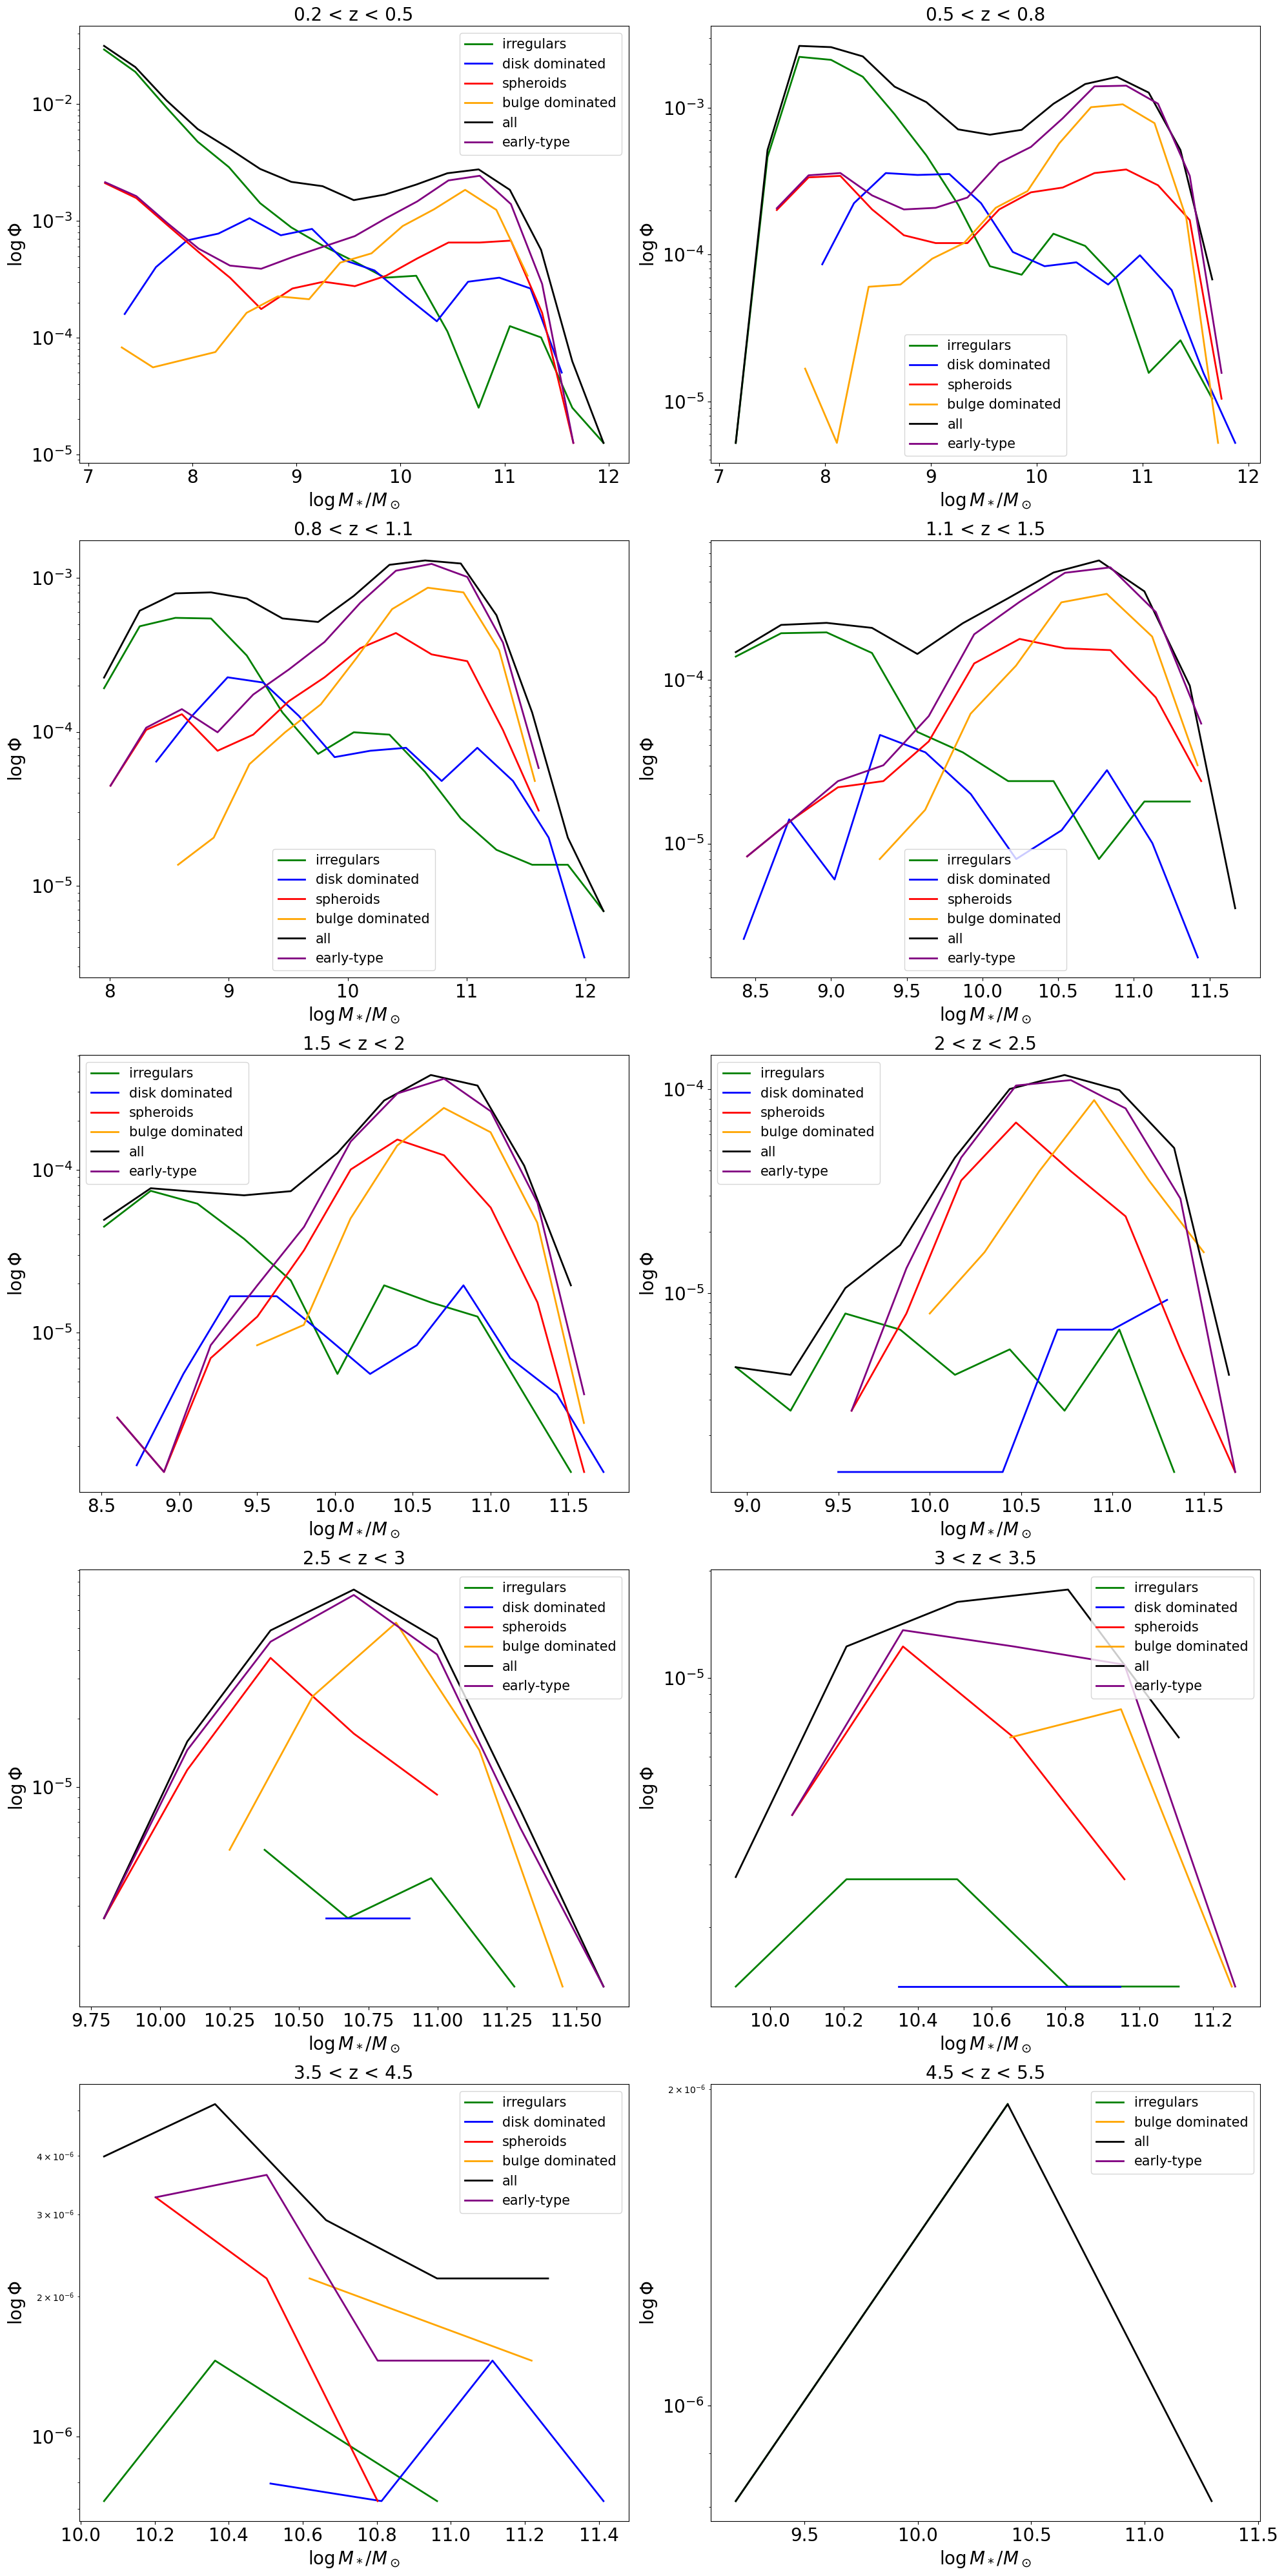

In [109]:
morph_class=['irr','disk','sph','db','all','early']

import matplotlib.pyplot as plt
import numpy as np

# Set up a large figure to accommodate subplots
plt.figure(figsize=(20, 40))  # Adjust size to your needs

# Loop over the redshift bins
morph_colors = {'sph':'red','reg': 'orange', 'disk': 'blue', 'irr': 'green', 'db': 'orange', 'early': 'purple', 'all': 'black'}
morph_labels = {'sph':'spheroids','reg':'hubble types','irr':'irregulars','disk':'disk dominated','db':'bulge dominated','all':'all','early':'early-type','late':'late-type'}
for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    ax = plt.subplot(5, 2, i + 1)
    # Ensure that the necessary data is available in the dictionary
    for cl in morph_class:
        if (zlow, cl, 'LogMassbin') in smf_morph_Q and (zlow, cl, 'Fi') in smf_morph_Q:
            LogMassbin = smf_morph_Q[(zlow, cl, 'LogMassbin')]
            Fi = smf_morph_Q[(zlow, cl, 'Fi')]
                
            if len(Fi) > 0:  # Check if there are data points to plot
                # Filter out non-positive values for the logarithmic plot
                Fi_pos = Fi[Fi > 0]
                LogMassbin_pos = LogMassbin[Fi > 0]
                    
                ax.plot(LogMassbin_pos, Fi_pos, color=morph_colors.get(cl, 'black'), label=morph_labels.get(cl), lw=2)
            else:
                print(f"No data available for {cl} in redshift range {zlow}-{zup}")

    # Set titles and labels with the specified font size
    ax.set_title(f'{zlow} < z < {zup}', fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    
    # Set the y-axis to log scale
    ax.set_yscale('log')
    # Set tick label font size
    ax.tick_params(axis='both', which='major', labelsize=20)
    # Set legend
    ax.legend(fontsize=15)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


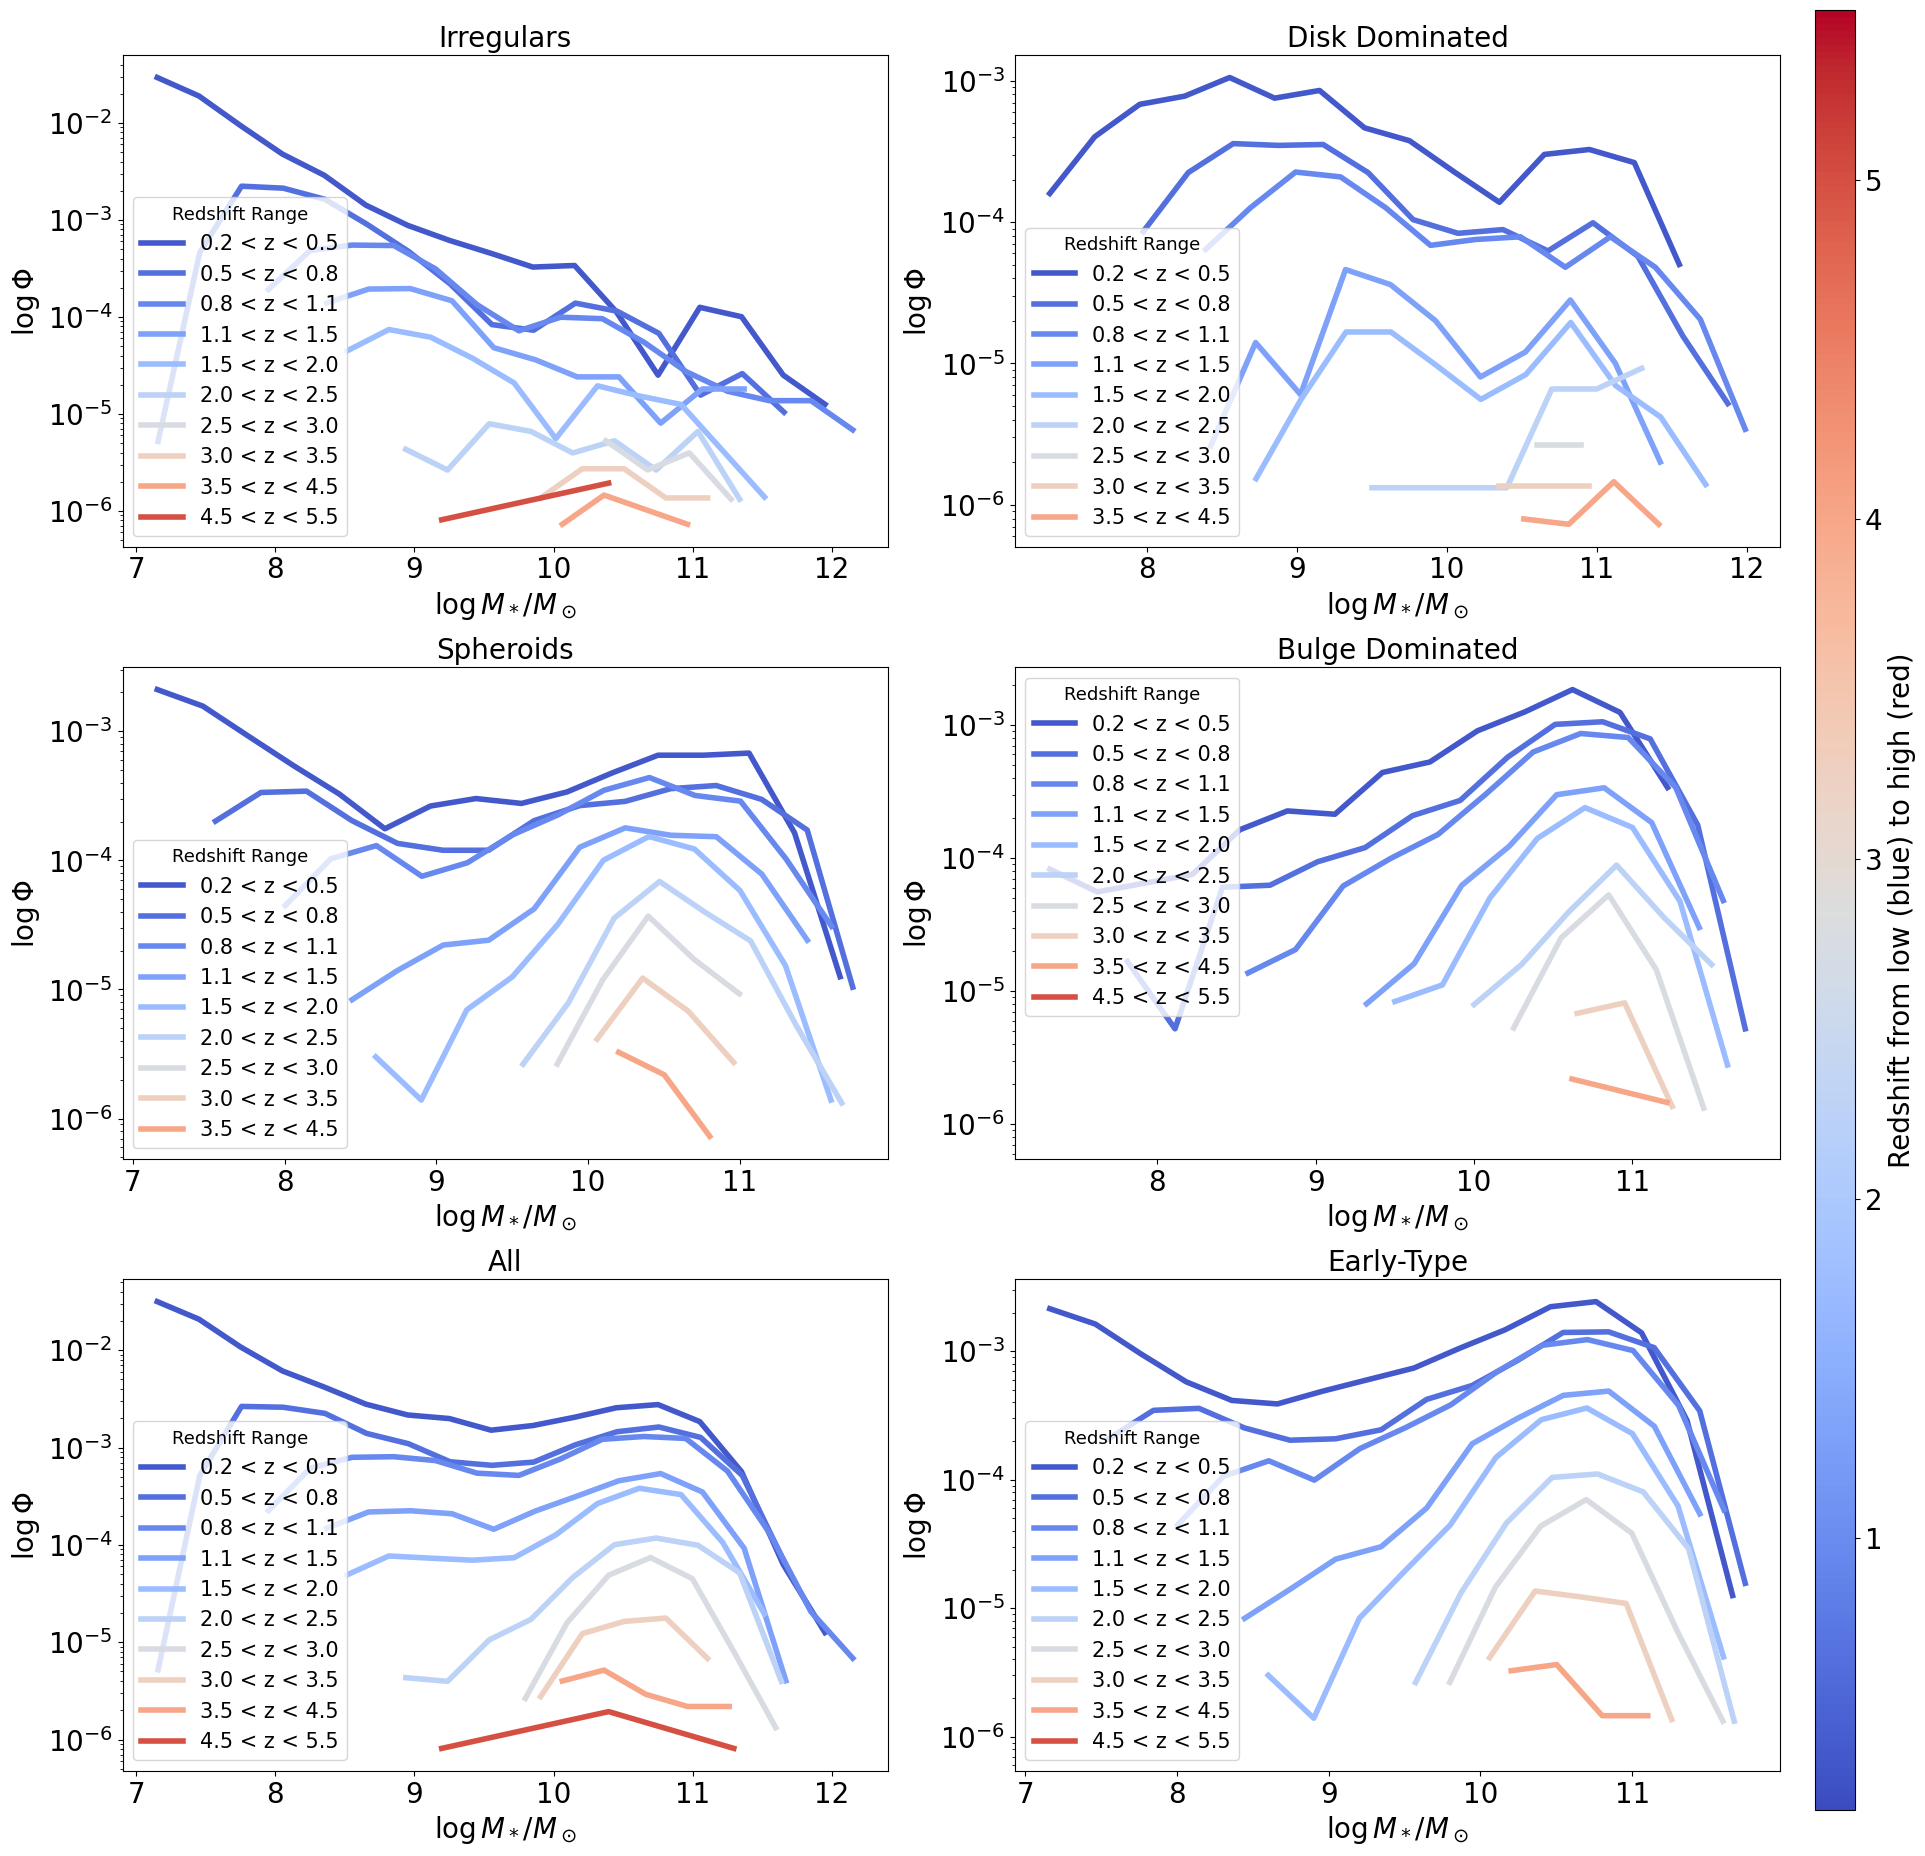

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize

# Set up a large figure to accommodate subplots, adjust the height to fit better
plt.figure(figsize=(20, 30))  # Adjust this as needed to optimize space

# Morphological classes and labels
morph_class = ['irr', 'disk', 'sph', 'db', 'all', 'early']
morph_labels = {'sph': 'Spheroids', 'irr': 'Irregulars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}

# Prepare colormap, ensure normalization covers actual redshift range used
zmin = min(zbins)
zmax = max(zbins)
norm = Normalize(vmin=zmin, vmax=zmax)
sm = plt.cm.ScalarMappable(cmap=coolwarm, norm=norm)
sm.set_array([])  # Necessary for colorbar setup

# Loop over morphological classes
for idx, cl in enumerate(morph_class):
    ax = plt.subplot(5, 2, idx + 1)
    
    # Loop over the redshift bins for the given morphological class
    for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
        key_logmass = (zlow, cl, 'LogMassbin')
        key_fi = (zlow, cl, 'Fi')
        if key_logmass in smf_morph_Q and key_fi in smf_morph_Q:
            LogMassbin = smf_morph_Q[key_logmass]
            Fi = smf_morph_Q[key_fi]

            if len(Fi) > 0:
                Fi_pos = Fi[Fi > 0]
                LogMassbin_pos = LogMassbin[Fi > 0]
                color = coolwarm(norm((zlow + zup) / 2))  # Color represents midpoint of z range
                ax.plot(LogMassbin_pos, Fi_pos, color=color, label=f'{zlow:.1f} < z < {zup:.1f}', lw=4)

    ax.set_title(morph_labels.get(cl, cl), fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(fontsize=15, title="Redshift Range", title_fontsize='13')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rect to manage layout space

# Position and size of the color bar
cbar_ax = plt.gcf().add_axes([0.91, 0.4, 0.02, 0.6])  # Adjust the bottom and height values to match subplot heights exactly
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Redshift from low (blue) to high (red)', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
from scipy.optimize import curve_fit

# Extract the data from the dictionary for spheroid class and lowest redshift bin
logM = smf_morph_Q[(0.2, 'sph', 'LogMassbin')]
Phi = smf_morph_Q[(0.2, 'sph', 'Fi')]

# Define the double Schechter function
def double_schechter_function(logM, phi_star1, phi_star2, logM_star, alpha1, alpha2):
    M = 10**logM
    M_star = 10**logM_star
    term1 = phi_star1 * (M / M_star)**alpha1 * np.exp(-M / M_star)
    term2 = phi_star2 * (M / M_star)**alpha2 * np.exp(-M / M_star)
    return np.log(10) * (term1 + term2)

# Log-likelihood function
def log_likelihood(theta, logM, Phi):
    phi_star1, phi_star2, logM_star, alpha1, alpha2 = theta
    model = double_schechter_function(logM, phi_star1, phi_star2, logM_star, alpha1, alpha2)
    sigma = np.sqrt(Phi)  # Assuming Poisson errors for demonstration
    return -0.5 * np.sum((Phi - model)**2 / sigma**2)

# Define the priors
def log_prior(theta):
    phi_star1, phi_star2, logM_star, alpha1, alpha2 = theta
    if 0.0 < phi_star1 < 0.01 and 0.0 < phi_star2 < 0.01 and 10.0 < logM_star < 12.0 and -2.0 < alpha1 < 0.0 and -2.0 < alpha2 < 0.0:
        return 0.0
    return -np.inf

# Combined log-probability function
def log_probability(theta, logM, Phi):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, logM, Phi)

# Set up the MCMC
nwalkers, ndim = 1000, 5
pos = [np.array([0.05, 0.005, 11, -1.2, -1.2]) + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(logM, Phi))
sampler.run_mcmc(pos, 2000, progress=True)

# Analyze the results
samples = sampler.get_chain(discard=100, thin=15, flat=True)
phi_star1_mcmc, phi_star2_mcmc, logM_star_mcmc, alpha1_mcmc, alpha2_mcmc = np.percentile(samples, 50, axis=0)

# Plotting the fitted function and the data
plt.figure(figsize=(10, 5))
plt.plot(logM, Phi, 'o', label='Data')
plt.plot(logM, double_schechter_function(logM, phi_star1_mcmc, phi_star2_mcmc, logM_star_mcmc, alpha1_mcmc, alpha2_mcmc),
         label='Fit', color='red')
plt.xlabel('Log(Mass)')
plt.ylabel('Phi')
plt.legend()
plt.title('Fit to Double Schechter Function')
plt.show()

# Plot the corner plot
fig = corner.corner(samples, labels=['phi_star1', 'phi_star2', 'logM_star', 'alpha1', 'alpha2'], truths=[phi_star1_mcmc, phi_star2_mcmc, logM_star_mcmc, alpha1_mcmc, alpha2_mcmc])
plt.show()

print(f"Fitted parameters: Phi1*={phi_star1_mcmc}, Phi2*={phi_star2_mcmc}, logM*={logM_star_mcmc}, alpha1={alpha1_mcmc}, alpha2={alpha2_mcmc}")


NameError: name 'smf_morph_Q' is not defined

/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_47571/146477640.py:35: RuntimeWarning: divide by zero encountered in log10
  Phi = np.log10(smf_morph[(1.1, 'all', 'Fi')])
  0%|          | 0/2000 [00:00<?, ?it/s]/Users/marchuertascompany/soft/miniforge3/envs/tfenv23/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 2000/2000 [00:04<00:00, 441.32it/s]


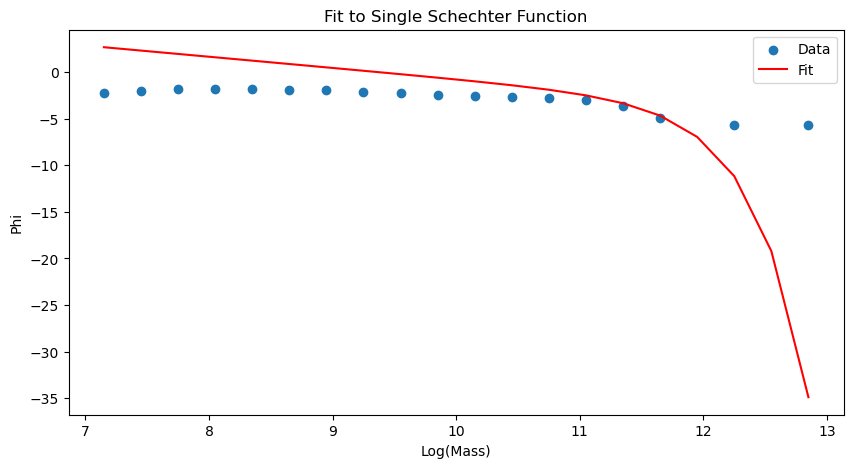

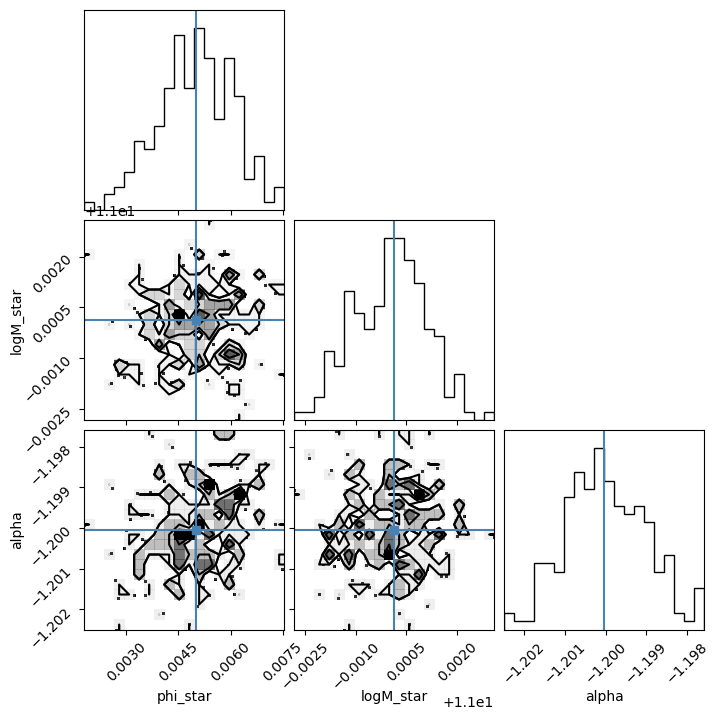

Fitted parameters: Phi*=0.005021246576712815, logM*=11.000118953006538, alpha=-1.2000458078593164


In [199]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Define the single Schechter function
def schechter_function(logM, phi_star, logM_star, alpha):
    M = 10**logM
    M_star = 10**logM_star
    return np.log10(np.log(10) * phi_star * (M / M_star)**(alpha+1) * np.exp(-M / M_star))

# Log-likelihood function
def log_likelihood(theta, logM, Phi, dPhi):
    phi_star, logM_star, alpha = theta
    model = schechter_function(logM, phi_star, logM_star, alpha)
    sigma = dPhi  # Use provided errors
    return -0.5 * np.sum((Phi - model)**2)# / sigma**2)

# Define the priors
def log_prior(theta):
    phi_star, logM_star, alpha = theta
    if 0.0 < phi_star < 0.05 and 9.0 < logM_star < 12.0 and -2.0 < alpha < 2:
        return 0.0
    return -np.inf

# Combined log-probability function
def log_probability(theta, logM, Phi, dPhi):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return log_likelihood(theta, logM, Phi, dPhi)

# Extract the data for spheroid class and lowest redshift bin
logM = smf_morph[(1.1, 'all', 'LogMassbin')]
Phi = np.log10(smf_morph[(1.1, 'all', 'Fi')])
dPhi = np.sqrt(smf_morph[(1.1, 'all', 'Fi')])*1e-3#smf_morph_Q[(0.2, 'sph', 'dFi')]  # Errors for the SMF values

# Set up the MCMC
nwalkers, ndim = 200, 3
pos = [np.array([0.005, 11, -1.2]) + 1e-3 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(logM, Phi, dPhi))
sampler.run_mcmc(pos, 2000, progress=True)

# Analyze the results
samples = sampler.get_chain(discard=100, thin=15, flat=True)
phi_star_mcmc, logM_star_mcmc, alpha_mcmc = np.percentile(samples, 50, axis=0)

# Plotting the fitted function and the data with error bars
plt.figure(figsize=(10, 5))
plt.scatter(logM, Phi, label='Data')
plt.plot(logM, schechter_function(logM, phi_star_mcmc, logM_star_mcmc, alpha_mcmc),
         label='Fit', color='red')
plt.xlabel('Log(Mass)')
plt.ylabel('Phi')
plt.legend()
plt.title('Fit to Single Schechter Function')
plt.show()

# Plot the corner plot
fig = corner.corner(samples, labels=['phi_star', 'logM_star', 'alpha'], truths=[phi_star_mcmc, logM_star_mcmc, alpha_mcmc])
plt.show()

print(f"Fitted parameters: Phi*={phi_star_mcmc}, logM*={logM_star_mcmc}, alpha={alpha_mcmc}")


  0%|          | 0/10000 [00:00<?, ?it/s]/Users/marchuertascompany/soft/miniforge3/envs/tfenv23/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [01:07<00:00, 147.66it/s]


10.446118083458352 -1.6904870573857722 0.07760350305385852 -3.9684674377007587 -4.568024959954433


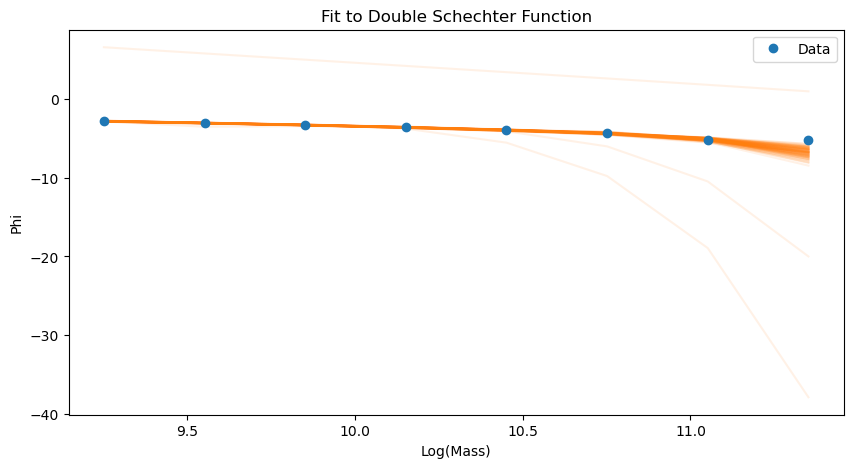

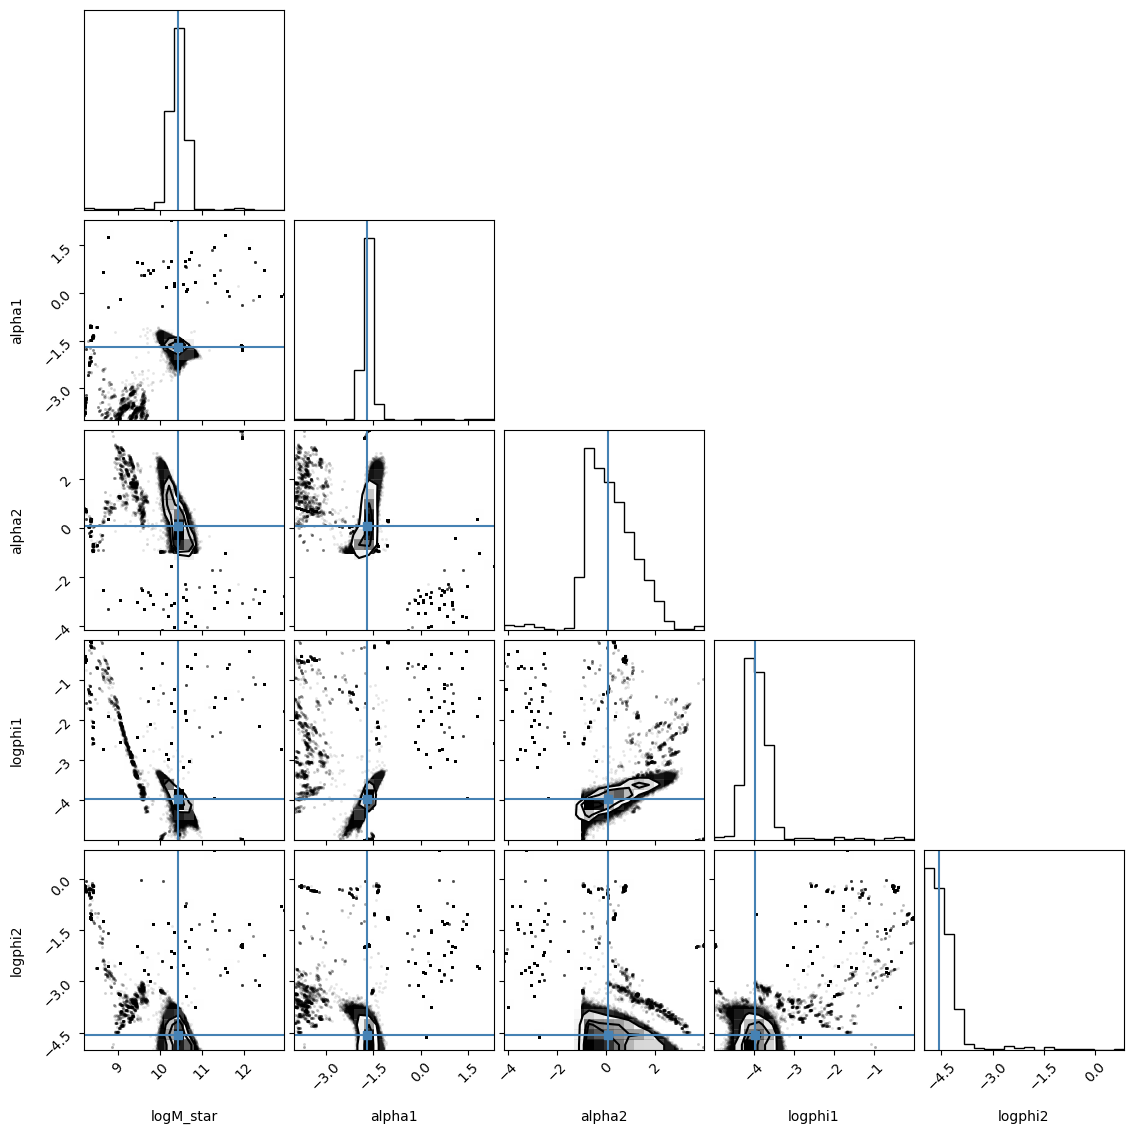

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner





 #Extract the data for spheroid class and lowest redshift bin
logM = smf_morph[(3.5, 'irr', 'LogMassbin')]
Phi = smf_morph[(3.5, 'irr', 'Fi')]
dPhi = (smf_morph[(3.5, 'irr', 'dFi')])# smf_morph_Q[(0.2, 'sph', 'dFi')]  # Errors for the SMF values

valid = (Phi > 0) & (dPhi > 0) & (logM<11.5) & (logM>9)

logM = logM[valid]
Phi = Phi[valid]
dPhi = dPhi[valid]

# Assuming logM is sorted
logM_sorted = np.sort(logM)

# Compute the edges as the midpoints between consecutive logM values
logM_edges = (logM_sorted[:-1] + logM_sorted[1:]) / 2.0

# Add the first and last edge before the first data point and after the last data point
first_edge = 2 * logM_sorted[0] - logM_edges[0]
last_edge = 2 * logM_sorted[-1] - logM_edges[-1]

# Combine edges into a single array of bin edges
logM_bins = np.concatenate([[first_edge], logM_edges, [last_edge]])



def double_schechter_function(logM_bins,logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))


# Log-likelihood function
def log_likelihood(theta, logM, Phi,dPhi):
    logM_star,alpha1, alpha2,logphi1,logphi2 = theta
    model = double_schechter_function(logM_bins,logM,logM_star, alpha1, alpha2,logphi1,logphi2)
    #print(model)
    #sigma = np.sqrt(Phi)  # Assuming Poisson errors for demonstration
    #print(model)
    loglik=0.5 * np.sum((Phi - model)**2/dPhi**2)
    #print(-loglik)
    #if (-loglik<-1000):
    #    print(logM_star,alpha1, alpha2,log_phi_ratio)
    return -loglik

# Define the priors
def log_prior(theta):
    logM_star,alpha1, alpha2,logphi1,logphi2 = theta
    if -5 < logphi1 < 0 and  -5 < logphi2 < 0 and 8.0 < logM_star < 12.0   and -4 < alpha1 < -1 and -1 < alpha2 < 4:
        return 0.0
    return -np.inf

# Combined log-probability function
def log_probability(theta, logM, Phi,dPhi):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return  lp+log_likelihood(theta, logM, Phi,dPhi)

# Set up the MCMC
nwalkers, ndim = 500, 5
initial_guess = [10.5, -.6,-1.7, -2,-2]
#initial_guess=[9.445045016430226,-1.092687917080578,0.12014916598077714,2.758779850286871]
#initial_guess=[0.0023880070168622457,0.0023599411424800416,10.942751815404275,-0.7794343565893846,-0.6093803345888396]
pos = [initial_guess + [1,1,1,1,1] * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(logM, Phi,dPhi))
sampler.run_mcmc(pos, 10000, progress=True)

# Analyze the results
plt.figure(figsize=(10, 5))
samples = sampler.get_chain(discard=2000,thin=15,flat=True)#, thin=15, flat=True
inds = np.random.randint(len(samples), size=100)
for ind in inds:
    sample = samples[ind]
    plt.plot(logM, np.log10(double_schechter_function(logM_bins,logM, sample[0],sample[1],sample[2],sample[3],sample[4])), "C1", alpha=0.1)
    #plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]),)
logM_star_mcmc,alpha1_mcmc, alpha2_mcmc,logphi1_mcmc,logphi2_mcmc = np.percentile(samples, 50, axis=0)
print(logM_star_mcmc,alpha1_mcmc, alpha2_mcmc,logphi1_mcmc,logphi2_mcmc)
# Plotting the fitted function and the data

plt.plot(logM, np.log10(Phi), 'o', label='Data')
#plt.plot(logM, np.log10(double_schechter_function(logM_bins,logM, logM_star_mcmc,alpha1_mcmc, alpha2_mcmc,log_phi_ratio_mcmc)),
         #label='Fit', color='red')
plt.xlabel('Log(Mass)')
plt.ylabel('Phi')
plt.legend()
plt.title('Fit to Double Schechter Function')
plt.show()

# Plot the corner plot
fig = corner.corner(samples, labels=['logM_star','alpha1', 'alpha2','logphi1','logphi2'], truths=[logM_star_mcmc,alpha1_mcmc, alpha2_mcmc,logphi1_mcmc,logphi2_mcmc])
plt.show()

#print(f"Fitted parameters: logM*={logM_star_mcmc}, alpha1={alpha1_mcmc}, alpha2={alpha2_mcmc}, logphiratio={log_phi_ratio_mcmc}")

#print(logM_star_mcmc,alpha1_mcmc, alpha2_mcmc,log_phi_ratio_mcmc)




10.446118083458352 -1.6904870573857722 0.07760350305385852 -3.9684674377007587 -4.568024959954433


(-8.0, 0.0)

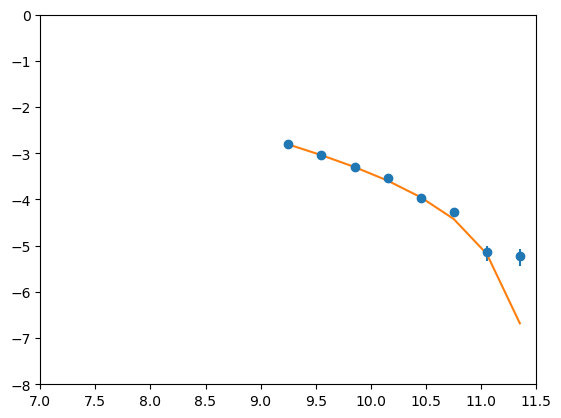

In [144]:
print(logM_star_mcmc,alpha1_mcmc, alpha2_mcmc,logphi1_mcmc,logphi2_mcmc)

upper_errors = np.log10(Phi + dPhi) - np.log10(Phi)
lower_errors = np.log10(Phi) - np.log10(Phi - dPhi)

# Prepare error array for plotting in matplotlib
errors = [lower_errors, upper_errors]

plt.errorbar(logM, np.log10(Phi), yerr=errors, fmt='o',label='Data')

plt.plot(logM, np.log10(double_schechter_function(None,logM,logM_star_mcmc,alpha1_mcmc, alpha2_mcmc,logphi1_mcmc,logphi2_mcmc)))

plt.xlim((7,11.5))
plt.ylim(-8,0)

In [234]:
import numpy as np
import emcee
import pickle
import os
import h5py

morph_class=['sph','disk','irr','db','early','all','reg','late']
zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]

def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))

def log_likelihood(theta, logM, Phi, dPhi):
    logM_star, alpha1, alpha2, logphi1, logphi2 = theta
    model = double_schechter_function(logM, logM_star, alpha1, alpha2, logphi1, logphi2)
    return -0.5 * np.sum((Phi - model)**2 / dPhi**2)

def log_prior(theta):
    logM_star, alpha1, alpha2, logphi1, logphi2 = theta
    if -5 < logphi1 < 0 and -5 < logphi2 < 0 and 8.0 < logM_star < 12.0 and -4 < alpha1 < -1 and -1 < alpha2 < 4:
        return 0.0
    return -np.inf

def log_probability(theta, logM, Phi, dPhi):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, logM, Phi, dPhi)

# Results dictionary
fit_results = {}

# Set up the MCMC parameters
nwalkers, ndim = 500, 5
pos_func = lambda g: [g + 1*np.random.randn(ndim) for i in range(nwalkers)]

# Main loop over redshift and morphology bins
for zbin in zbins[:-1]:
    for morph in morph_class:
        #key = (zbin, morph)
        if len(smf_morph[(zbin,morph,'LogMassbin')]) > 0:
            logM = smf_morph[(zbin,morph,'LogMassbin')]
            Phi = smf_morph[(zbin,morph,'Fi')]
            dPhi = smf_morph[(zbin,morph,'dFi')]

            # Filter out zero or negative values in Phi or dPhi
            valid = (Phi > 0) & (dPhi > 0) 
            if not np.any(valid):
                print(f"Skipping {morph} at z={zbin} entirely, no valid data points after filtering.")
                continue
            logM = logM[valid]
            Phi = Phi[valid]
            dPhi = dPhi[valid]

            initial_guess = [10.5, -0.6, -1.7, -2, -2]
            pos = pos_func(initial_guess)
            sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(logM, Phi, dPhi))
            sampler.run_mcmc(pos, 10000, progress=True)

            # Store the sampler chain and best-fit parameters
            samples = sampler.get_chain(discard=2000, thin=15, flat=True)
            logM_star_50, alpha1_50, alpha2_50, logphi1_50, logphi2_50 = np.percentile(samples, 50, axis=0)
            logM_star_16, alpha1_16, alpha2_16, logphi1_16, logphi2_16 = np.percentile(samples, 16, axis=0)
            logM_star_84, alpha1_84, alpha2_84, logphi1_84, logphi2_84 = np.percentile(samples, 84, axis=0)
            fit_results[(zbin,morph)] = {'sampler': sampler, 'params_50': (logM_star_50, alpha1_50, alpha2_50, logphi1_50, logphi2_50),'params_16': (logM_star_16, alpha1_16, alpha2_16, logphi1_16, logphi2_16),'params_84': (logM_star_84, alpha1_84, alpha2_84, logphi1_84, logphi2_84)}
            print('done fit ',zbin,morph)
        else:
            print(f"Skipping {morph} at z={zbin} due to empty data.")


# Assume fit_results is loaded or available from prior code
params_only_results = {}

# Extract only the parameters from the original results
for (zbin, morph), results in fit_results.items():
    params_only_results[(zbin, morph)] = {
        'params_50': results['params_50'],
        'params_16': results['params_16'],
        'params_84': results['params_84']
    }

# Save the results to a pickle file
file_path = '/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_fit_results.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)  # Ensure the directory exists

# Serialize the parameters-only dictionary
with open(file_path, 'wb') as file:
    pickle.dump(params_only_results, file)

print(f"Parameters-only fit results stored successfully at {file_path}")



def save_sampler_to_hdf5(sampler, filename):
    with h5py.File(filename, 'w') as f:
        f.create_dataset('chain', data=sampler.get_chain(), compression='gzip')
        f.create_dataset('log_prob', data=sampler.get_log_prob(), compression='gzip')

for (zbin, morph), results in fit_results.items():
    filename = f'/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/{zbin}_{morph}_sampler.h5'
    save_sampler_to_hdf5(results['sampler'], filename)

print("Sampler data saved in HDF5 format with compression.")



\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
\hline
Redshift & $\log M^*$ & $\log \phi_1^*$ & $\alpha_1$ & $\log \phi_2^*$ & $\alpha_2$ \\
\hline
$0.2 \leq z < 0.5$ & $10.82_{-0.16}^{+0.15}$ & $-1.31_{-0.63}^{+0.30}$ & $-0.57_{-0.40}^{+0.75}$ & $-3.02_{-1.19}^{+0.45}$ & $-2.47_{-0.68}^{+0.15}$ \\[.3cm]
$0.5 \leq z < 0.8$ & $11.02_{-0.14}^{+0.11}$ & $-1.17_{-0.32}^{+0.09}$ & $-0.17_{-0.67}^{+1.69}$ & $-2.85_{-0.63}^{+0.13}$ & $-3.53_{-1.12}^{+0.88}$ \\[.3cm]
$0.8 \leq z < 1.1$ & $10.98_{-0.14}^{+0.10}$ & $-1.17_{-0.34}^{+0.08}$ & $-0.25_{-0.60}^{+1.40}$ & $-2.80_{-0.66}^{+0.12}$ & $-3.25_{-1.37}^{+0.64}$ \\[.3cm]
$1.1 \leq z < 1.5$ & $10.80_{-0.17}^{+0.22}$ & $-1.25_{-0.25}^{+0.12}$ & $0.02_{-0.72}^{+0.81}$ & $-3.22_{-0.43}^{+0.17}$ & $-3.04_{-0.43}^{+0.15}$ \\[.3cm]
$1.5 \leq z < 2$ & $10.81_{-0.21}^{+0.12}$ & $-1.14_{-0.17}^{+0.08}$ & $-0.02_{-0.77}^{+0.90}$ & $-3.18_{-0.30}^{+0.12}$ & $-3.36_{-0.97}^{+0.26}$ \\[.3cm]
$2 \leq z < 2.5$ & $10.91_{-0.18}^{+0.09}$ & $-1.16_{-0.11}

In [ ]:
def format_value_with_error(value, error_minus, error_plus):
    """Creates a LaTeX-formatted string with errors."""
    return f"${value:.2f}_{{-{error_minus:.2f}}}^{{+{error_plus:.2f}}}$"

def create_latex_table(morph, params_dict, zbins, morph_labels):
    """Generates a LaTeX table for the given morphology."""
    # Start the table and add the header
    latex_table = r"""\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
\hline
Redshift & $\log M^*$ & $\log \phi_1^*$ & $\alpha_1$ & $\log \phi_2^*$ & $\alpha_2$ \\
\hline
"""
    # Iterate over the zbins to create the redshift ranges and the table rows
    for i in range(len(zbins)-1):
        zlow, zup = zbins[i], zbins[i+1]
        key = (zlow, morph)  # Adjust the key as per your dictionary structure
        if key in params_dict:
            # Extract parameters and their percentiles
            params_50 = params_dict[key]['params_50']
            params_16 = params_dict[key]['params_16']
            params_84 = params_dict[key]['params_84']
            
            # Format the table row
            row = " & ".join(format_value_with_error(p50, p50-p16, p84-p50) for p50, p16, p84 in zip(params_50, params_16, params_84))
            # Add the row to the table
            #latex_table += f"${zlow} \leq z < {zup}$ & {row} \\\\\n"
            latex_table += f"${zlow} \leq z < {zup}$ & {row} \\\[.3cm]\n"  # 1ex extra space added

    # Finish the table
    latex_table += r"""\hline
\end{tabular}
\caption{Fit results for """ + morph_labels[morph] + r"""}
\label{tab:""" + morph + r"""}
\end{table}
"""
    return latex_table

# Load your fit results from the pickle file
file_path = '/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_fit_results.pkl'
with open(file_path, 'rb') as file:
    params_dict = pickle.load(file)

# Generate the LaTeX table for each morphology and print it
for morph in morph_class:
    print(create_latex_table(morph, params_dict, zbins, morph_labels))

In [108]:




import pickle
import os

# Assume fit_results is loaded or available from prior code
params_only_results = {}

# Extract only the parameters from the original results
for (zbin, morph), results in fit_results.items():
    params_only_results[(zbin, morph)] = {
        'params_50': results['params_50'],
        'params_16': results['params_16'],
        'params_84': results['params_84']
    }

# Save the results to a pickle file
file_path = '/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_fit_results.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)  # Ensure the directory exists

# Serialize the parameters-only dictionary
with open(file_path, 'wb') as file:
    pickle.dump(params_only_results, file)

print(f"Parameters-only fit results stored successfully at {file_path}")


Parameters-only fit results stored successfully at /Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_fit_results.pkl


In [109]:
import h5py

def save_sampler_to_hdf5(sampler, filename):
    with h5py.File(filename, 'w') as f:
        f.create_dataset('chain', data=sampler.get_chain(), compression='gzip')
        f.create_dataset('log_prob', data=sampler.get_log_prob(), compression='gzip')

for (zbin, morph), results in fit_results.items():
    filename = f'/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/{zbin}_{morph}_sampler.h5'
    save_sampler_to_hdf5(results['sampler'], filename)

print("Sampler data saved in HDF5 format with compression.")


Sampler data saved in HDF5 format with compression.


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/2606661999.py:57: RuntimeWarning: invalid value encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/2606661999.py:56: RuntimeWarning: divide by zero encountered in log10
  upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/2606661999.py:57: RuntimeWarning: divide by zero encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/2606661999.py:63: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(LogMassbin, np.log10(Fi), yerr=errors, fmt='o', color=color, label=f'{zlow:.1f} < z < {zup:.1f}')
/Users/marchuertascompany/soft/miniforge3/envs/tfenv23/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3642: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1

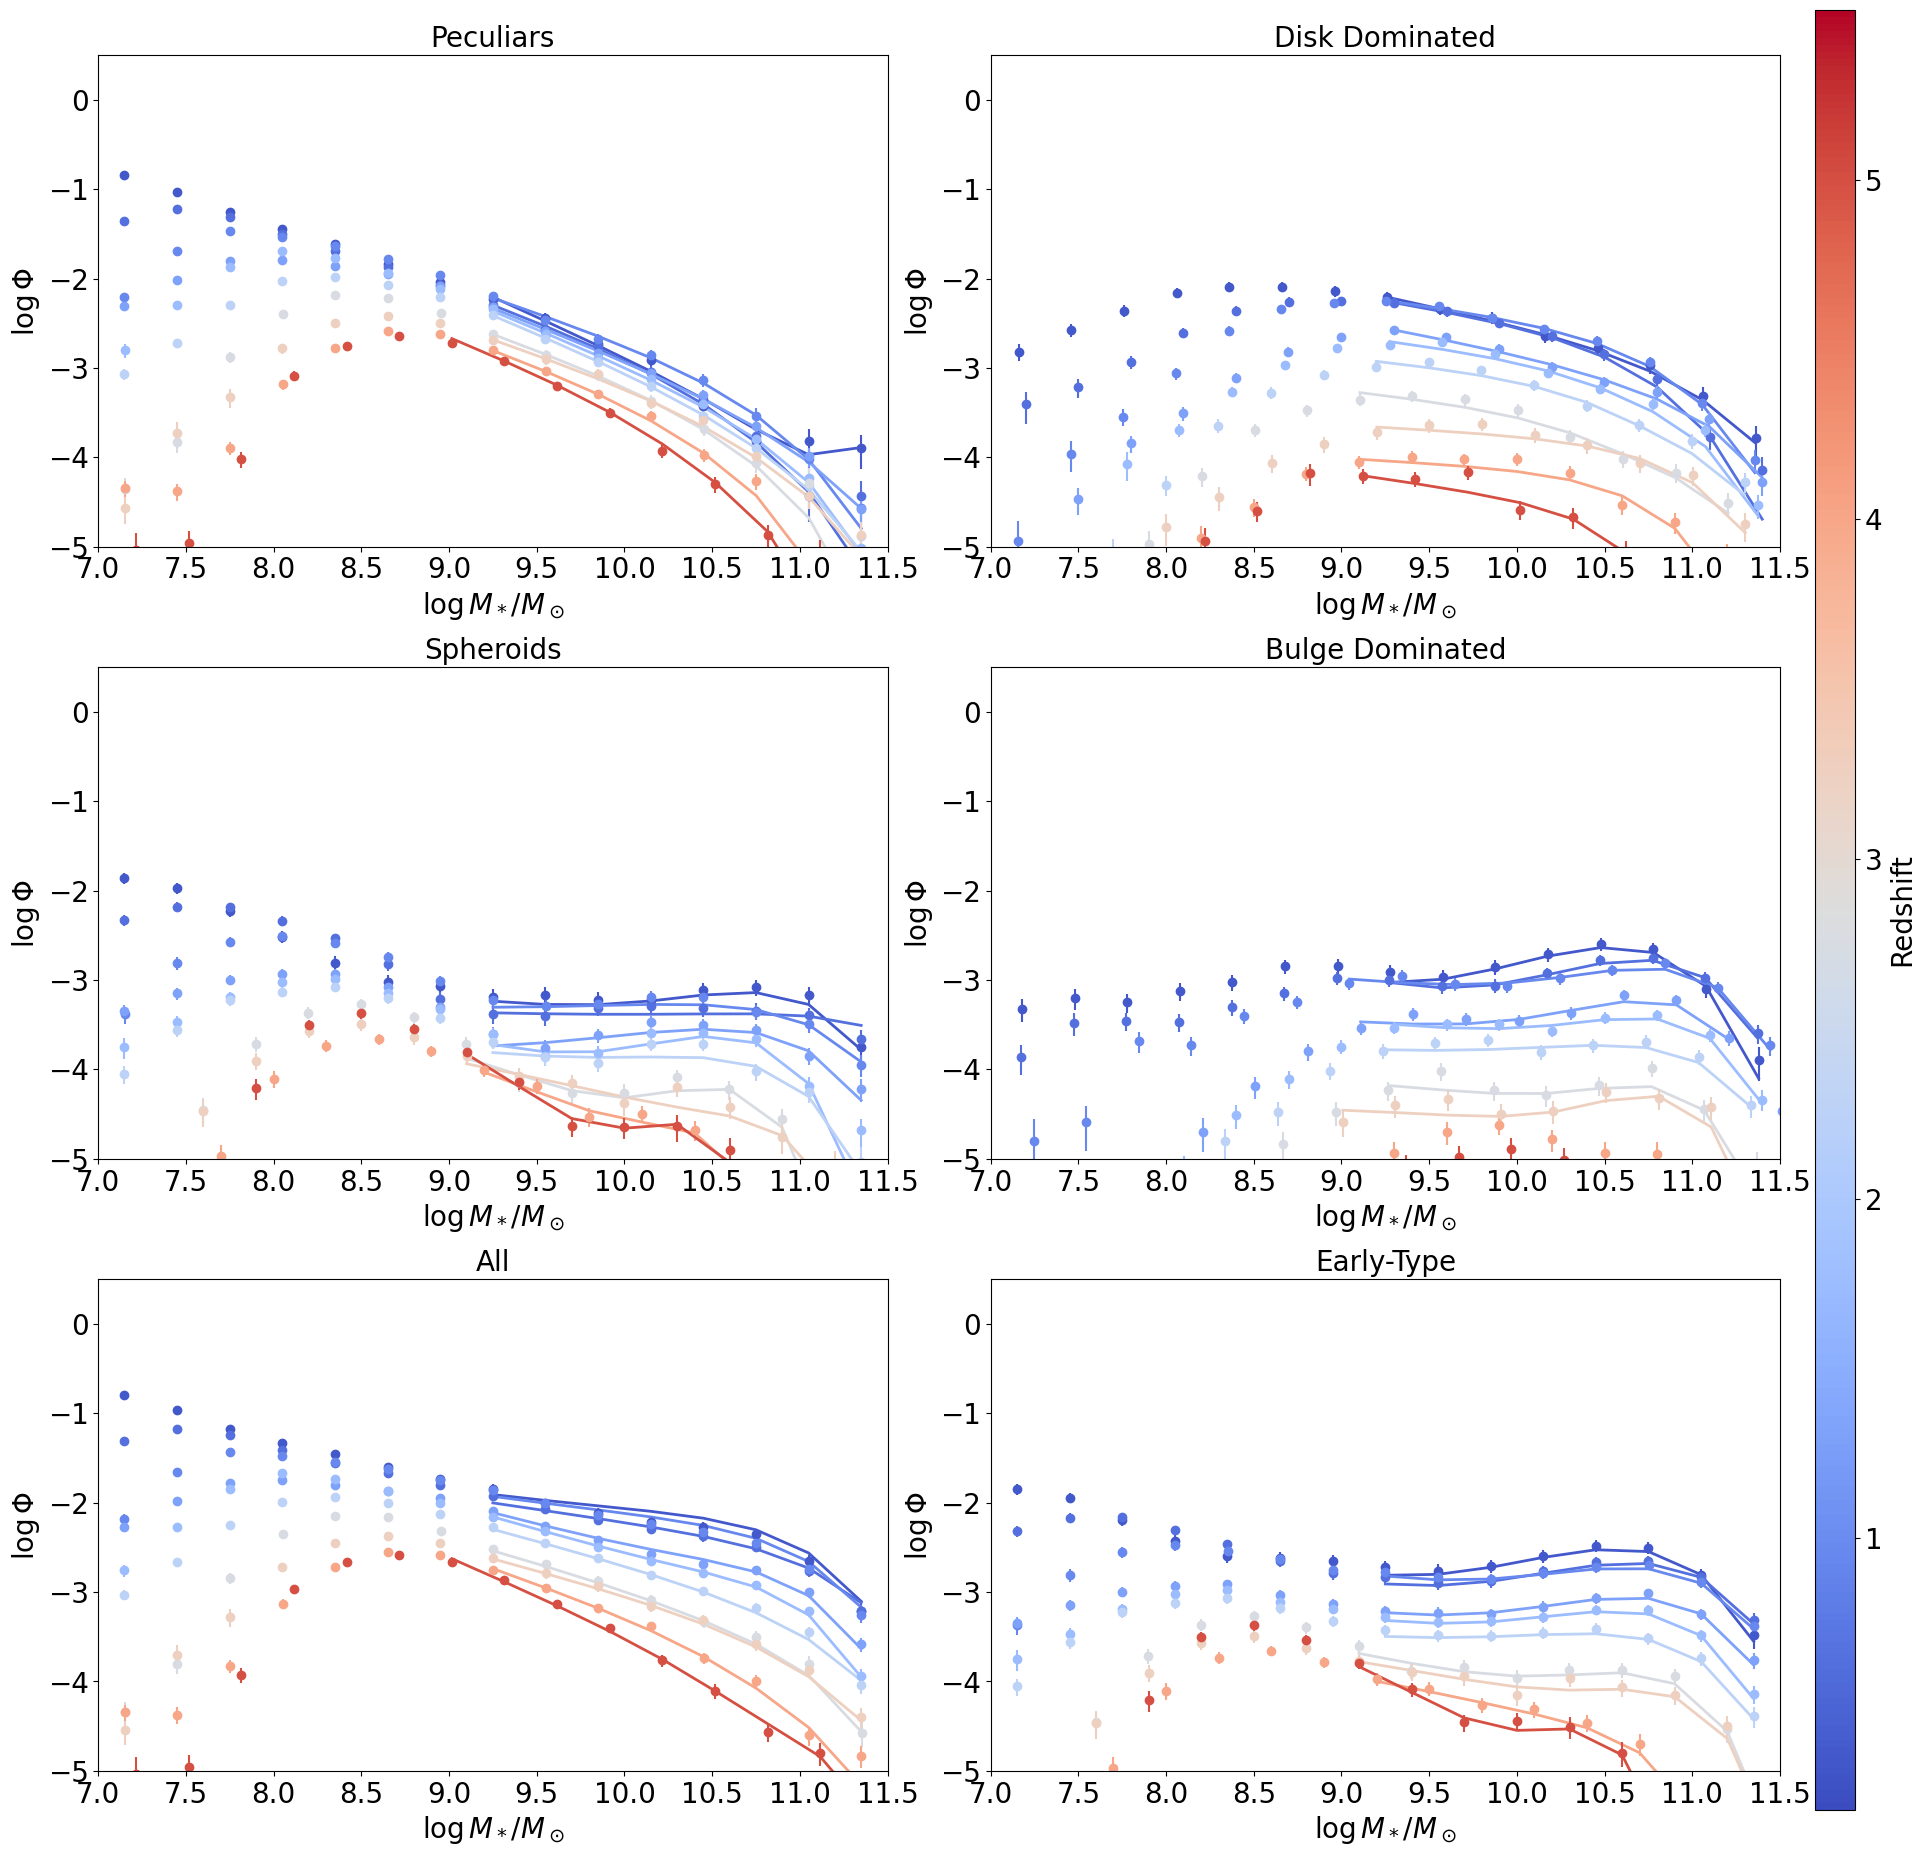

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize
zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]


def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))


# Load the observation dictionary
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph.pkl', 'rb') as file:
    smf_morph = pickle.load(file)

# Load the fit results
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_fit_results.pkl', 'rb') as file:
    fit_results = pickle.load(file)


# Morphological classes and labels
morph_class = ['irr', 'disk', 'sph', 'db', 'all', 'early']
morph_labels = {'sph': 'Spheroids', 'irr': 'Peculiars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}


# Setup the figure
plt.figure(figsize=(20, 30))  # Adjust as needed

# Prepare colormap
zmin = min(zbins)
zmax = max(zbins)
norm = Normalize(vmin=zmin, vmax=zmax)
sm = plt.cm.ScalarMappable(cmap=coolwarm, norm=norm)
sm.set_array([])

# Loop over morphological classes and plot
for idx, cl in enumerate(morph_class):
    ax = plt.subplot(5, 2, idx + 1)
    
    for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
        zmid = (zlow + zup) / 2
        color = coolwarm(norm(zmid))

        key_logmass = (zlow, cl, 'LogMassbin')
        key_fi = (zlow, cl, 'Fi')
        key_dfi = (zlow, cl, 'dFi')

        # Plot observational data if it exists
        if key_logmass in smf_morph and key_fi in smf_morph and key_dfi in smf_morph:
            LogMassbin = smf_morph[key_logmass]
            Fi = smf_morph[key_fi]
            dFi = smf_morph[key_dfi]
            upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
            lower_errors = np.log10(Fi) - np.log10(Fi - dFi)

            # Prepare error array for plotting in matplotlib
            errors = [lower_errors, upper_errors]
            valid = (Fi > 0) & (dFi > 0) & (LogMassbin<11.5) & (LogMassbin>9)

            ax.errorbar(LogMassbin, np.log10(Fi), yerr=errors, fmt='o', color=color, label=f'{zlow:.1f} < z < {zup:.1f}')

        # Plot MCMC fitted line if it exists
        if (zlow, cl) in fit_results:
            params = fit_results[(zlow, cl)]['params_50']
            logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc = params
            # Assuming LogMassbin is sorted and available for fitting lines
            #print(LogMassbin)
            fitted_line = np.log10(double_schechter_function(LogMassbin[valid], logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc))
            ax.plot(LogMassbin[valid], fitted_line, color=color, lw=2)

    ax.set_title(morph_labels.get(cl, cl), fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    ax.set_ylim(-5,0.5)
    ax.set_xlim(7,11.5)
    #ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.legend(fontsize=15, title="Redshift Range", title_fontsize='13')

# Adjust layout and add colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])
cbar_ax = plt.gcf().add_axes([0.91, 0.4, 0.02, 0.6])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Redshift', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.show()


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/2511654920.py:57: RuntimeWarning: invalid value encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/2511654920.py:56: RuntimeWarning: divide by zero encountered in log10
  upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/2511654920.py:57: RuntimeWarning: divide by zero encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/2511654920.py:63: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(LogMassbin, np.log10(Fi), yerr=errors, fmt='o', color=color, label=f'{zlow:.1f} < z < {zup:.1f}')
/Users/marchuertascompany/soft/miniforge3/envs/tfenv23/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3642: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1

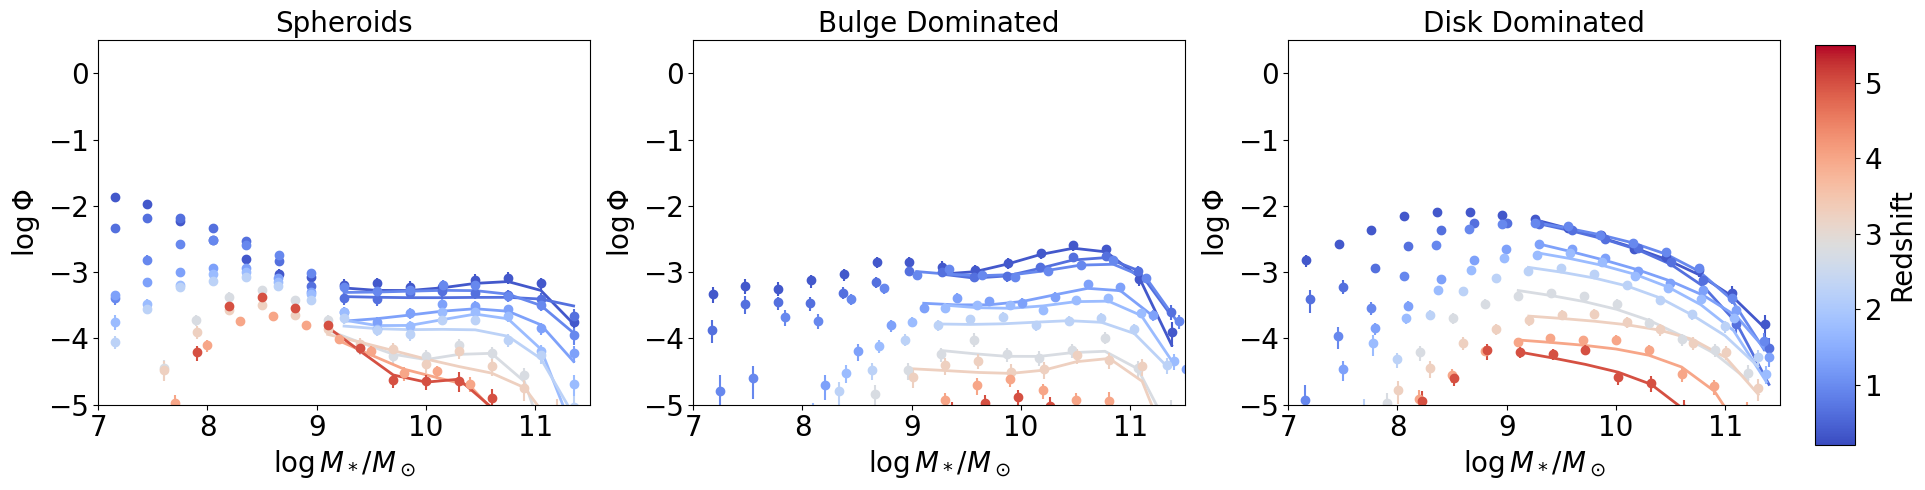

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize
zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]


def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))


# Load the observation dictionary
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph.pkl', 'rb') as file:
    smf_morph = pickle.load(file)

# Load the fit results
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_fit_results.pkl', 'rb') as file:
    fit_results = pickle.load(file)


# Morphological classes and labels
morph_class = ['sph', 'db', 'disk']
morph_labels = {'sph': 'Spheroids', 'irr': 'Peculiars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}


# Setup the figure
plt.figure(figsize=(20, 5))  # Adjust as needed

# Prepare colormap
zmin = min(zbins)
zmax = max(zbins)
norm = Normalize(vmin=zmin, vmax=zmax)
sm = plt.cm.ScalarMappable(cmap=coolwarm, norm=norm)
sm.set_array([])

# Loop over morphological classes and plot
for idx, cl in enumerate(morph_class):
    ax = plt.subplot(1, 3, idx + 1)
    
    for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
        zmid = (zlow + zup) / 2
        color = coolwarm(norm(zmid))

        key_logmass = (zlow, cl, 'LogMassbin')
        key_fi = (zlow, cl, 'Fi')
        key_dfi = (zlow, cl, 'dFi')

        # Plot observational data if it exists
        if key_logmass in smf_morph and key_fi in smf_morph and key_dfi in smf_morph:
            LogMassbin = smf_morph[key_logmass]
            Fi = smf_morph[key_fi]
            dFi = smf_morph[key_dfi]
            upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
            lower_errors = np.log10(Fi) - np.log10(Fi - dFi)

            # Prepare error array for plotting in matplotlib
            errors = [lower_errors, upper_errors]
            valid = (Fi > 0) & (dFi > 0) & (LogMassbin<11.5) & (LogMassbin>9)

            ax.errorbar(LogMassbin, np.log10(Fi), yerr=errors, fmt='o', color=color, label=f'{zlow:.1f} < z < {zup:.1f}')

        # Plot MCMC fitted line if it exists
        if (zlow, cl) in fit_results:
            params = fit_results[(zlow, cl)]['params_50']
            logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc = params
            # Assuming LogMassbin is sorted and available for fitting lines
            #print(LogMassbin)
            fitted_line = np.log10(double_schechter_function(LogMassbin[valid], logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc))
            ax.plot(LogMassbin[valid], fitted_line, color=color, lw=2)

    ax.set_title(morph_labels.get(cl, cl), fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    ax.set_ylim(-5,0.5)
    ax.set_xlim(7,11.5)
    #ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.legend(fontsize=15, title="Redshift Range", title_fontsize='13')

# Adjust layout and add colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])
cbar_ax = plt.gcf().add_axes([0.91, 0.1, 0.02, 0.8])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Redshift', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.savefig('/Users/marchuertascompany/Dropbox/Apps/Overleaf/morpho_SMF_COSMOSWeb/figures/SMF_hubble_types.png')
plt.show()


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1483/1739302985.py:57: RuntimeWarning: invalid value encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1483/1739302985.py:71: RuntimeWarning: divide by zero encountered in log10
  fitted_line = np.log10(double_schechter_function(LogMassbin[valid], logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc))
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1483/1739302985.py:56: RuntimeWarning: divide by zero encountered in log10
  upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1483/1739302985.py:57: RuntimeWarning: divide by zero encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1483/1739302985.py:63: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(LogMassbin, np.log10(Fi

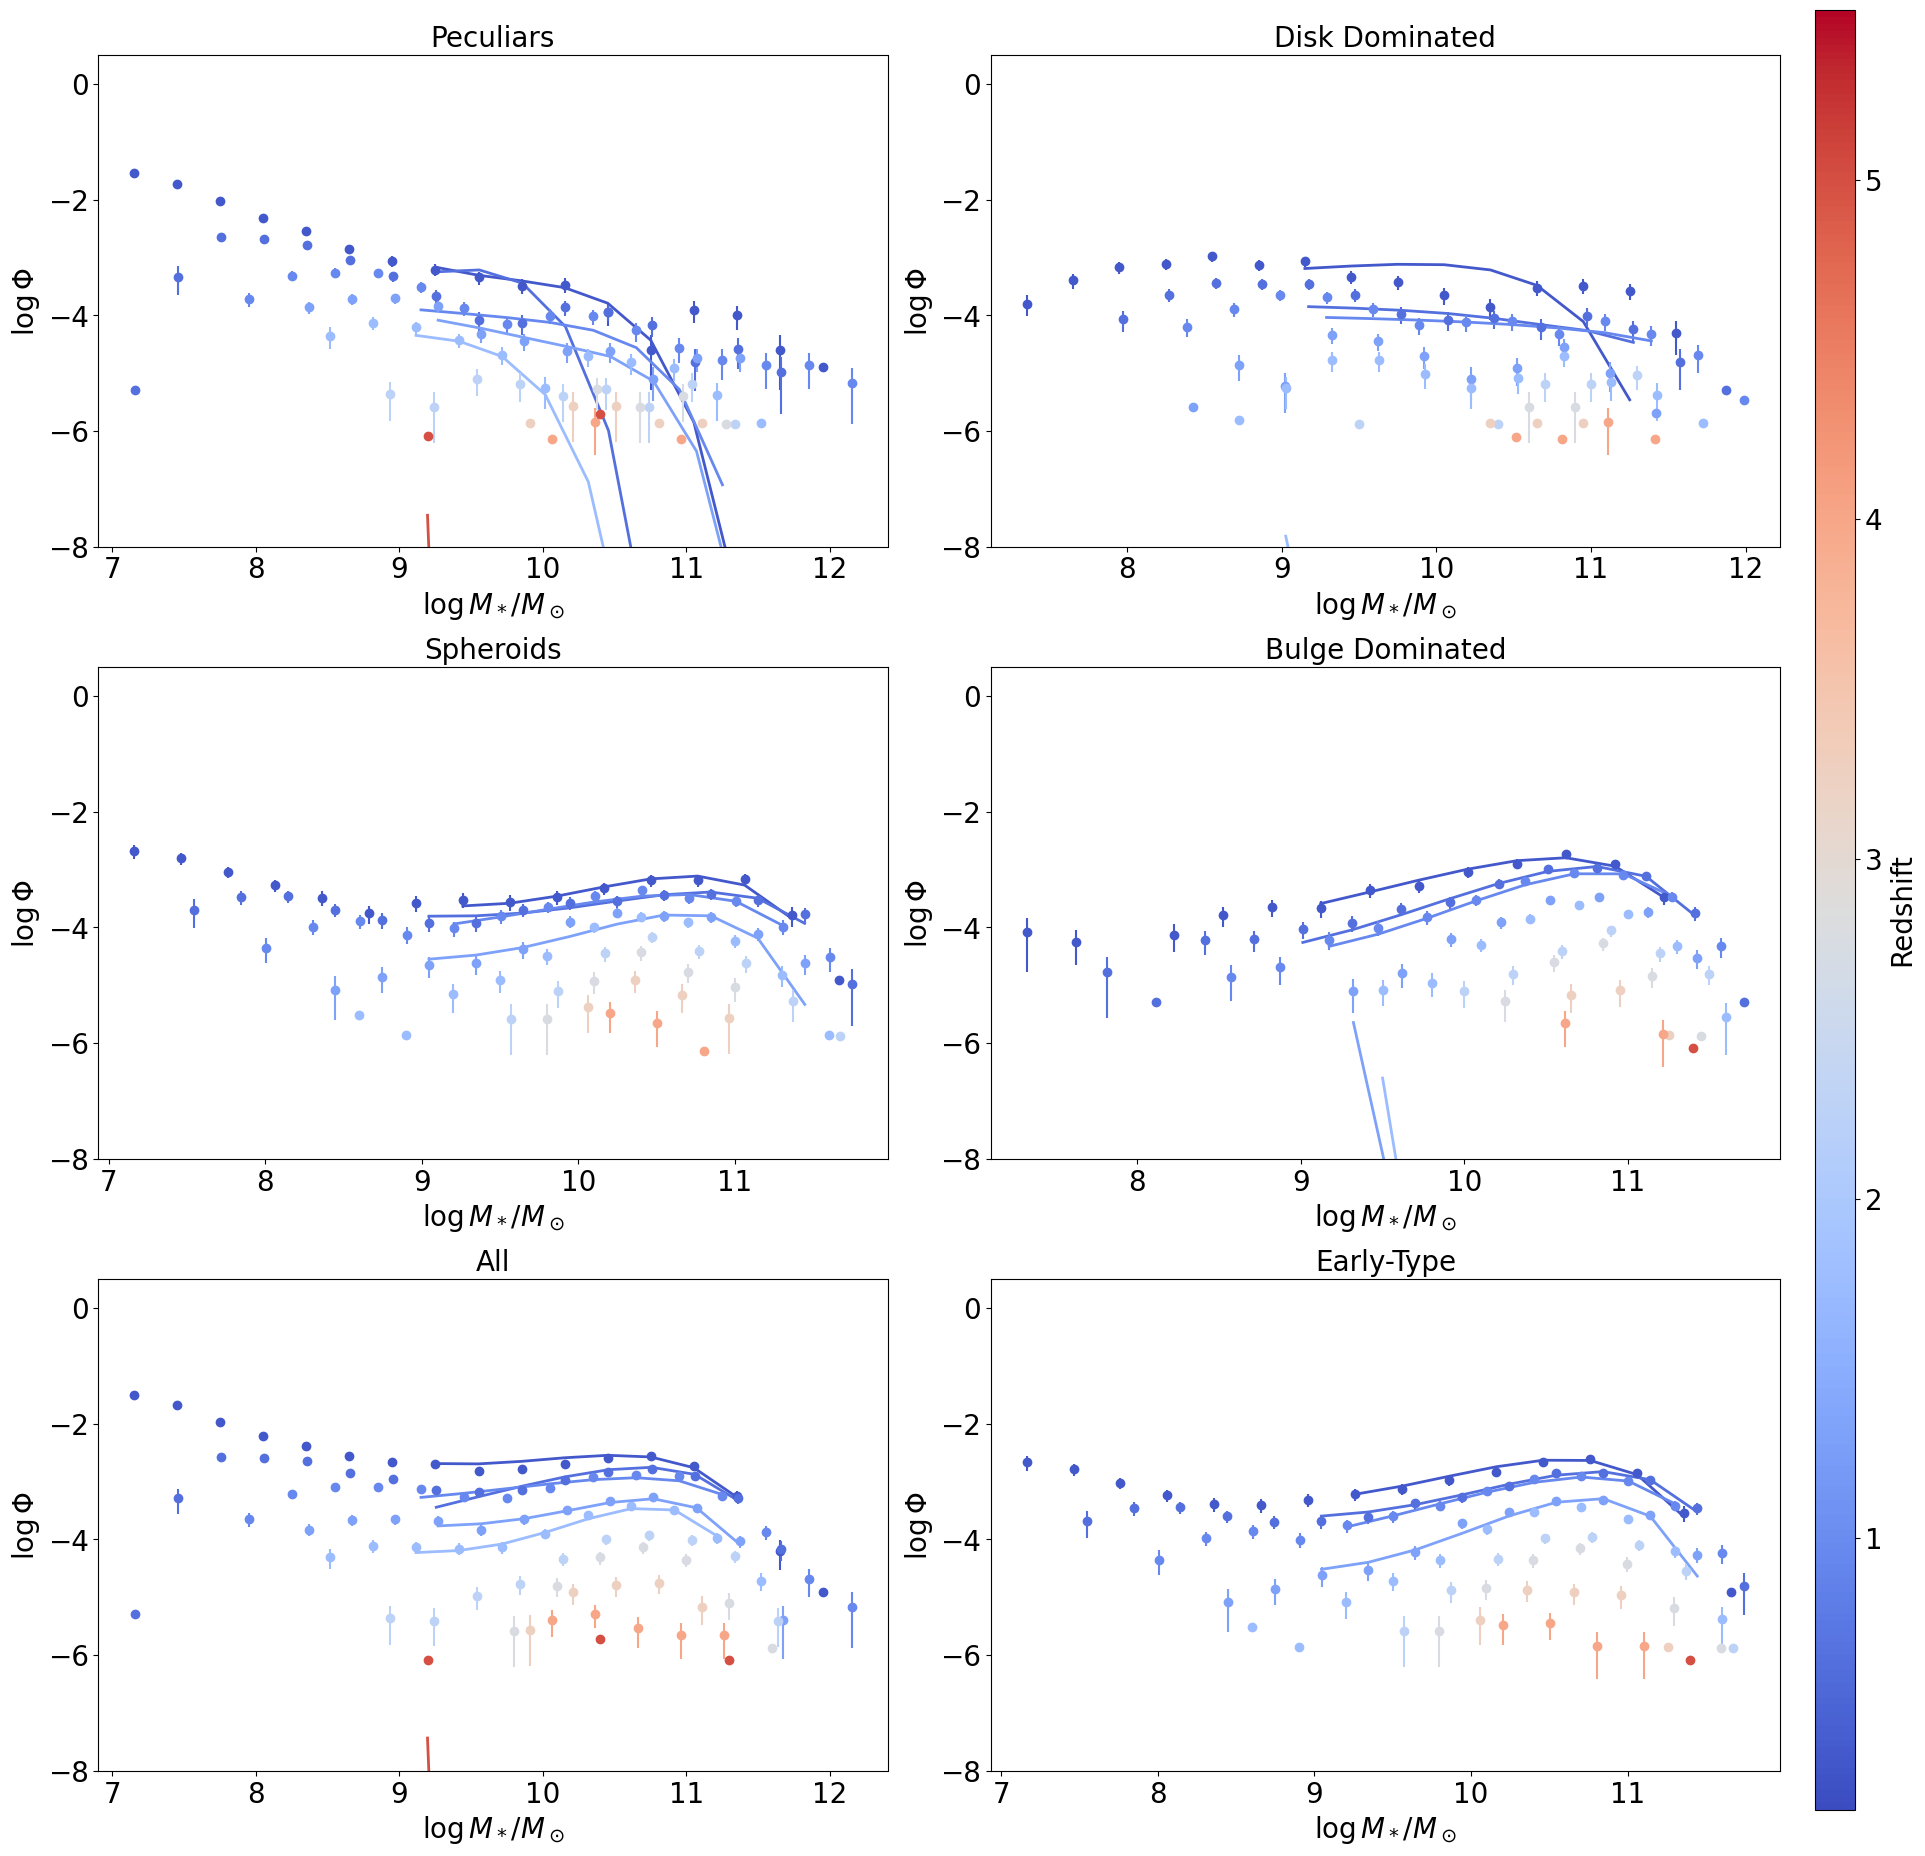

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize
zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]


def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))


# Load the observation dictionary
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph_Q.pkl', 'rb') as file:
    smf_morph = pickle.load(file)

# Load the fit results
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph_Q_fit_results.pkl', 'rb') as file:
    fit_results = pickle.load(file)


# Morphological classes and labels
morph_class = ['irr', 'disk', 'sph', 'db', 'all', 'early']
morph_labels = {'sph': 'Spheroids', 'irr': 'Peculiars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}


# Setup the figure
plt.figure(figsize=(20, 30))  # Adjust as needed

# Prepare colormap
zmin = min(zbins)
zmax = max(zbins)
norm = Normalize(vmin=zmin, vmax=zmax)
sm = plt.cm.ScalarMappable(cmap=coolwarm, norm=norm)
sm.set_array([])

# Loop over morphological classes and plot
for idx, cl in enumerate(morph_class):
    ax = plt.subplot(5, 2, idx + 1)
    
    for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
        zmid = (zlow + zup) / 2
        color = coolwarm(norm(zmid))

        key_logmass = (zlow, cl, 'LogMassbin')
        key_fi = (zlow, cl, 'Fi')
        key_dfi = (zlow, cl, 'dFi')

        # Plot observational data if it exists
        if key_logmass in smf_morph and key_fi in smf_morph and key_dfi in smf_morph:
            LogMassbin = smf_morph[key_logmass]
            Fi = smf_morph[key_fi]
            dFi = smf_morph[key_dfi]
            upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
            lower_errors = np.log10(Fi) - np.log10(Fi - dFi)

            # Prepare error array for plotting in matplotlib
            errors = [lower_errors, upper_errors]
            valid = (Fi > 0) & (dFi > 0) & (LogMassbin<11.5) & (LogMassbin>9)

            ax.errorbar(LogMassbin, np.log10(Fi), yerr=errors, fmt='o', color=color, label=f'{zlow:.1f} < z < {zup:.1f}')

        # Plot MCMC fitted line if it exists
        if (zlow, cl) in fit_results:
            params = fit_results[(zlow, cl)]['params_50']
            logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc = params
            # Assuming LogMassbin is sorted and available for fitting lines
            #print(LogMassbin)
            fitted_line = np.log10(double_schechter_function(LogMassbin[valid], logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc))
            ax.plot(LogMassbin[valid], fitted_line, color=color, lw=2)

    ax.set_title(morph_labels.get(cl, cl), fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    ax.set_ylim(-8,0.5)
    #ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.legend(fontsize=15, title="Redshift Range", title_fontsize='13')

# Adjust layout and add colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])
cbar_ax = plt.gcf().add_axes([0.91, 0.4, 0.02, 0.6])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Redshift', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.show()


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1483/1553499406.py:56: RuntimeWarning: divide by zero encountered in log10
  upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1483/1553499406.py:57: RuntimeWarning: divide by zero encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1483/1553499406.py:57: RuntimeWarning: invalid value encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1483/1553499406.py:63: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(LogMassbin, np.log10(Fi), yerr=errors, fmt='o', color=color, label=f'{zlow:.1f} < z < {zup:.1f}')
/Users/marchuertascompany/soft/miniforge3/envs/tfenv23/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3642: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1

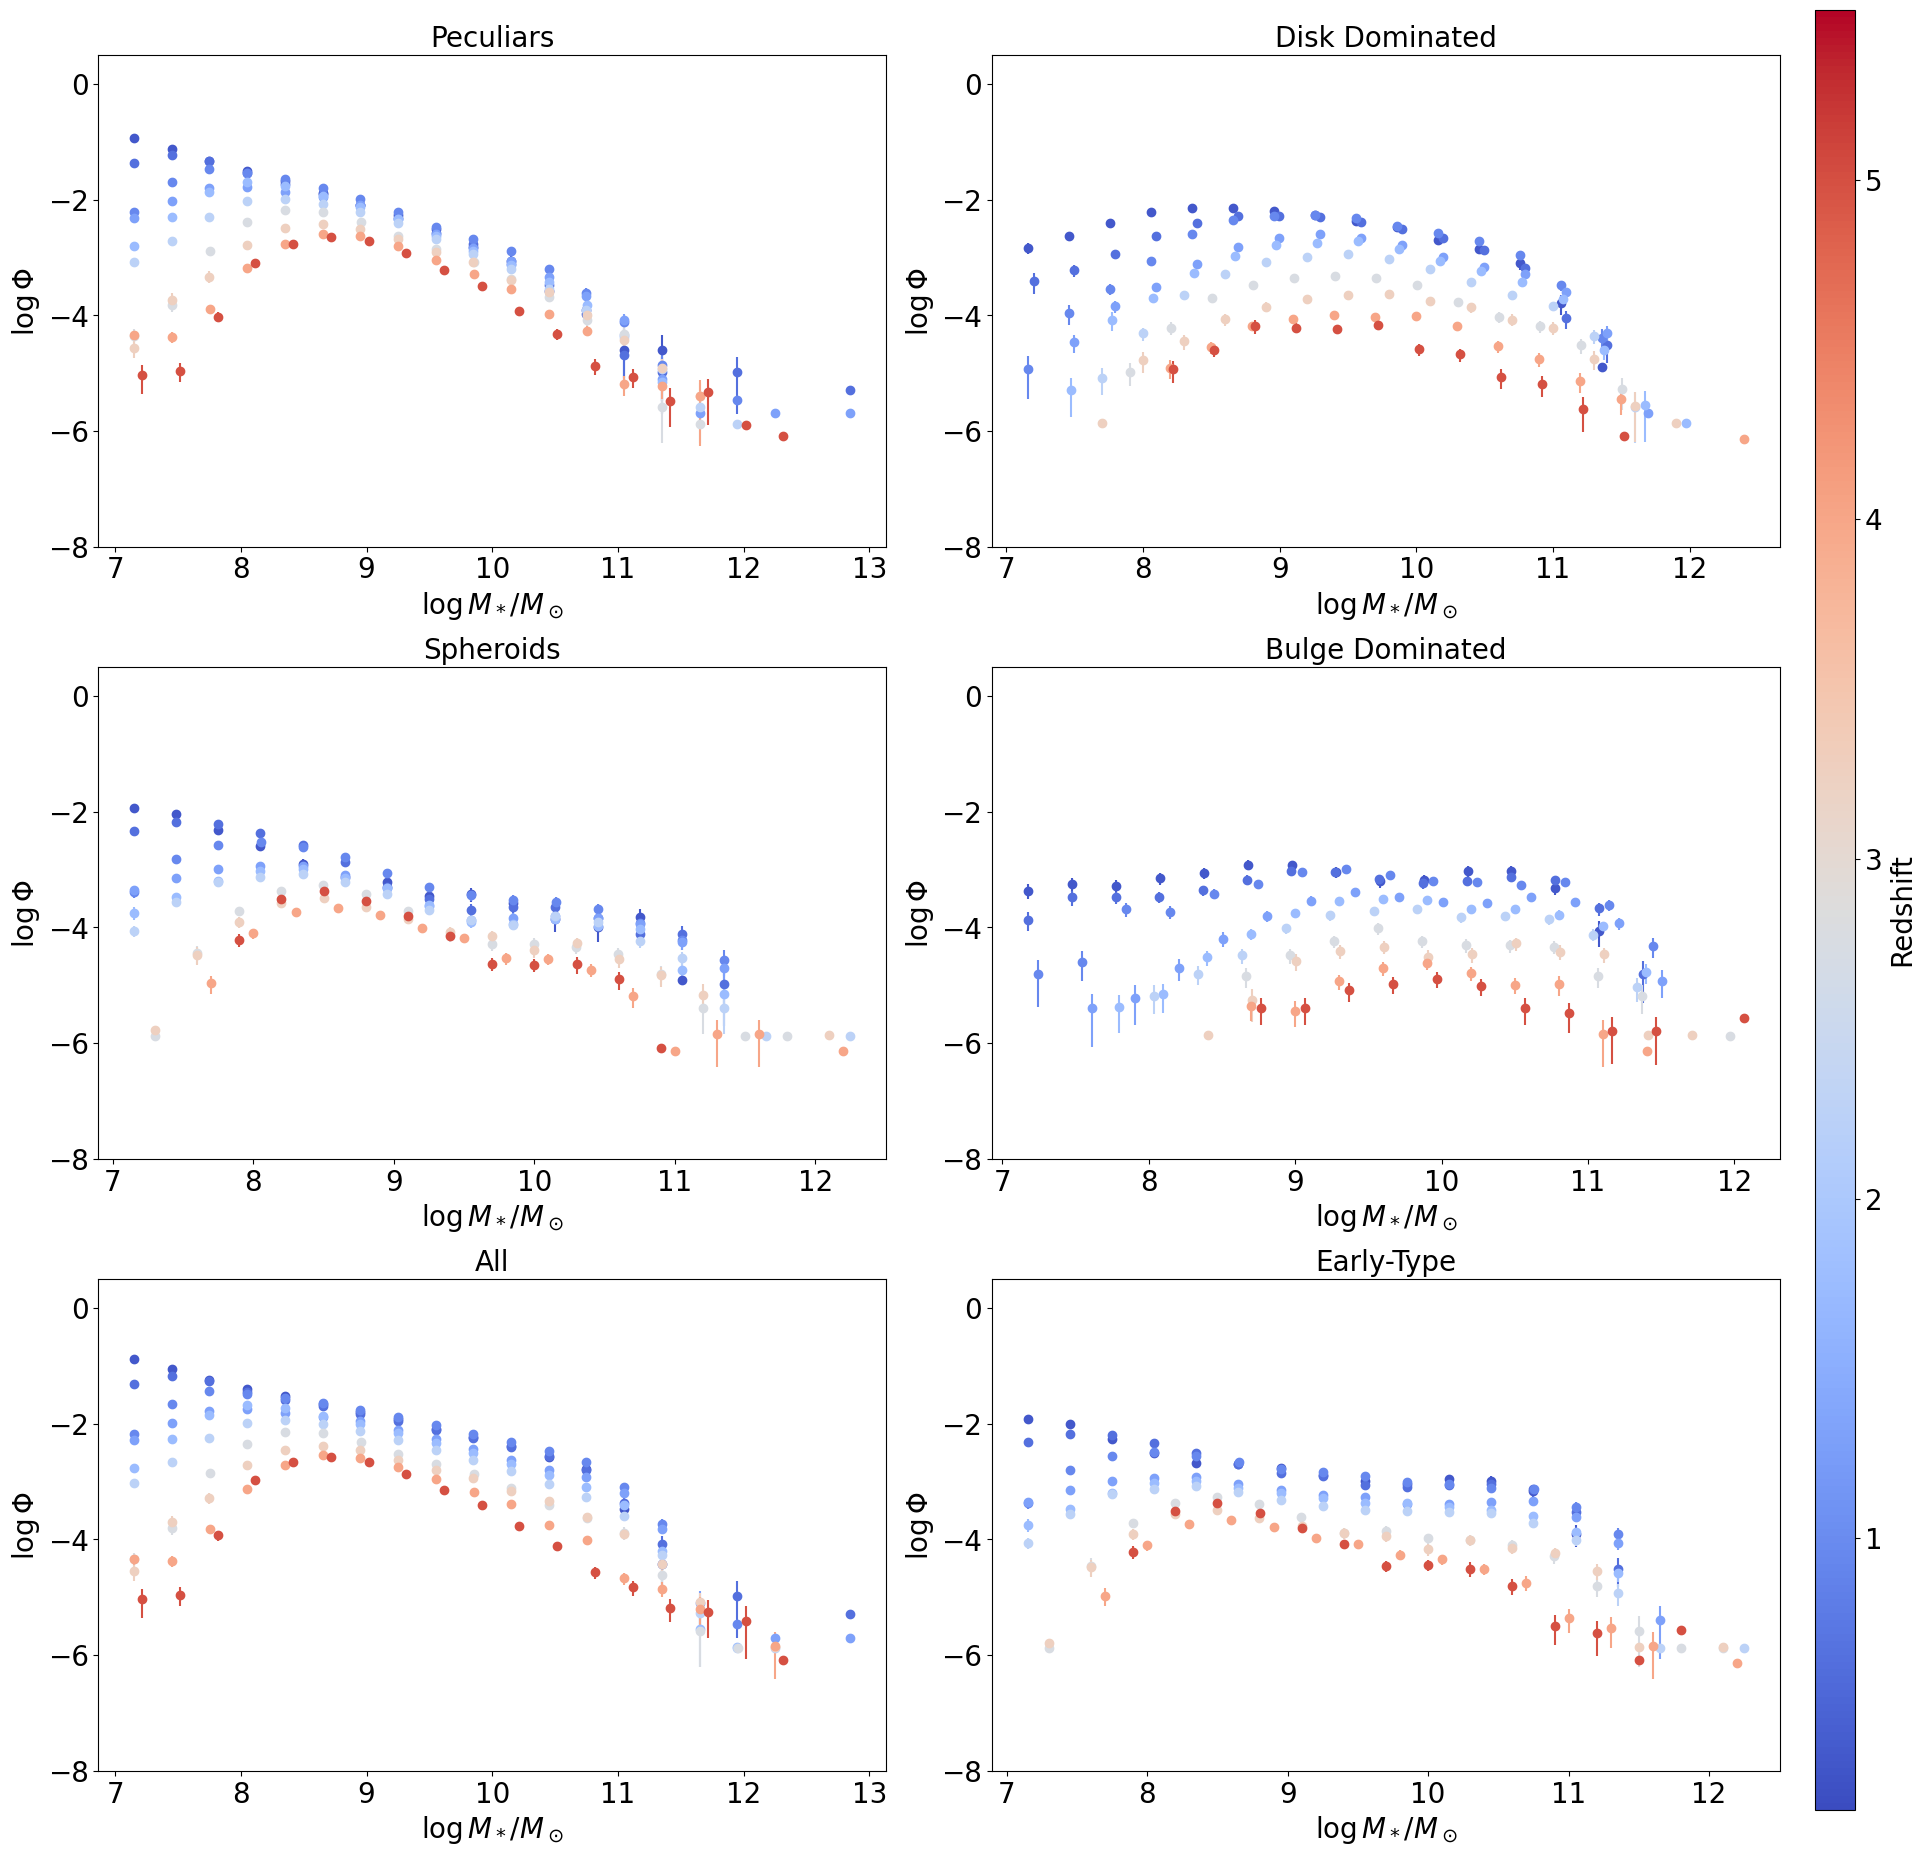

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize
zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]


def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))


# Load the observation dictionary
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph_SF.pkl', 'rb') as file:
    smf_morph = pickle.load(file)

# Load the fit results
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph_SF_fit_results.pkl', 'rb') as file:
    fit_results = pickle.load(file)


# Morphological classes and labels
morph_class = ['irr', 'disk', 'sph', 'db', 'all', 'early']
morph_labels = {'sph': 'Spheroids', 'irr': 'Peculiars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}


# Setup the figure
plt.figure(figsize=(20, 30))  # Adjust as needed

# Prepare colormap
zmin = min(zbins)
zmax = max(zbins)
norm = Normalize(vmin=zmin, vmax=zmax)
sm = plt.cm.ScalarMappable(cmap=coolwarm, norm=norm)
sm.set_array([])

# Loop over morphological classes and plot
for idx, cl in enumerate(morph_class):
    ax = plt.subplot(5, 2, idx + 1)
    
    for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
        zmid = (zlow + zup) / 2
        color = coolwarm(norm(zmid))

        key_logmass = (zlow, cl, 'LogMassbin')
        key_fi = (zlow, cl, 'Fi')
        key_dfi = (zlow, cl, 'dFi')

        # Plot observational data if it exists
        if key_logmass in smf_morph and key_fi in smf_morph and key_dfi in smf_morph:
            LogMassbin = smf_morph[key_logmass]
            Fi = smf_morph[key_fi]
            dFi = smf_morph[key_dfi]
            upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
            lower_errors = np.log10(Fi) - np.log10(Fi - dFi)

            # Prepare error array for plotting in matplotlib
            errors = [lower_errors, upper_errors]
            valid = (Fi > 0) & (dFi > 0) & (LogMassbin<11.5) & (LogMassbin>9)

            ax.errorbar(LogMassbin, np.log10(Fi), yerr=errors, fmt='o', color=color, label=f'{zlow:.1f} < z < {zup:.1f}')

        # Plot MCMC fitted line if it exists
        if (zlow, cl) in fit_results:
            params = fit_results[(zlow, cl)]['params_50']
            logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc = params
            # Assuming LogMassbin is sorted and available for fitting lines
            #print(LogMassbin)
            fitted_line = np.log10(double_schechter_function(LogMassbin[valid], logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc))
            print(fitted_line)
            ax.plot(LogMassbin[valid], fitted_line, color=color, lw=2)

    ax.set_title(morph_labels.get(cl, cl), fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    ax.set_ylim(-8,0.5)
    #ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.legend(fontsize=15, title="Redshift Range", title_fontsize='13')

# Adjust layout and add colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])
cbar_ax = plt.gcf().add_axes([0.91, 0.4, 0.02, 0.6])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Redshift', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.show()


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/1722401268.py:57: RuntimeWarning: invalid value encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/1722401268.py:56: RuntimeWarning: divide by zero encountered in log10
  upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/1722401268.py:57: RuntimeWarning: divide by zero encountered in log10
  lower_errors = np.log10(Fi) - np.log10(Fi - dFi)
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/1722401268.py:63: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(LogMassbin, np.log10(Fi), yerr=errors, fmt='o', color=color, label=f'{zlow:.1f} < z < {zup:.1f}')


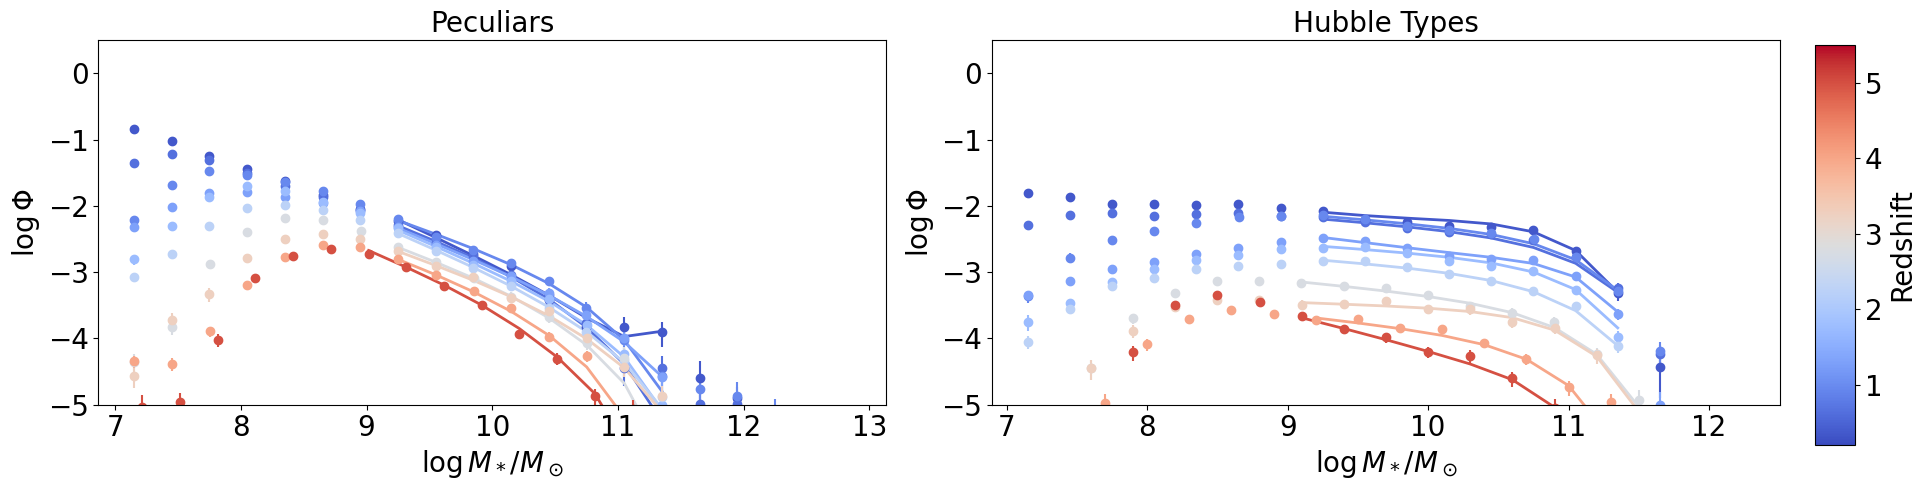

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize
zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]


def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))


# Load the observation dictionary
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_morph.pkl', 'rb') as file:
    smf_morph = pickle.load(file)

# Load the fit results
with open('/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/smf_fit_results.pkl', 'rb') as file:
    fit_results = pickle.load(file)


# Morphological classes and labels
morph_class = ['irr', 'reg']
morph_labels = {'sph': 'Spheroids', 'irr': 'Peculiars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type','reg':'Hubble Types'}


# Setup the figure
plt.figure(figsize=(20, 5))  # Adjust as needed

# Prepare colormap
zmin = min(zbins)
zmax = max(zbins)
norm = Normalize(vmin=zmin, vmax=zmax)
sm = plt.cm.ScalarMappable(cmap=coolwarm, norm=norm)
sm.set_array([])

# Loop over morphological classes and plot
for idx, cl in enumerate(morph_class):
    ax = plt.subplot(1, 2, idx + 1)
    
    for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
        zmid = (zlow + zup) / 2
        color = coolwarm(norm(zmid))

        key_logmass = (zlow, cl, 'LogMassbin')
        key_fi = (zlow, cl, 'Fi')
        key_dfi = (zlow, cl, 'dFi')

        # Plot observational data if it exists
        if key_logmass in smf_morph and key_fi in smf_morph and key_dfi in smf_morph:
            LogMassbin = smf_morph[key_logmass]
            Fi = smf_morph[key_fi]
            dFi = smf_morph[key_dfi]
            upper_errors = np.log10(Fi + dFi) - np.log10(Fi)
            lower_errors = np.log10(Fi) - np.log10(Fi - dFi)

            # Prepare error array for plotting in matplotlib
            errors = [lower_errors, upper_errors]
            valid = (Fi > 0) & (dFi > 0) & (LogMassbin<11.5) & (LogMassbin>9)

            ax.errorbar(LogMassbin, np.log10(Fi), yerr=errors, fmt='o', color=color, label=f'{zlow:.1f} < z < {zup:.1f}')

        # Plot MCMC fitted line if it exists
        if (zlow, cl) in fit_results:
            params = fit_results[(zlow, cl)]['params_50']
            logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc = params
            # Assuming LogMassbin is sorted and available for fitting lines
            #print(LogMassbin)
            fitted_line = np.log10(double_schechter_function(LogMassbin[valid], logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc))
            ax.plot(LogMassbin[valid], fitted_line, color=color, lw=2)

    ax.set_title(morph_labels.get(cl, cl), fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    ax.set_ylim(-5,0.5)
    #ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.legend(fontsize=15, title="Redshift Range", title_fontsize='13')

# Adjust layout and add colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])
cbar_ax = plt.gcf().add_axes([0.91, 0.1, 0.02, 0.8])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Redshift', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.savefig('/Users/marchuertascompany/Dropbox/Apps/Overleaf/morpho_SMF_COSMOSWeb/figures/SMF_peculiar_hubble.png')

plt.show()


In [219]:
# LaTeX function to format the table entry with errors
def format_value_with_error(value, error_minus, error_plus):
    return f"${value:.2f}_{{-{error_minus:.2f}}}^{{+{error_plus:.2f}}}$"

# Function to create the LaTeX table for a given morphology
def create_latex_table(morph, params_dict, morph_labels):
    # LaTeX table header
    latex_table = r"""\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
\hline
Redshift & $\log M^*$ & $\log \phi_1^*$ & $\alpha_1$ & $\log \phi_2^*$ & $\alpha_2$ \\ 
\hline
"""
    # Iterate over each redshift bin and add a row to the LaTeX table
    for zbin in sorted(params_dict.keys()):
        if morph in zbin:  # Check if the current morphology matches the bin
            # Retrieve parameters and their percentiles
            params_50 = params_dict[zbin]['params_50']
            params_16 = params_dict[zbin]['params_16']
            params_84 = params_dict[zbin]['params_84']

            # Format each parameter with the 16th and 84th percentile errors
            m_star_str = format_value_with_error(params_50[0], params_50[0] - params_16[0], params_84[0] - params_50[0])
            phi1_str = format_value_with_error(params_50[3], params_50[3] - params_16[3], params_84[3] - params_50[3])
            alpha1_str = format_value_with_error(params_50[1], params_50[1] - params_16[1], params_84[1] - params_50[1])
            phi2_str = format_value_with_error(params_50[4], params_50[4] - params_16[4], params_84[4] - params_50[4])
            alpha2_str = format_value_with_error(params_50[2], params_50[2] - params_16[2], params_84[2] - params_50[2])

            # Add the full redshift bin range instead of just the lower limit
            zrange_str = f"${zbin[0]:.2f} \leq z < {zbin[1]:.2f}$"

            # Add a row to the LaTeX table for the current redshift bin
            latex_table += f"{zrange_str} & {m_star_str} & {phi1_str} & {alpha1_str} & {phi2_str} & {alpha2_str} \\\\[0.5ex] \n"  # Extra space after the row

    # LaTeX table footer
    latex_table += r"""\hline
\end{tabular}
\caption{Fit results for """ + morph_labels[morph] + r"""}
\label{tab:""" + morph + r"""}
\end{table}
"""

    return latex_table

# Assume the params_dict and morph_labels are already defined
for morph in morph_class:
    latex_table = create_latex_table(morph, params_only_results, morph_labels)
    print(latex_table)


ValueError: Unknown format code 'f' for object of type 'str'

In [235]:
import numpy as np
from scipy.integrate import quad


morph_class=['reg','irr','disk','db','sph']

number_densities = {morph: [] for morph in morph_class}

for zbin in zbins[:-1]:
    for morph in morph_class:
        key = (zbin, morph)
        if key in fit_results:
            params = fit_results[key]['params_50']
            logM_star, alpha1, alpha2, logphi1, logphi2 = params

            # Perform numerical integration over the mass range
            mass_min = 10  # M_sun
            mass_max = 11.5  # M_sun
            integral, _ = quad(double_schechter_function, mass_min, mass_max, args=(logM_star, alpha1, alpha2, logphi1, logphi2))
            number_densities[morph].append((zbin, integral))


In [198]:
print(number_densities['reg'])

[(0.2, 0.0054284817020754635), (0.5, 0.00348508271960308), (0.8, 0.003924032802908381), (1.1, 0.0018344638954021887), (1.5, 0.0014293027179380889), (2, 0.0007688764366393804), (2.5, 0.0003007145408711456), (3, 0.0002384434112291051), (3.5, 7.3050211274912e-05), (4.5, 3.14760648583832e-05)]


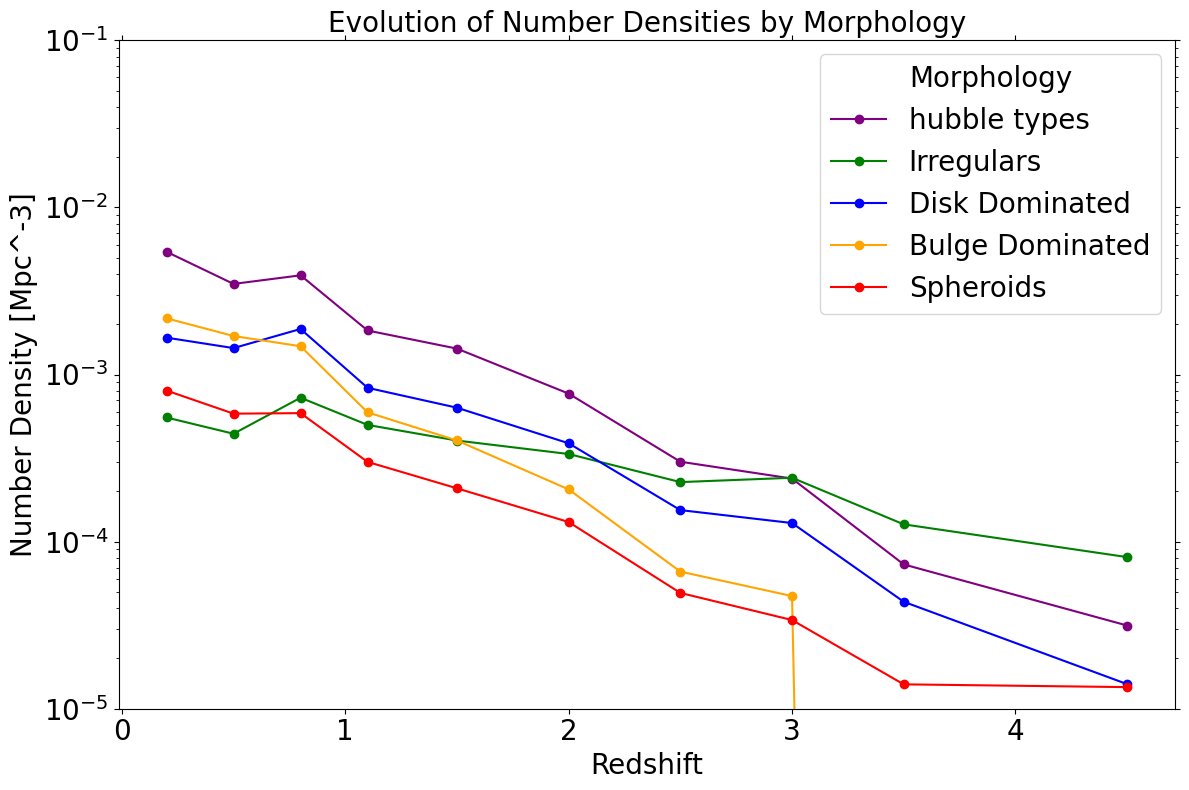

In [236]:
import matplotlib.pyplot as plt

# Setup the figure
plt.figure(figsize=(12, 8))

# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'irr': 'green',
    'disk': 'blue',
    'db': 'orange',
    'all': 'black',
    'early': 'orange',
    'sph':'red'
}

morph_labels = {'reg':'hubble types','sph': 'Spheroids', 'irr': 'Irregulars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}

# Loop over each morphology and plot the data
for morph, data in number_densities.items():
    if data:  # Check if there is data to plot
        redshifts, densities = zip(*data)
        plt.plot(redshifts, densities, label=morph_labels[morph], marker='o', linestyle='-', color=colors[morph])

# Set y-axis to log scale
plt.yscale('log')

# Remove grid
# plt.grid(False) is implied by absence of plt.grid()

# Set axes ticks on all sides
plt.tick_params(axis='both', which='both', labelsize=20, labeltop=False, labelright=False, top=True, right=True)

# Add labels and legend
plt.xlabel('Redshift', fontsize=20)
plt.ylabel('Number Density [Mpc^-3]', fontsize=20)
plt.title('Evolution of Number Densities by Morphology', fontsize=20)
plt.legend(title='Morphology', title_fontsize='20', fontsize=20)
plt.ylim((10e-6,10e-2))

# Show the plot
plt.tight_layout()
plt.show()




In [26]:
import h5py
import numpy as np
from scipy.integrate import quad
from scipy.stats import median_abs_deviation

morph_class=['reg','irr','all']
# Initialize a dictionary to store the results
number_densities = {morph: [] for morph in morph_class}

def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))


zbins =  [0.2,0.5,0.8,1.1,1.5,2,2.5,3,3.5,4.5,5.5]
# Process each saved HDF5 file
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    for morph in morph_class:
        filename = f'/Users/marchuertascompany/Documents/data/COSMOS-Web/SMF/{zlow}_{morph}_sampler.h5'
        with h5py.File(filename, 'r') as f:
            # Load the chain and remove the burn-in period
            chain = f['chain'][7000:, :, :]  # Discard the first 3000 samples
            flat_chain = chain.reshape(-1, chain.shape[-1])  # Flatten the chain

            # Randomly select a subset of samples if the full set is too large
            indices = np.random.choice(flat_chain.shape[0], size=1000, replace=False)
            sample_subset = flat_chain[indices]

            # Compute the integrals for each sample
            integrals = []
            for sample in sample_subset:
                logM_star, alpha1, alpha2, logphi1, logphi2 = sample
                integral, _ = quad(double_schechter_function, 10, 12, args=(logM_star, alpha1, alpha2, logphi1, logphi2))
                integrals.append(integral)

            # Store the mean and standard deviation of the integrals
            mean_integral = np.median(integrals)
            #print(mean_integral)
            std_integral = median_abs_deviation(integrals, scale='normal')
            #print(std_integral)
            number_densities[morph].append(((zlow+zup)*0.5, mean_integral, std_integral))

# Here, you can now use number_densities for further analysis or plotting


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1071/3249693418.py:7: RuntimeWarning: invalid value encountered in log10
  lower_log_error = np.log10(V) - np.log10(V - delta_down)


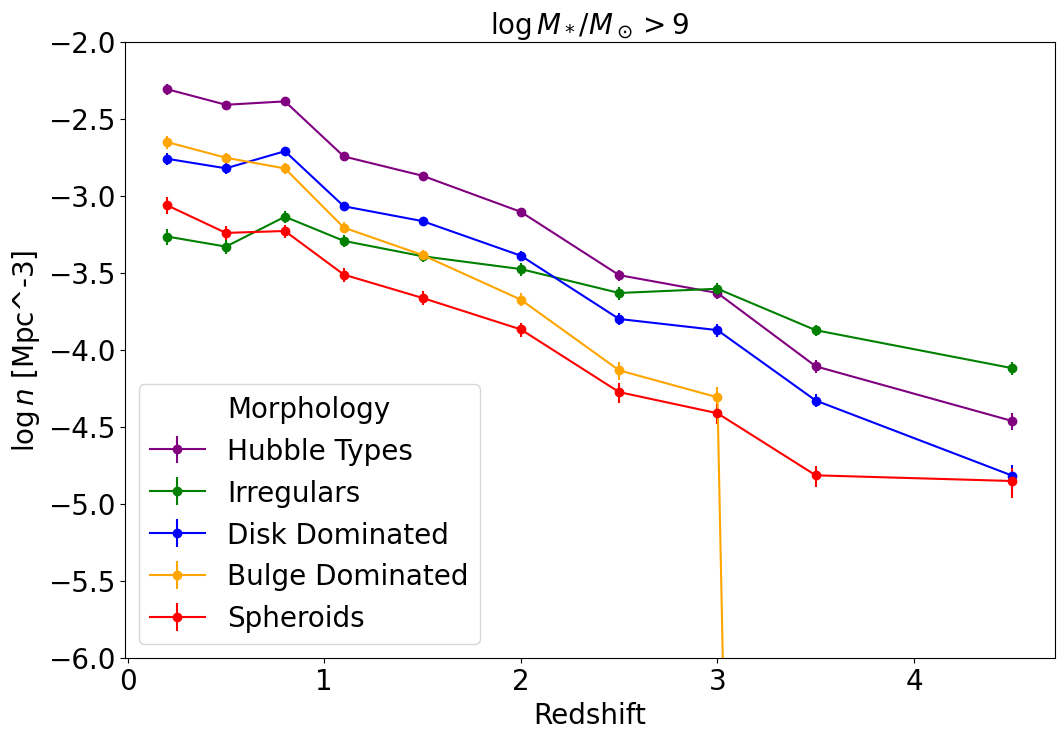

In [245]:
import matplotlib.pyplot as plt
import numpy as np

def log_errors(V, delta_up, delta_down):
    """ Calculate log-scale errors given the value and its linear scale uncertainties. """
    upper_log_error = np.log10(V + delta_up) - np.log10(V)
    lower_log_error = np.log10(V) - np.log10(V - delta_down)
    return upper_log_error, lower_log_error

plt.figure(figsize=(12, 8))

# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'irr': 'green',
    'disk': 'blue',
    'db': 'orange',
    'all': 'black',
    'early': 'orange',
    'sph':'red'
}

morph_labels = {'reg': 'Hubble Types', 'sph': 'Spheroids', 'irr': 'Irregulars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}

# Plot number densities with log-scaled error bars
for morph, data in number_densities.items():
    redshifts = [item[0] for item in data]
    densities = [item[1] for item in data]
    errors = [item[2] for item in data]

    # Calculate log-scale errors
    log_upper_errors = []
    log_lower_errors = []
    for d, e in zip(densities, errors):
        ue, le = log_errors(d, e, e)  # symmetric errors assumed
        log_upper_errors.append(ue)
        log_lower_errors.append(le)
    
    # Asymmetric error format for errorbar()
    errors = [log_lower_errors, log_upper_errors]

    plt.errorbar(redshifts, np.log10(densities), yerr=errors, label=morph_labels.get(morph, morph), fmt='o-', color=colors[morph])

# Customize font sizes
plt.xlabel('Redshift', fontsize=20)
plt.ylabel('$\log n$ [Mpc^-3]', fontsize=20)
plt.title('$\log M_*/M_\odot>9$', fontsize=20)
plt.ylim(-6,-2)
#plt.text(.2,-3.25,'$\log M_*/M_\odot>9$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, title='Morphology', title_fontsize='20')

plt.show()


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1071/2811954077.py:7: RuntimeWarning: invalid value encountered in log10
  lower_log_error = np.log10(V) - np.log10(V - delta_down)


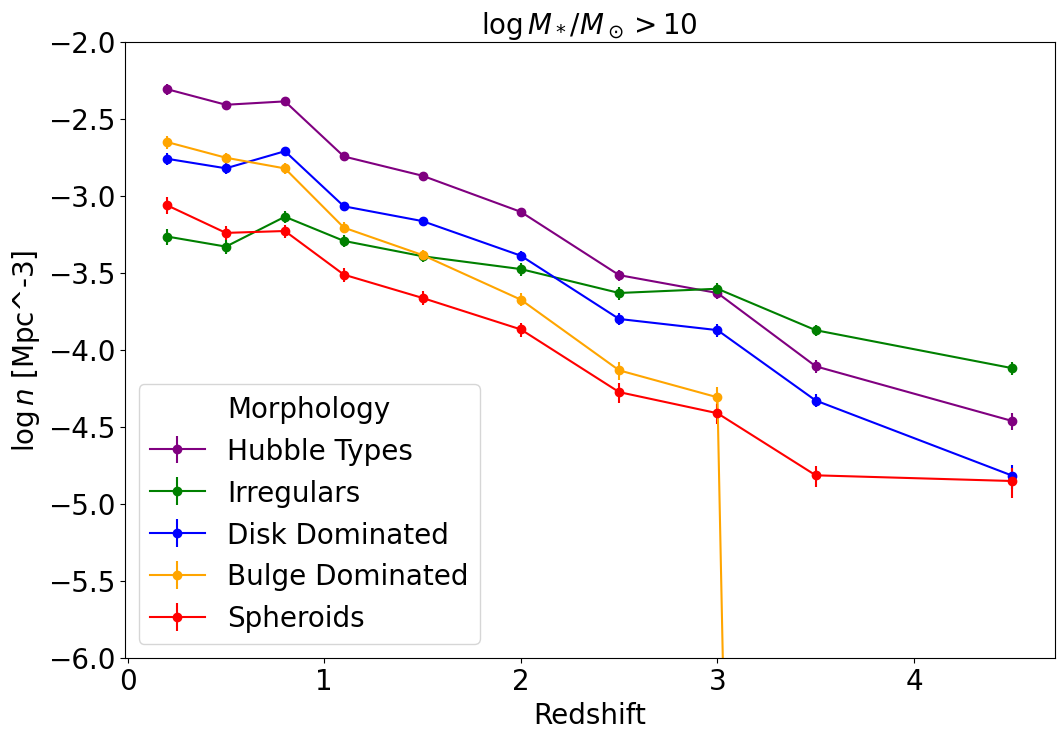

In [247]:
import matplotlib.pyplot as plt
import numpy as np

def log_errors(V, delta_up, delta_down):
    """ Calculate log-scale errors given the value and its linear scale uncertainties. """
    upper_log_error = np.log10(V + delta_up) - np.log10(V)
    lower_log_error = np.log10(V) - np.log10(V - delta_down)
    return upper_log_error, lower_log_error

plt.figure(figsize=(12, 8))



morph_labels = {'reg': 'Hubble Types', 'sph': 'Spheroids', 'irr': 'Irregulars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}

# Plot number densities with log-scaled error bars
for morph, data in number_densities.items():
    redshifts = [item[0] for item in data]
    densities = [item[1] for item in data]
    errors = [item[2] for item in data]

    # Calculate log-scale errors
    log_upper_errors = []
    log_lower_errors = []
    for d, e in zip(densities, errors):
        ue, le = log_errors(d, e, e)  # symmetric errors assumed
        log_upper_errors.append(ue)
        log_lower_errors.append(le)
    
    # Asymmetric error format for errorbar()
    errors = [log_lower_errors, log_upper_errors]

    plt.errorbar(redshifts, np.log10(densities), yerr=errors, label=morph_labels.get(morph, morph), fmt='o-', color=colors[morph])

# Customize font sizes
plt.xlabel('Redshift', fontsize=20)
plt.ylabel('$\log n$ [Mpc^-3]', fontsize=20)
plt.title('$\log M_*/M_\odot>10$', fontsize=20)
#plt.text(.2,-3.25,'$\log M_*/M_\odot>9$',fontsize=20)
plt.ylim(-6,-2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, title='Morphology', title_fontsize='20')

plt.show()


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1071/80133634.py:9: RuntimeWarning: invalid value encountered in log10
  lower_log_error = np.log10(V) - np.log10(V - delta_down)


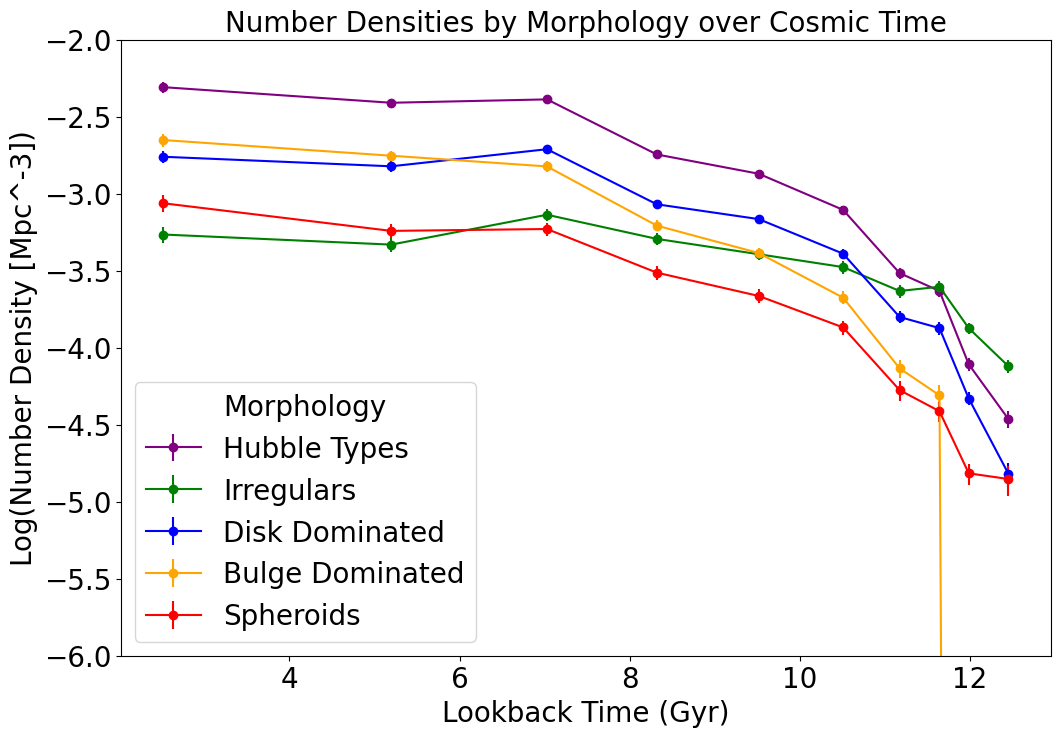

In [248]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import Planck18 as cosmo  # Using Planck 2018 results
from astropy import units as u

def log_errors(V, delta_up, delta_down):
    """ Calculate log-scale errors given the value and its linear scale uncertainties. """
    upper_log_error = np.log10(V + delta_up) - np.log10(V)
    lower_log_error = np.log10(V) - np.log10(V - delta_down)
    return upper_log_error, lower_log_error

plt.figure(figsize=(12, 8))



morph_labels = {'reg': 'Hubble Types', 'sph': 'Spheroids', 'irr': 'Irregulars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}

# Plot number densities with log-scaled error bars
for morph, data in number_densities.items():
    redshifts = np.array([item[0] for item in data])
    lookback_times = cosmo.lookback_time(redshifts).value  # Convert redshift to lookback time in Gyr
    
    densities = np.array([item[1] for item in data])
    errors = np.array([item[2] for item in data])

    # Calculate log-scale errors
    log_upper_errors, log_lower_errors = log_errors(densities, errors, errors)
    
    # Plotting
    plt.errorbar(lookback_times, np.log10(densities), yerr=[log_lower_errors, log_upper_errors],
                 label=morph_labels.get(morph, morph), fmt='o-', color=colors[morph])

# Plot settings
plt.xlabel('Lookback Time (Gyr)', fontsize=20)
plt.ylabel('Log(Number Density [Mpc^-3])', fontsize=20)
plt.title('Number Densities by Morphology over Cosmic Time', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6,-2)
plt.legend(fontsize=20, title='Morphology', title_fontsize='20')

plt.show()


In [19]:
smf_fit_params = {
    # ALL morphology
    ('ALL', '0.2-0.5'): {
        'means': [10.86, -0.82, -1.60, 2.22, 0.45],
        'stds': [0.10, 0.24, 0.00, 0.59, 0.15],
        'use_double_schechter': True,
    },
    ('ALL', '0.5-0.8'): {
        'means': [10.86, -0.82, -1.60, 2.22, 0.45],
        'stds': [0.10, 0.24, 0.00, 0.59, 0.15],
        'use_double_schechter': True,
    },
    ('ALL', '0.8-1.1'): {
        'means': [11.03, -1.25, -99.00, 1.33, -99.00],
        'stds': [0.05, 0.05, 0.00, 0.59, 0.00],
        'use_double_schechter': False,
    },
    ('ALL', '1.1-1.5'): {
        'means': [10.97, -1.20, -99.00, 0.94, -99.00],
        'stds': [0.05, 0.06, 0.00, 0.59, 0.00],
        'use_double_schechter': False,
    },
    ('ALL', '1.5-2'): {
        'means': [10.89, -0.88, -99.00, 1.22, -99.00],
        'stds': [0.06, 0.13, 0.00, 0.59, 0.00],
        'use_double_schechter': False,
    },
    ('ALL', '2-2.5'): {
        'means': [11.05, -1.19, -99.00, 0.41, -99.00],
        'stds': [0.16, 0.26, 0.00, 0.59, 0.00],
        'use_double_schechter': False,
    },
    ('ALL', '2.5-3'): {
        'means': [10.90, -0.74, -99.00, 0.34, -99.00],
        'stds': [0.18, 0.58, 0.00, 0.59, 0.00],
        'use_double_schechter': False,
    },
    # SPH morphology
    ('SPH', '0.2-0.5'): {
        'means': [10.59, -0.25, -1.60, 0.75, 0.07],
        'stds': [0.26, 0.45, 0.00, 0.24, 0.03],
        'use_double_schechter': True,
    },
    ('SPH', '0.5-0.8'): {
        'means': [10.89, -0.51, -1.60, 0.91, 0.06],
        'stds': [0.10, 0.21, 0.00, 0.18, 0.02],
        'use_double_schechter': True,
    },
    ('SPH', '0.8-1.1'): {
        'means': [11.01, -1.00, -99.00, 0.48, -99.00],
        'stds': [0.08, 0.07, 0.00, 0.09, 0.00],
        'use_double_schechter': False,
    },
    ('SPH', '1.1-1.5'): {
        'means': [10.80, -0.78, -99.00, 0.46, -99.00],
        'stds': [0.08, 0.11, 0.00, 0.08, 0.00],
        'use_double_schechter': False,
    },
    ('SPH', '1.5-2'): {
        'means': [10.52, 0.24, -99.00, 0.59, -99.00],
        'stds': [0.08, 0.27, 0.00, 0.04, 0.00],
        'use_double_schechter': False,
    },
    ('SPH', '2-2.5'): {
        'means': [10.76, -0.26, -99.00, 0.23, -99.00],
        'stds': [0.17, 0.46, 0.00, 0.05, 0.00],
        'use_double_schechter': False,
    },
    ('SPH', '2.5-3'): {
        'means': [10.45, 0.74, -99.00, 0.09, -99.00],
        'stds': [0.19, 0.93, 0.00, 0.04, 0.00],
        'use_double_schechter': False,
    },
}

smf_fit_params.update({
    ('DISK+SPH', '0.2-0.5'): {
        'means': [10.31, 0.00, -0.78, 0.93, 0.64],
        'stds': [0.10, 0.00, 0.20, 0.77, 0.53],
        'use_double_schechter': True,
    },
    ('DISK+SPH', '0.5-0.8'): {
        'means': [10.63, -0.49, -99.00, 1.27, -99.00],
        'stds': [0.05, 0.07, 0.00, 0.15, 0.00],
        'use_double_schechter': False,
    },
    ('DISK+SPH', '0.8-1.1'): {
        'means': [10.73, -0.47, -99.00, 0.67, -99.00],
        'stds': [0.06, 0.10, 0.00, 0.09, 0.00],
        'use_double_schechter': False,
    },
    ('DISK+SPH', '1.1-1.5'): {
        'means': [10.77, -0.35, -99.00, 0.29, -99.00],
        'stds': [0.08, 0.14, 0.00, 0.04, 0.00],
        'use_double_schechter': False,
    },
    ('DISK+SPH', '1.5-2'): {
        'means': [10.77, 0.12, -99.00, 0.16, -99.00],
        'stds': [0.12, 0.34, 0.00, 0.02, 0.00],
        'use_double_schechter': False,
    },
    ('DISK+SPH', '2-2.5'): {
        'means': [10.73, 0.16, -99.00, 0.04, -99.00],
        'stds': [0.26, 0.91, 0.00, 0.01, 0.00],
        'use_double_schechter': False,
    },
    ('DISK+SPH', '2.5-3'): {
        'means': [99.00, 99.00, -99.00, 99.00, -99.00],
        'stds': [0.00, 0.00, 0.00, 0.00, 0.00],
        'use_double_schechter': False,  # Adjust if needed, -99 usually means not applicable
    }
})


smf_fit_params.update({
    ('DISKS', '0.2-0.5'): {
        'means': [10.25, 0.00, -1.12, 0.09, 1.48],
        'stds': [1.97, 0.00, 0.05, 6.56, 1.03],
        'use_double_schechter': True,
    },
    ('DISKS', '0.5-0.8'): {
        'means': [10.56, -1.15, -99.00, 1.04, -99.00],
        'stds': [0.06, 0.05, 0.00, 0.17, 0.00],
        'use_double_schechter': False,
    },
    ('DISKS', '0.8-1.1'): {
        'means': [10.80, -1.20, -99.00, 0.51, -99.00],
        'stds': [0.08, 0.07, 0.00, 0.11, 0.00],
        'use_double_schechter': False,
    },
    ('DISKS', '1.1-1.5'): {
        'means': [10.98, -1.27, -99.00, 0.15, -99.00],
        'stds': [0.10, 0.09, 0.00, 0.04, 0.00],
        'use_double_schechter': False,
    },
    ('DISKS', '1.5-2'): {
        'means': [10.85, -0.97, -99.00, 0.13, -99.00],
        'stds': [0.16, 0.28, 0.00, 0.06, 0.00],
        'use_double_schechter': False,
    },
    ('DISKS', '2-2.5'): {
        'means': [11.11, -0.97, -99.00, 0.03, -99.00],
        'stds': [0.29, 0.55, 0.00, 0.02, 0.00],
        'use_double_schechter': False,
    },
    ('DISKS', '2.5-3'): {
        'means': [11.42, -1.01, -99.00, 0.01, -99.00],
        'stds': [0.85, 0.80, 0.00, 0.01, 0.00],
        'use_double_schechter': False,
    }
})

smf_fit_params.update({
    ('IRREGULARS', '0.2-0.5'): {
        'means': [9.87, 0.00, -1.60, 0.16, 0.76],
        'stds': [0.43, 0.00, 0.00, 0.70, 0.51],
        'use_double_schechter': True,
    },
    ('IRREGULARS', '0.5-0.8'): {
        'means': [10.45, 0.00, -1.66, 0.04, 0.33],
        'stds': [0.83, 0.00, 0.16, 0.43, 0.60],
        'use_double_schechter': True,
    },
    ('IRREGULARS', '0.8-1.1'): {
        'means': [10.72, -1.62, -99.00, 0.26, -99.00],
        'stds': [0.11, 0.09, 0.00, 0.70, 0.00],
        'use_double_schechter': False,
    },
    ('IRREGULARS', '1.1-1.5'): {
        'means': [10.91, -1.60, -99.00, 0.17, -99.00],
        'stds': [0.13, 0.09, 0.00, 0.70, 0.00],
        'use_double_schechter': False,
    },
    ('IRREGULARS', '1.5-2'): {
        'means': [10.91, -1.39, -99.00, 0.28, -99.00],
        'stds': [0.11, 0.17, 0.00, 0.70, 0.00],
        'use_double_schechter': False,
    },
    ('IRREGULARS', '2-2.5'): {
        'means': [10.86, -1.39, -99.00, 0.23, -99.00],
        'stds': [0.08, 0.00, 0.00, 0.70, 0.00],
        'use_double_schechter': False,
    },
    ('IRREGULARS', '2.5-3'): {
        'means': [11.09, -1.35, -99.00, 0.09, -99.00],
        'stds': [0.32, 0.46, 0.00, 0.70, 0.00],
        'use_double_schechter': False,
    }
})




/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/3263548027.py:78: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(np.array(zs)[valid], np.log10(np.array(densities)[valid]), yerr=np.array(errors)[valid], fmt='o-', capsize=5,c=colors[morph],ls=':')


NameError: name 'number_densities' is not defined

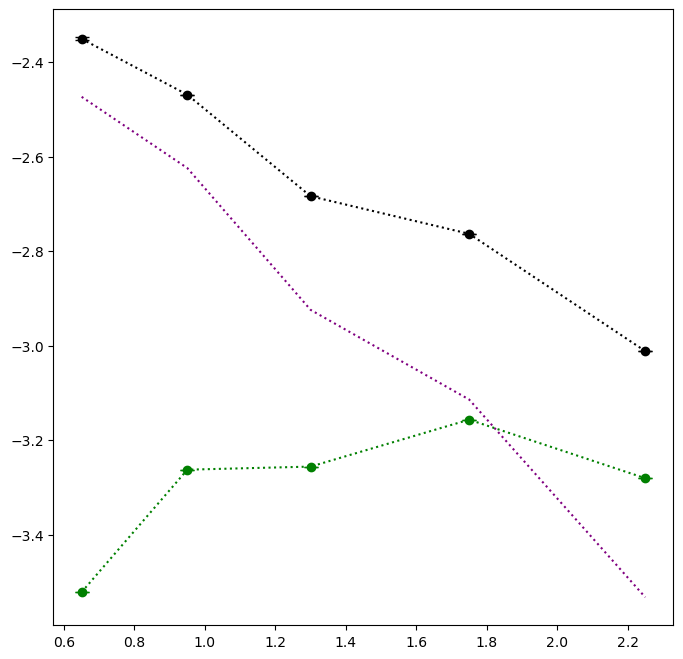

In [23]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Import Line2D



# Define the single and double Schechter functions
def single_schechter_function(logM, logM_star, alpha, log_phi_star):
    M = 10**logM
    M_star = 10**logM_star
    phi_star = 10**log_phi_star
    return np.log(10)*phi_star * (M/M_star)**(alpha+1) * np.exp(-M/M_star) 


def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))

# Integrate the Schechter functions
def integrate_schechter(params, use_double, z_range):
    mass_range = np.linspace(10, 12, 400)  # from logM 8 to 12
    if use_double:
        mean_params = [params['means'][0], params['means'][1], params['means'][2],np.log10(params['means'][3]*1e-3),np.log10(params['means'][4]*1e-3)]#params['means'][:5]  # logM*, alpha1, alpha2, phi1*, phi2*
    else:
        mean_params = [params['means'][0], params['means'][1], np.log10(params['means'][3]*1e-3)]  # logM*, alpha1, phi1*
        
    cov_matrix = np.diag(np.array(params['stds'])[:len(mean_params)]**2)
    samples = multivariate_normal.rvs(mean=mean_params, cov=cov_matrix, size=1000)
    
    densities = []
    for sample in samples:
        if use_double:
            density = quad(double_schechter_function, mass_range[0], mass_range[-1], args=tuple(sample))[0]
            #print(density)
        else:
            density = quad(single_schechter_function, mass_range[0], mass_range[-1], args=tuple(sample))[0]
        densities.append(density)
    

   
    return np.median(densities), median_abs_deviation(densities, scale='normal')

# Compute number densities for all morphologies
pub_morphologies = ['ALL','SPH', 'DISK+SPH', 'DISKS', 'IRREGULARS']
plot_morphologies = ['ALL','IRREGULARS']
labels=['All','Spheroids','Bulge Dominated','Disk Dominated','Irregulars']
# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'IRREGULARS': 'green',
    'DISKS': 'blue',
    'DISK+SPH': 'orange',
    'ALL': 'black',
    'early': 'orange',
    'SPH':'red'
}
number_densities_hubble = {morph: [] for morph in pub_morphologies}
z_values = []
#print((float(z_range.split('-')[0])+float(z_range.split('-')[1])*0.5))
for (morph, z_range), params in smf_fit_params.items():
    mean_density, std_density = integrate_schechter(params, params['use_double_schechter'], z_range)
    #print(float(z_range.split('-')[1]))
    number_densities_hubble[morph].append(((float(z_range.split('-')[0])+float(z_range.split('-')[1]))*0.5, mean_density, std_density))  # Using upper z for simplicity
    #if float(z_range.split('-')[1]) not in z_values:
    #    z_values.append(float(z_range.split('-')[1]))

# Plot number densities vs. redshift
plt.figure(figsize=(8, 8))
for morph,label in zip(plot_morphologies,labels):
    zs = [data[0] for data in number_densities_hubble[morph]]
    #print(zs)
    densities = [data[1] for data in number_densities_hubble[morph]]
    errors = [data[2] for data in number_densities_hubble[morph]]
    valid=(np.array(zs)>0.5) &(np.array(zs)<2.5)
    plt.errorbar(np.array(zs)[valid], np.log10(np.array(densities)[valid]), yerr=np.array(errors)[valid], fmt='o-', capsize=5,c=colors[morph],ls=':')

densities = np.array(densities)*0.0
for morph in ['DISKS','SPH','DISK+SPH']:
    dens_type = [data[1] for data in number_densities_hubble[morph]] 
    densities+=dens_type
#print(densities)
plt.plot(np.array(zs)[valid],np.log10(np.array(densities)[valid]),c=colors['reg'],ls=':')



def log_errors(V, delta_up, delta_down):
    """ Calculate log-scale errors given the value and its linear scale uncertainties. """
    upper_log_error = np.log10(V + delta_up) - np.log10(V)
    lower_log_error = np.log10(V) - np.log10(V - delta_down)
    return upper_log_error, lower_log_error

#plt.figure(figsize=(12, 8))

# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'irr': 'green',
    'disk': 'blue',
    'db': 'orange',
    'all': 'black',
    'early': 'orange',
    'sph':'red'
}

morph_labels = {'reg': 'Hubble Types', 'sph': 'Spheroids', 'irr': 'Irregulars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}

# Plot number densities with log-scaled error bars
for morph, data in number_densities.items():
    print(morph)
    redshifts = [item[0] for item in data]
    print(redshifts)
    densities = [item[1] for item in data]
    print(densities)
    
    errors = [item[2] for item in data]

    # Calculate log-scale errors
    log_upper_errors = []
    log_lower_errors = []
    for d, e in zip(densities, errors):
        ue, le = log_errors(d, e, e)  # symmetric errors assumed
        log_upper_errors.append(ue)
        log_lower_errors.append(le)
    
    # Asymmetric error format for errorbar()
    errors = [log_lower_errors, log_upper_errors]

    plt.errorbar(redshifts, np.log10(densities), yerr=errors, label=morph_labels.get(morph, morph), fmt='o-', color=colors[morph],lw=3)
    print(np.log10(densities))

custom_lines = [
    Line2D([0], [0], color='black', lw=4, linestyle=':'),
    Line2D([0], [0], color='black', lw=4)
]

legend1=plt.legend(custom_lines, ['HST', 'JWST'], title='Observations', title_fontsize='20', fontsize=20)

plt.legend(title='Morphologies', loc='lower left', fontsize=20, title_fontsize=20)

plt.gca().add_artist(legend1)

# Customize font sizes
plt.xlabel('Redshift', fontsize=20)
plt.ylabel('$\log n$ [Mpc^-3]', fontsize=20)
plt.title('$\log M_*/M_\odot>10$', fontsize=20)
#plt.text(.2,-3.25,'$\log M_*/M_\odot>9$',fontsize=20)
plt.ylim(-5,-2)
plt.xlim(0,5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.show()


reg
irr
all


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1121/2126164812.py:84: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(np.array(lb)[valid], np.log10(np.array(densities)[valid]), yerr=np.array(errors)[valid], fmt='o-', capsize=5,c=colors[morph],ls=':')


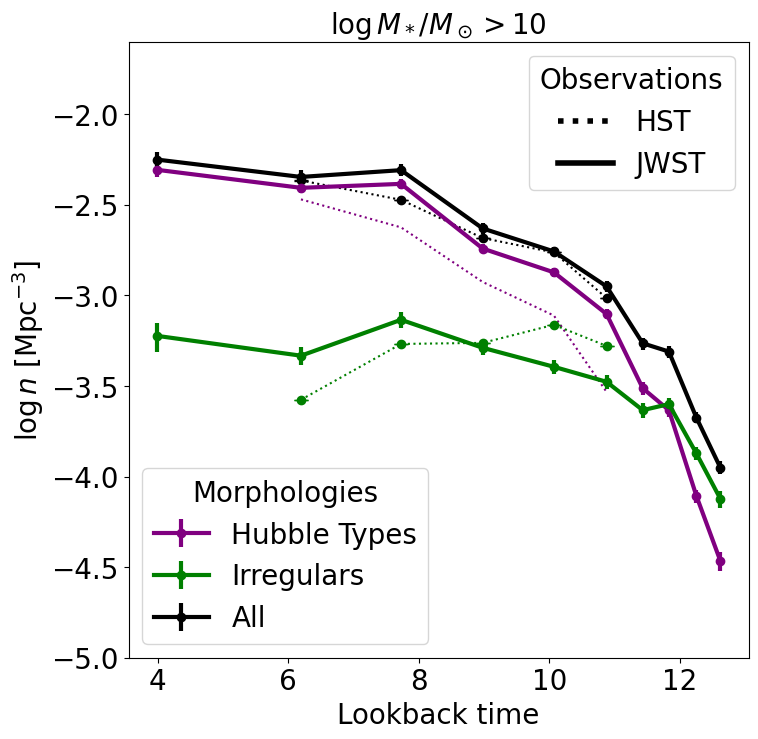

In [27]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Import Line2D
from scipy.stats import median_abs_deviation
from astropy.cosmology import Planck18 as cosmo  # Using Planck 2018 results



# Define the single and double Schechter functions
def single_schechter_function(logM, logM_star, alpha, log_phi_star):
    M = 10**logM
    M_star = 10**logM_star
    phi_star = 10**log_phi_star
    return np.log(10)*phi_star * (M/M_star)**(alpha+1) * np.exp(-M/M_star) 


def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))

# Integrate the Schechter functions
def integrate_schechter(params, use_double, z_range):
    mass_range = np.linspace(10, 12, 400)  # from logM 8 to 12
    if use_double:
        mean_params = [params['means'][0], params['means'][1], params['means'][2],np.log10(params['means'][3]*1e-3),np.log10(params['means'][4]*1e-3)]#params['means'][:5]  # logM*, alpha1, alpha2, phi1*, phi2*
    else:
        mean_params = [params['means'][0], params['means'][1], np.log10(params['means'][3]*1e-3)]  # logM*, alpha1, phi1*
        
    cov_matrix = np.diag(np.array(params['stds'])[:len(mean_params)]**2)
    samples = multivariate_normal.rvs(mean=mean_params, cov=cov_matrix, size=1000)
    
    densities = []
    for sample in samples:
        if use_double:
            density = quad(double_schechter_function, mass_range[0], mass_range[-1], args=tuple(sample))[0]
            #print(density)
        else:
            density = quad(single_schechter_function, mass_range[0], mass_range[-1], args=tuple(sample))[0]
        densities.append(density)
    

   
    return np.median(densities), median_abs_deviation(densities, scale='normal')

# Compute number densities for all morphologies
pub_morphologies = ['ALL','SPH', 'DISK+SPH', 'DISKS', 'IRREGULARS']
plot_morphologies = ['ALL','IRREGULARS']
labels=['All','Spheroids','Bulge Dominated','Disk Dominated','Irregulars']
# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'IRREGULARS': 'green',
    'DISKS': 'blue',
    'DISK+SPH': 'orange',
    'ALL': 'black',
    'early': 'orange',
    'SPH':'red'
}
number_densities_hubble = {morph: [] for morph in pub_morphologies}
z_values = []
#print((float(z_range.split('-')[0])+float(z_range.split('-')[1])*0.5))
for (morph, z_range), params in smf_fit_params.items():
    mean_density, std_density = integrate_schechter(params, params['use_double_schechter'], z_range)
    #print(float(z_range.split('-')[1]))
    z_mean = (float(z_range.split('-')[0])+float(z_range.split('-')[1]))*0.5
    lookback_time = cosmo.lookback_time(z_mean).value  # Get lookback time in Gyr
    number_densities_hubble[morph].append((lookback_time, mean_density, std_density,z_mean))
    #number_densities_hubble[morph].append(((float(z_range.split('-')[0])+float(z_range.split('-')[1]))*0.5, mean_density, std_density))  # Using upper z for simplicity
    #if float(z_range.split('-')[1]) not in z_values:
    #    z_values.append(float(z_range.split('-')[1]))

# Plot number densities vs. redshift
plt.figure(figsize=(8, 8))
for morph,label in zip(plot_morphologies,labels):
    lb = [data[0] for data in number_densities_hubble[morph]]
    zs = [data[3] for data in number_densities_hubble[morph]]
    #print(zs)
    densities = [data[1] for data in number_densities_hubble[morph]]
    errors = [data[2] for data in number_densities_hubble[morph]]
    valid=(np.array(zs)>0.5) &(np.array(zs)<2.5)
    plt.errorbar(np.array(lb)[valid], np.log10(np.array(densities)[valid]), yerr=np.array(errors)[valid], fmt='o-', capsize=5,c=colors[morph],ls=':')

densities = np.array(densities)*0.0
for morph in ['DISKS','SPH','DISK+SPH']:
    dens_type = [data[1] for data in number_densities_hubble[morph]] 
    densities+=dens_type
#print(densities)
plt.plot(np.array(lb)[valid],np.log10(np.array(densities)[valid]),c=colors['reg'],ls=':')



def log_errors(V, delta_up, delta_down):
    """ Calculate log-scale errors given the value and its linear scale uncertainties. """
    upper_log_error = np.log10(V + delta_up) - np.log10(V)
    lower_log_error = np.log10(V) - np.log10(V - delta_down)
    return upper_log_error, lower_log_error

#plt.figure(figsize=(12, 8))

# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'irr': 'green',
    'disk': 'blue',
    'db': 'orange',
    'all': 'black',
    'early': 'orange',
    'sph':'red'
}

morph_labels = {'reg': 'Hubble Types', 'sph': 'Spheroids', 'irr': 'Irregulars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}

# Plot number densities with log-scaled error bars
for morph, data in number_densities.items():
    print(morph)
    redshifts = [item[0] for item in data]
    lookback_time = cosmo.lookback_time(redshifts).value
    densities = [item[1] for item in data]
    errors = [item[2] for item in data]

    # Calculate log-scale errors
    log_upper_errors = []
    log_lower_errors = []
    for d, e in zip(densities, errors):
        ue, le = log_errors(d, e, e)  # symmetric errors assumed
        log_upper_errors.append(ue)
        log_lower_errors.append(le)
    
    # Asymmetric error format for errorbar()
    errors = [log_lower_errors, log_upper_errors]

    plt.errorbar(lookback_time, np.log10(densities), yerr=errors, label=morph_labels.get(morph, morph), fmt='o-', color=colors[morph],lw=3)

custom_lines = [
    Line2D([0], [0], color='black', lw=4, linestyle=':'),
    Line2D([0], [0], color='black', lw=4)
]

legend1=plt.legend(custom_lines, ['HST', 'JWST'], title='Observations', title_fontsize='20', fontsize=20,loc='upper right')

plt.legend(title='Morphologies', loc='lower left', fontsize=20, title_fontsize=20)

plt.gca().add_artist(legend1)

# Customize font sizes
plt.xlabel('Lookback time', fontsize=20)
plt.ylabel('$\log n$ [Mpc$^{-3}$]', fontsize=20)
plt.title('$\log M_*/M_\odot>10$', fontsize=20)
#plt.text(.2,-3.25,'$\log M_*/M_\odot>9$',fontsize=20)
plt.ylim(-5,-1.6)
#plt.xlim(0,5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('/Users/marchuertascompany/Dropbox/Apps/Overleaf/morpho_SMF_COSMOSWeb/figures/number_densities_hubble_peculiar.png')

plt.show()


reg
irr
all


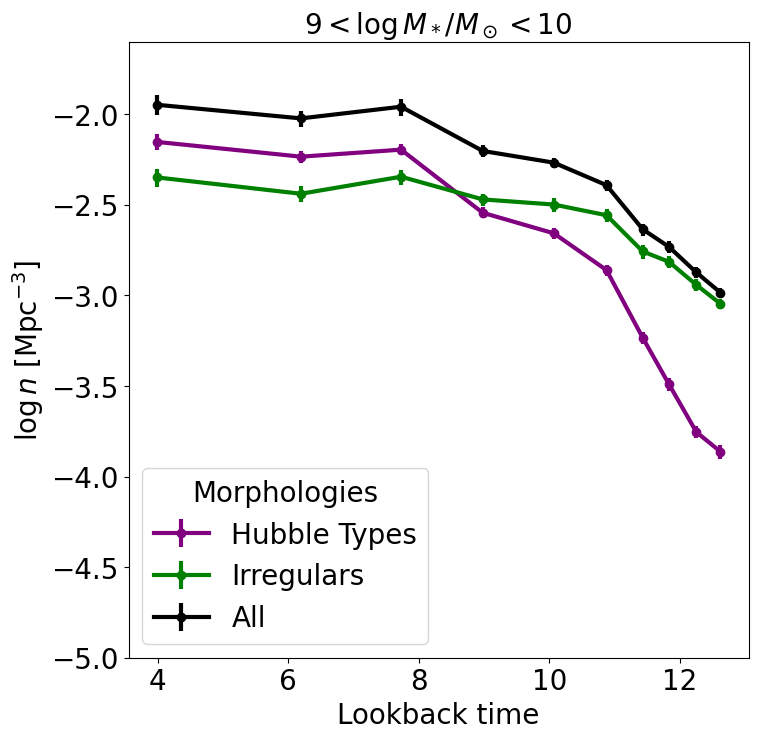

In [32]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Import Line2D
from scipy.stats import median_abs_deviation
from astropy.cosmology import Planck18 as cosmo  # Using Planck 2018 results



# Define the single and double Schechter functions
def single_schechter_function(logM, logM_star, alpha, log_phi_star):
    M = 10**logM
    M_star = 10**logM_star
    phi_star = 10**log_phi_star
    return np.log(10)*phi_star * (M/M_star)**(alpha+1) * np.exp(-M/M_star) 


def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))

# Integrate the Schechter functions
def integrate_schechter(params, use_double, z_range):
    mass_range = np.linspace(9, 10, 400)  # from logM 8 to 12
    if use_double:
        mean_params = [params['means'][0], params['means'][1], params['means'][2],np.log10(params['means'][3]*1e-3),np.log10(params['means'][4]*1e-3)]#params['means'][:5]  # logM*, alpha1, alpha2, phi1*, phi2*
    else:
        mean_params = [params['means'][0], params['means'][1], np.log10(params['means'][3]*1e-3)]  # logM*, alpha1, phi1*
        
    cov_matrix = np.diag(np.array(params['stds'])[:len(mean_params)]**2)
    samples = multivariate_normal.rvs(mean=mean_params, cov=cov_matrix, size=1000)
    
    densities = []
    for sample in samples:
        if use_double:
            density = quad(double_schechter_function, mass_range[0], mass_range[-1], args=tuple(sample))[0]
            #print(density)
        else:
            density = quad(single_schechter_function, mass_range[0], mass_range[-1], args=tuple(sample))[0]
        densities.append(density)
    

   
    return np.median(densities), median_abs_deviation(densities, scale='normal')

# Compute number densities for all morphologies
pub_morphologies = ['ALL','SPH', 'DISK+SPH', 'DISKS', 'IRREGULARS']
plot_morphologies = ['ALL','IRREGULARS']
labels=['All','Spheroids','Bulge Dominated','Disk Dominated','Irregulars']
# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'IRREGULARS': 'green',
    'DISKS': 'blue',
    'DISK+SPH': 'orange',
    'ALL': 'black',
    'early': 'orange',
    'SPH':'red'
}
number_densities_hubble = {morph: [] for morph in pub_morphologies}
z_values = []


#print((float(z_range.split('-')[0])+float(z_range.split('-')[1])*0.5))
for (morph, z_range), params in smf_fit_params.items():
    mean_density, std_density = integrate_schechter(params, params['use_double_schechter'], z_range)
    #print(float(z_range.split('-')[1]))
    z_mean = (float(z_range.split('-')[0])+float(z_range.split('-')[1]))*0.5
    lookback_time = cosmo.lookback_time(z_mean).value  # Get lookback time in Gyr
    number_densities_hubble[morph].append((lookback_time, mean_density, std_density,z_mean))
    #number_densities_hubble[morph].append(((float(z_range.split('-')[0])+float(z_range.split('-')[1]))*0.5, mean_density, std_density))  # Using upper z for simplicity
    #if float(z_range.split('-')[1]) not in z_values:
    #    z_values.append(float(z_range.split('-')[1]))

# Plot number densities vs. redshift
plt.figure(figsize=(8, 8))
for morph,label in zip(plot_morphologies,labels):
    lb = [data[0] for data in number_densities_hubble[morph]]
    zs = [data[3] for data in number_densities_hubble[morph]]
    #print(zs)
    densities = [data[1] for data in number_densities_hubble[morph]]
    errors = [data[2] for data in number_densities_hubble[morph]]
    valid=(np.array(zs)>0.5) &(np.array(zs)<2.5)
    #plt.errorbar(np.array(lb)[valid], np.log10(np.array(densities)[valid]), yerr=np.array(errors)[valid], fmt='o-', capsize=5,c=colors[morph],ls=':')

densities = np.array(densities)*0.0
for morph in ['DISKS','SPH','DISK+SPH']:
    dens_type = [data[1] for data in number_densities_hubble[morph]] 
    densities+=dens_type
#print(densities)
#plt.plot(np.array(lb)[valid],np.log10(np.array(densities)[valid]),c=colors['reg'],ls=':')



def log_errors(V, delta_up, delta_down):
    """ Calculate log-scale errors given the value and its linear scale uncertainties. """
    upper_log_error = np.log10(V + delta_up) - np.log10(V)
    lower_log_error = np.log10(V) - np.log10(V - delta_down)
    return upper_log_error, lower_log_error

#plt.figure(figsize=(12, 8))

# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'irr': 'green',
    'disk': 'blue',
    'db': 'orange',
    'all': 'black',
    'early': 'orange',
    'sph':'red'
}

morph_labels = {'reg': 'Hubble Types', 'sph': 'Spheroids', 'irr': 'Irregulars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}

# Plot number densities with log-scaled error bars
for morph, data in number_densities.items():
    print(morph)
    redshifts = [item[0] for item in data]
    lookback_time = cosmo.lookback_time(redshifts).value
    densities = [item[1] for item in data]
    errors = [item[2] for item in data]

    # Calculate log-scale errors
    log_upper_errors = []
    log_lower_errors = []
    for d, e in zip(densities, errors):
        ue, le = log_errors(d, e, e)  # symmetric errors assumed
        log_upper_errors.append(ue)
        log_lower_errors.append(le)
    
    # Asymmetric error format for errorbar()
    errors = [log_lower_errors, log_upper_errors]

    plt.errorbar(lookback_time, np.log10(densities), yerr=errors, label=morph_labels.get(morph, morph), fmt='o-', color=colors[morph],lw=3)

custom_lines = [
    Line2D([0], [0], color='black', lw=4, linestyle=':'),
    Line2D([0], [0], color='black', lw=4)
]

#legend1=plt.legend(custom_lines, ['HST', 'JWST'], title='Observations', title_fontsize='20', fontsize=20,loc='upper right')

plt.legend(title='Morphologies', loc='lower left', fontsize=20, title_fontsize=20)

#plt.gca().add_artist(legend1)

# Customize font sizes
plt.xlabel('Lookback time', fontsize=20)
plt.ylabel('$\log n$ [Mpc$^{-3}$]', fontsize=20)
plt.title('$9<\log M_*/M_\odot<10$', fontsize=20)
#plt.text(.2,-3.25,'$\log M_*/M_\odot>9$',fontsize=20)
plt.ylim(-5,-1.6)
#plt.xlim(0,5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.show()


reg
irr
all


/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1071/587296954.py:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(np.array(lb)[valid], np.log10(np.array(densities)[valid]), yerr=np.array(errors)[valid], fmt='o-', capsize=5,c=colors[morph],ls=':')


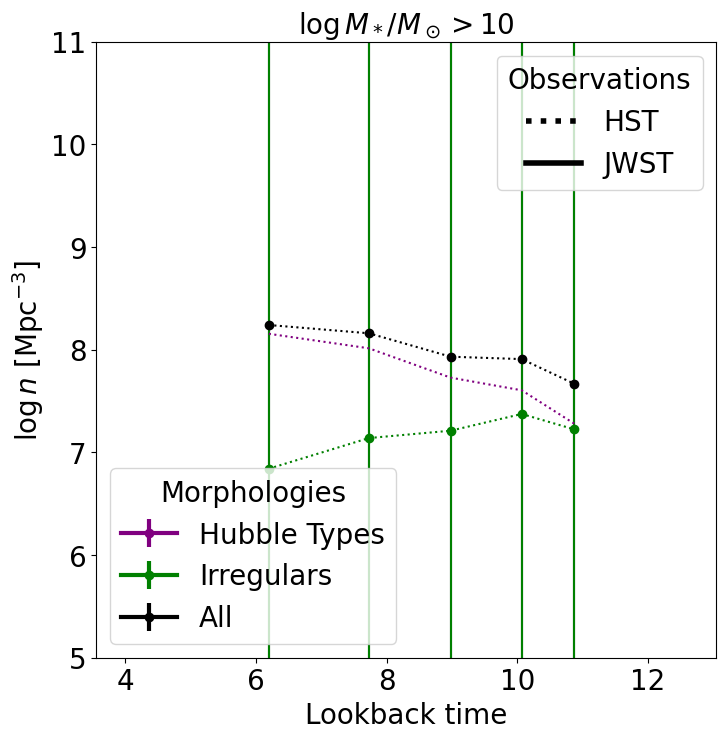

In [341]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Import Line2D



# Define the single and double Schechter functions
def single_schechter_function(logM, logM_star, alpha, log_phi_star):
    M = 10**logM
    M_star = 10**logM_star
    phi_star = 10**log_phi_star
    return M*np.log(10)*phi_star * (M/M_star)**(alpha+1) * np.exp(-M/M_star) 


def double_schechter_function(logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    
    return 10**logM*np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))

# Integrate the Schechter functions
def integrate_schechter(params, use_double, z_range):
    mass_range = np.linspace(10, 12, 400)  # from logM 8 to 12
    if use_double:
        mean_params = [params['means'][0], params['means'][1], params['means'][2],np.log10(params['means'][3]*1e-3),np.log10(params['means'][4]*1e-3)]#params['means'][:5]  # logM*, alpha1, alpha2, phi1*, phi2*
    else:
        mean_params = [params['means'][0], params['means'][1], np.log10(params['means'][3]*1e-3)]  # logM*, alpha1, phi1*
        
    cov_matrix = np.diag(np.array(params['stds'])[:len(mean_params)]**2)
    samples = multivariate_normal.rvs(mean=mean_params, cov=cov_matrix, size=1000)
    
    densities = []
    for sample in samples:
        if use_double:
            density = quad(double_schechter_function, mass_range[0], mass_range[-1], args=tuple(sample))[0]
            #print(density)
        else:
            density = quad(single_schechter_function, mass_range[0], mass_range[-1], args=tuple(sample))[0]
        densities.append(density)
    

   
    return np.median(densities), median_abs_deviation(densities, scale='normal')

# Compute number densities for all morphologies
pub_morphologies = ['ALL','SPH', 'DISK+SPH', 'DISKS', 'IRREGULARS']
plot_morphologies = ['ALL','IRREGULARS']
labels=['All','Spheroids','Bulge Dominated','Disk Dominated','Irregulars']
# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'IRREGULARS': 'green',
    'DISKS': 'blue',
    'DISK+SPH': 'orange',
    'ALL': 'black',
    'early': 'orange',
    'SPH':'red'
}
number_densities_hubble = {morph: [] for morph in pub_morphologies}
z_values = []
#print((float(z_range.split('-')[0])+float(z_range.split('-')[1])*0.5))
for (morph, z_range), params in smf_fit_params.items():
    mean_density, std_density = integrate_schechter(params, params['use_double_schechter'], z_range)
    #print(float(z_range.split('-')[1]))
    z_mean = (float(z_range.split('-')[0])+float(z_range.split('-')[1]))*0.5
    lookback_time = cosmo.lookback_time(z_mean).value  # Get lookback time in Gyr
    number_densities_hubble[morph].append((lookback_time, mean_density, std_density,z_mean))
    #number_densities_hubble[morph].append(((float(z_range.split('-')[0])+float(z_range.split('-')[1]))*0.5, mean_density, std_density))  # Using upper z for simplicity
    #if float(z_range.split('-')[1]) not in z_values:
    #    z_values.append(float(z_range.split('-')[1]))

# Plot number densities vs. redshift
plt.figure(figsize=(8, 8))
for morph,label in zip(plot_morphologies,labels):
    lb = [data[0] for data in number_densities_hubble[morph]]
    zs = [data[3] for data in number_densities_hubble[morph]]
    #print(zs)
    densities = [data[1] for data in number_densities_hubble[morph]]
    errors = [data[2] for data in number_densities_hubble[morph]]
    valid=(np.array(zs)>0.5) &(np.array(zs)<2.5)
    plt.errorbar(np.array(lb)[valid], np.log10(np.array(densities)[valid]), yerr=np.array(errors)[valid], fmt='o-', capsize=5,c=colors[morph],ls=':')

densities = np.array(densities)*0.0
for morph in ['DISKS','SPH','DISK+SPH']:
    dens_type = [data[1] for data in number_densities_hubble[morph]] 
    densities+=dens_type
#print(densities)
plt.plot(np.array(lb)[valid],np.log10(np.array(densities)[valid]),c=colors['reg'],ls=':')



def log_errors(V, delta_up, delta_down):
    """ Calculate log-scale errors given the value and its linear scale uncertainties. """
    upper_log_error = np.log10(V + delta_up) - np.log10(V)
    lower_log_error = np.log10(V) - np.log10(V - delta_down)
    return upper_log_error, lower_log_error

#plt.figure(figsize=(12, 8))

# Define a color map for the morphological types
colors = {
    'reg': 'purple',
    'irr': 'green',
    'disk': 'blue',
    'db': 'orange',
    'all': 'black',
    'early': 'orange',
    'sph':'red'
}

morph_labels = {'reg': 'Hubble Types', 'sph': 'Spheroids', 'irr': 'Irregulars', 'disk': 'Disk Dominated', 'db': 'Bulge Dominated', 'all': 'All', 'early': 'Early-Type'}

# Plot number densities with log-scaled error bars
for morph, data in number_densities.items():
    print(morph)
    redshifts = [item[0] for item in data]
    lookback_time = cosmo.lookback_time(redshifts).value
    densities = [item[1] for item in data]
    errors = [item[2] for item in data]

    # Calculate log-scale errors
    log_upper_errors = []
    log_lower_errors = []
    for d, e in zip(densities, errors):
        ue, le = log_errors(d, e, e)  # symmetric errors assumed
        log_upper_errors.append(ue)
        log_lower_errors.append(le)
    
    # Asymmetric error format for errorbar()
    errors = [log_lower_errors, log_upper_errors]

    plt.errorbar(lookback_time, np.log10(densities), yerr=errors, label=morph_labels.get(morph, morph), fmt='o-', color=colors[morph],lw=3)

custom_lines = [
    Line2D([0], [0], color='black', lw=4, linestyle=':'),
    Line2D([0], [0], color='black', lw=4)
]

legend1=plt.legend(custom_lines, ['HST', 'JWST'], title='Observations', title_fontsize='20', fontsize=20,loc='upper right')

plt.legend(title='Morphologies', loc='lower left', fontsize=20, title_fontsize=20)

plt.gca().add_artist(legend1)

# Customize font sizes
plt.xlabel('Lookback time', fontsize=20)
plt.ylabel('$\log n$ [Mpc$^{-3}$]', fontsize=20)
plt.title('$\log M_*/M_\odot>10$', fontsize=20)
#plt.text(.2,-3.25,'$\log M_*/M_\odot>9$',fontsize=20)
plt.ylim(5,11)
#plt.xlim(0,5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.show()


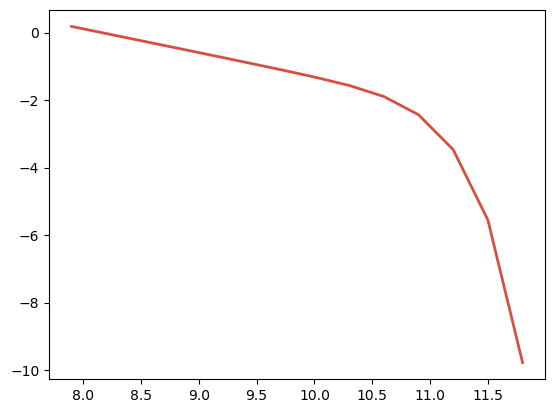

In [122]:
params = fit_results[(0.8, 'all')]['params_50']
logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc = params

fitted_line = np.log10(double_schechter_function(LogMassbin, logM_star_mcmc, alpha1_mcmc, alpha2_mcmc, logphi1_mcmc, logphi2_mcmc))
plt.plot(LogMassbin, fitted_line, color=color, lw=2)

/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_1071/3046453583.py:10: RuntimeWarning: invalid value encountered in log10
  lower_errors = logPhi - np.log10(Phi - dPhi)


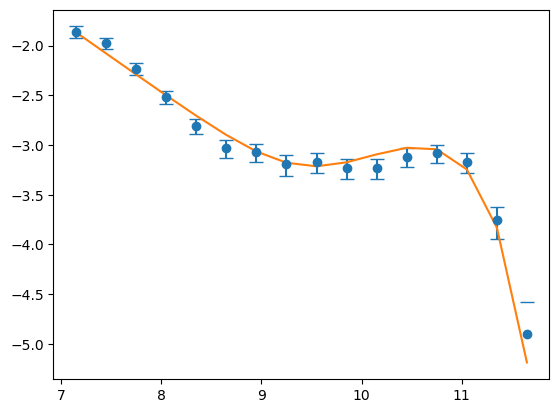

In [75]:
def double_schechter_function(logM_bins,logM, logM_star,alpha1,alpha2,logphi1,logphi2):
    M_over_M_star = logM - logM_star
    #phi_ratio = 10**logphi2/10**logphi1
    
    return np.log(10)*np.exp(-10**M_over_M_star)*10**M_over_M_star*(10**logphi1*10**(M_over_M_star*alpha1)+10**logphi2*10**(M_over_M_star*alpha2))

# Converting Phi and dPhi to logarithmic scale for plotting
logPhi = np.log10(Phi)
upper_errors = np.log10(Phi + dPhi) - logPhi
lower_errors = logPhi - np.log10(Phi - dPhi)

# Prepare error array for plotting in matplotlib
errors = [lower_errors, upper_errors]

# Plotting
plt.errorbar(logM, logPhi, yerr=errors, fmt='o', capsize=5, label='SMF with error bars')
#obs=(np.log10(Phi))
model=(np.log10(double_schechter_function(logM_bins,logM,10.796443457767282,-1.7103098819577514,-0.36435501444501806,-4.8182812509322135,-2.9929564483883233)))
plt.plot(logM,model)
#plt.plot(logM,obs)


In [25]:
print(np.log10(10**-3.2/10**-2.77))

-0.43000000000000016


In [143]:
print(phi_star_mcmc, logM_star_mcmc, alpha_mcmc)

0.0007633636505080229 10.769812444551347 -0.13090933277302325


In [132]:
names = [name for name in ceers_phys_ap.colnames if len(ceers_phys_ap[name].shape) <= 1]
ceers_phys=ceers_phys_ap[names].to_pandas()

#ceers_phys.set_index('ID')

names = [name for name in ceers_photm_ap.colnames if len(ceers_photm_ap[name].shape) <= 1]
ceers_photm=ceers_photm_ap[names].to_pandas()
fullnames = [ 'nircam_'+str(field)+'_'+str(idn) for (field,idn) in zip(ceers_photm.FIELD, ceers_photm.CATID)]
ceers_photm['fullname']=fullnames
#ceers_photm.set_index('ID')

names = [name for name in jades_phys_ap.colnames if len(jades_phys_ap[name].shape) <= 1]
jades_phys=jades_phys_ap[names].to_pandas()
#jades_phys.set_index('source')

names = [name for name in cosmos_phys_ap.colnames if len(cosmos_phys_ap[name].shape) <= 1]
cosmos_phys=cosmos_phys_ap[names].to_pandas()





NameError: name 'ceers_phys_ap' is not defined

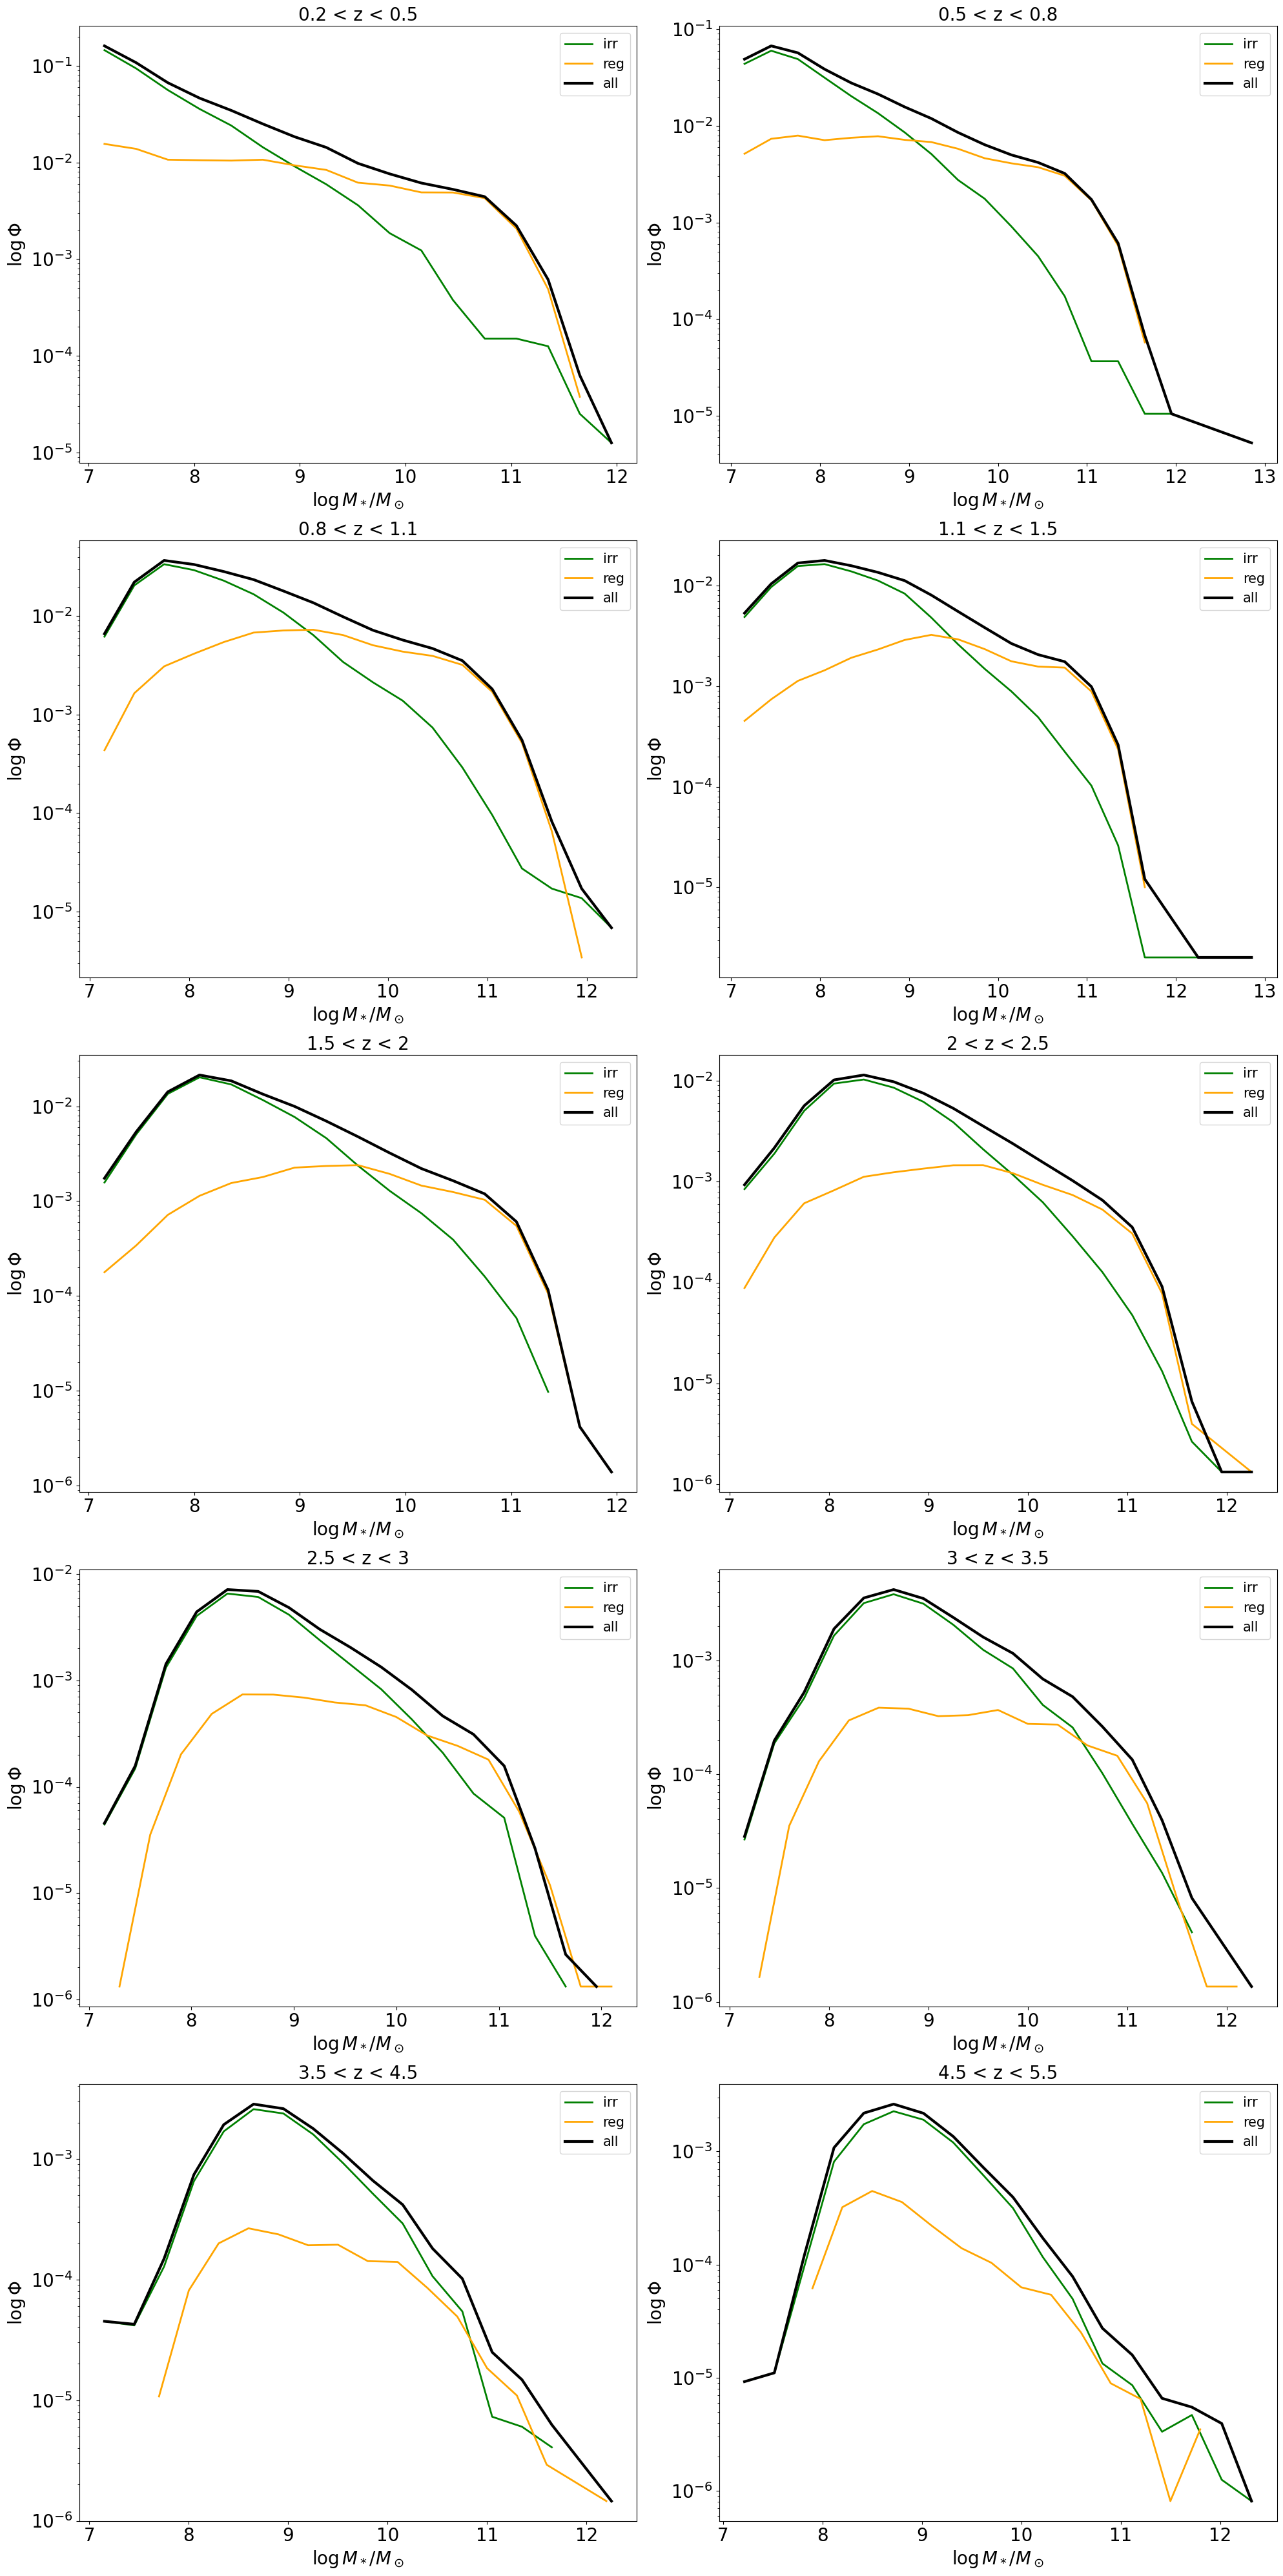

In [100]:
morph_class=['irr','reg','all']

import matplotlib.pyplot as plt
import numpy as np

# Set up a large figure to accommodate subplots
plt.figure(figsize=(20, 40))  # Adjust size to your needs

# Loop over the redshift bins
for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    # Create subplot for each redshift bin
    ax = plt.subplot(5, 2, i + 1)  # 5 rows, 2 columns

    # Plot data for each morphological class
    morph_colors = {'reg': 'orange', 'disk': 'blue', 'irr': 'green', 'db': 'orange', 'early': 'purple', 'all': 'black'}
    for cl in morph_class:
        # Get the data
        LogMassbin = smf_morph[(zlow, cl, 'LogMassbin')]
        Fi = smf_morph[(zlow, cl, 'Fi')]
        
        # Plot log of stellar mass function, ensuring data is positive before taking log
        Fi_pos = Fi[Fi > 0]  # Filter out non-positive values
        LogMassbin_pos = LogMassbin[Fi > 0]  # Corresponding mass bins
        ax.plot(LogMassbin_pos, Fi_pos, color=morph_colors[cl], label=cl, lw=2 if cl != 'all' else 3)

    # Set titles and labels with the specified font size
    ax.set_title(f'{zlow} < z < {zup}', fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    
    # Set the y-axis to log scale
    ax.set_yscale('log')
    # Set tick label font size
    ax.tick_params(axis='both', which='major', labelsize=20)
    # Set legend
    ax.legend(fontsize=15)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


KeyError: 'reg'

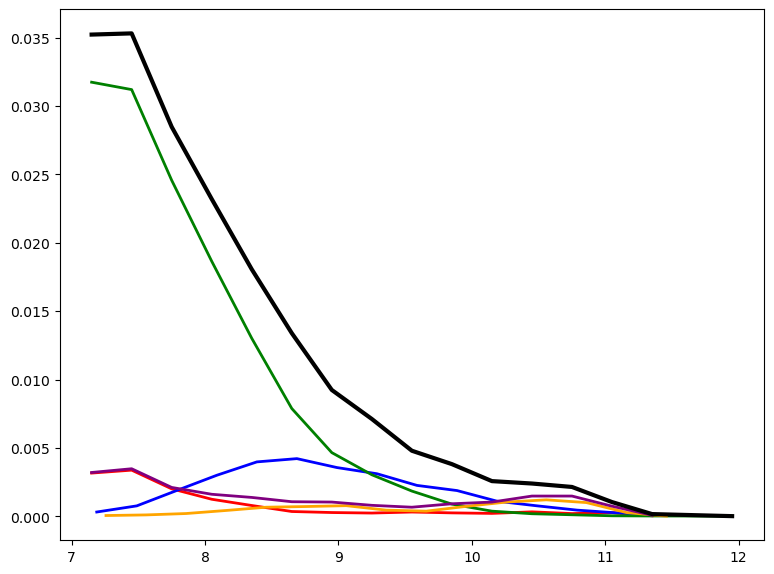

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Set up a large figure to accommodate subplots
plt.figure(figsize=(20, 40))  # Adjust size to your needs

# Loop over the redshift bins
for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    # Create subplot for each redshift bin
    ax = plt.subplot(5, 2, i + 1)  # 5 rows, 2 columns

    # Plot data for each morphological class
    morph_colors = {'sph': 'red', 'disk': 'blue', 'irr': 'green', 'db': 'orange', 'early': 'purple', 'all': 'black'}
    for cl in morph_class:
        # Get the data
        LogMassbin = smf_morph[(zlow, cl, 'LogMassbin')]
        Fi = smf_morph[(zlow, cl, 'Fi')]
        
        # Plot log of stellar mass function, ensuring data is positive before taking log
        Fi_pos = Fi[Fi > 0]  # Filter out non-positive values
        LogMassbin_pos = LogMassbin[Fi > 0]  # Corresponding mass bins
        ax.plot(LogMassbin_pos, Fi_pos, color=morph_colors[cl], label=cl, lw=2 if cl != 'all' else 3)

    # Set titles and labels with the specified font size
    ax.set_title(f'{zlow} < z < {zup}', fontsize=20)
    ax.set_xlabel('$\log M_*/M_\odot$', fontsize=20)
    ax.set_ylabel('$\log \Phi$', fontsize=20)
    
    # Set the y-axis to log scale
    ax.set_yscale('log')
    # Set tick label font size
    ax.tick_params(axis='both', which='major', labelsize=20)
    # Set legend
    ax.legend(fontsize=15)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
plt.plot(smf_morph[(0.2,'sph','LogMassbin')],np.log10(smf_morph[(0.2,'sph','Fi')]),color='red')
plt.plot(smf_morph[(0.2,'disk','LogMassbin')],np.log10(smf_morph[(0.2,'disk','Fi')]),color='blue')
plt.plot(smf_morph[(0.2,'irr','LogMassbin')],np.log10(smf_morph[(0.2,'irr','Fi')]),color='green')
plt.plot(smf_morph[(0.2,'db','LogMassbin')],np.log10(smf_morph[(0.2,'db','Fi')]),color='orange')
plt.plot(smf_morph[(0.2,'all','LogMassbin')],np.log10(smf_morph[(0.2,'all','Fi')]),color='black',lw=3)
plt.plot(smf_morph[(0.2,'early','LogMassbin')],np.log10(smf_morph[(0.2,'early','Fi')]),color='purple',lw=2)

/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_47571/1793928493.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(smf_morph[(1.1,'irr','LogMassbin')],np.log10(smf_morph[(1.1,'irr','Fi')]),color='green')
/var/folders/3b/tyyj2qy12lxcqm59_rgl14bh0000gn/T/ipykernel_47571/1793928493.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(smf_morph[(1.1,'all','LogMassbin')],np.log10(smf_morph[(1.1,'all','Fi')]),color='black',lw=3)


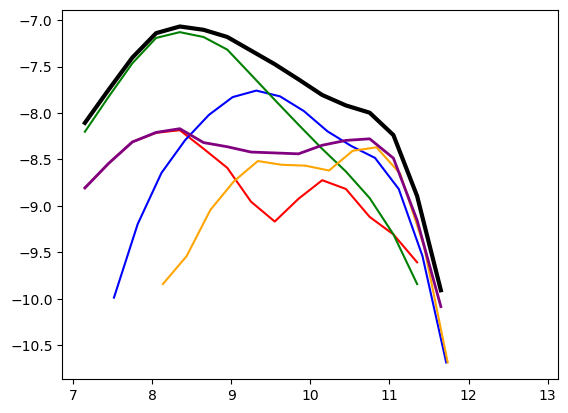

In [61]:
plt.plot(smf_morph[(1.1,'sph','LogMassbin')],np.log10(smf_morph[(1.1,'sph','Fi')]),color='red')
plt.plot(smf_morph[(1.1,'disk','LogMassbin')],np.log10(smf_morph[(1.1,'disk','Fi')]),color='blue')
plt.plot(smf_morph[(1.1,'irr','LogMassbin')],np.log10(smf_morph[(1.1,'irr','Fi')]),color='green')
plt.plot(smf_morph[(1.1,'db','LogMassbin')],np.log10(smf_morph[(1.1,'db','Fi')]),color='orange')
plt.plot(smf_morph[(1.1,'early','LogMassbin')],np.log10(smf_morph[(1.1,'early','Fi')]),color='purple',lw=2)
plt.plot(smf_morph[(1.1,'all','LogMassbin')],np.log10(smf_morph[(1.1,'all','Fi')]),color='black',lw=3)

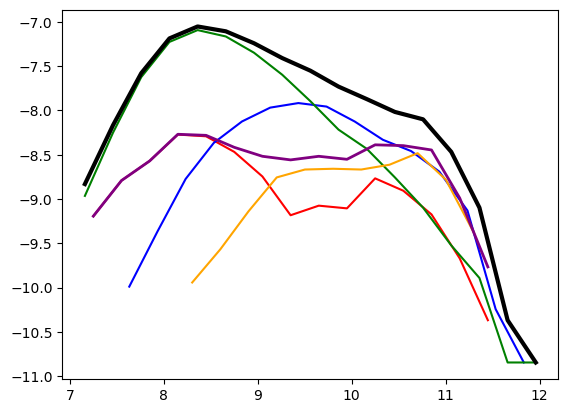

In [62]:
plt.plot(smf_morph[(1.5,'sph','LogMassbin')],np.log10(smf_morph[(1.5,'sph','Fi')]),color='red')
plt.plot(smf_morph[(1.5,'disk','LogMassbin')],np.log10(smf_morph[(1.5,'disk','Fi')]),color='blue')
plt.plot(smf_morph[(1.5,'irr','LogMassbin')],np.log10(smf_morph[(1.5,'irr','Fi')]),color='green')
plt.plot(smf_morph[(1.5,'db','LogMassbin')],np.log10(smf_morph[(1.5,'db','Fi')]),color='orange')
plt.plot(smf_morph[(1.5,'early','LogMassbin')],np.log10(smf_morph[(1.5,'early','Fi')]),color='purple',lw=2)
plt.plot(smf_morph[(1.5,'all','LogMassbin')],np.log10(smf_morph[(1.5,'all','Fi')]),color='black',lw=3)

In [ ]:
plt.plot(smf_morph[(5,'sph','LogMassbin')],np.log10(smf_morph[(5,'sph','Fi')]),color='red')
plt.plot(smf_morph[(5,'disk','LogMassbin')],np.log10(smf_morph[(5,'disk','Fi')]),color='blue')
plt.plot(smf_morph[(5,'irr','LogMassbin')],np.log10(smf_morph[(5,'irr','Fi')]),color='green')
plt.plot(smf_morph[(5,'db','LogMassbin')],np.log10(smf_morph[(2,'db','Fi')]),color='orange')

In [33]:
print(smf_morph[('db','LogMassbin')])
print(smf_morph[('sph','LogMassbin')])

[ 7.25772  7.55772  7.85772  8.15772  8.45772  8.75772  9.05772  9.35772
  9.65772  9.95772 10.25772 10.55772 10.85772 11.15772 11.45772 11.75772
 12.05772]
[ 7.15001  7.45001  7.75001  8.05001  8.35001  8.65001  8.95001  9.25001
  9.55001  9.85001 10.15001 10.45001 10.75001 11.05001 11.35001 11.65001
 11.95001]
